In [307]:
#Import the libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from datascience import *
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)



In [308]:
##Cleaning Table 1##

#Read Table 1 on Excel without the first 14 rows

data_table1 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', 'Table 1', skiprows=14)

##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values

# The years are in the first row. To fix that problem, we have to change it into columns with their corresponding values. 
data_table1.columns = data_table1.iloc[0]

#Manually re-write the column names and organize based off of desired column names 

data_table1.columns = ['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
'1990MF', '1995MF', '2000MF', '2005MF', '2010MF', '2015MF', '1990M', '1995M', '2000M', '2005M', '2010M', '2015M', '1990F', '1995F', '2000F', '2005F', '2010F', '2015F']


#Remove first row 

data_table1 = data_table1.iloc[1: , :]

#Create a column name called demographic that has the year+gender values

data_table1 = data_table1.melt(id_vars=['Sort\norder', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name=["demographic"],value_name="International Migrant Stock at Mid-Year") 

##Problem: There are multiple variables (gender and year) stored in one column (demographic) 
#Tidy data principle 2: Each column needs to consist of one and only one variable
#Solution: Split the demographic column into gender and years 

data_table1 = (data_table1.assign(Year = lambda x: x.demographic.str[0:4].astype(str), Gender = lambda x: x.demographic.str[4:].astype(str)).drop("demographic",axis=1))

#Styling the dataset: Changing MF to Both sexes, M to male, F to females.Change Sort\norder column name to Sort Order

data_table1 = (data_table1.replace(to_replace =["MF","M","F"],value =["Both Sexes","Male","Female"]))
data_table1 = data_table1.rename(columns={'Sort\norder': 'Sort Order'})    

#Drop the empty cells that contain value = .. 

data_table1['International Migrant Stock at Mid-Year'].replace('..', np.nan, inplace = True)  
data_table1.dropna(subset=['International Migrant Stock at Mid-Year'], inplace=True)


##Problem: The first 6 rows contain values whose country code does not exist in the annex. These rows also are sums of the other rows and do not belong under the same column. 
#Tidy data principle #4: each table column needs to have a singular data type 
#Solution: We created a seperate table that holds an executive summary of the International Migrant Stock at Mid-Year

#Create a new dataframe containing desired columns

table1_executive_summary = data_table1[['Major area, region, country or area of destination', 'Notes', 'International Migrant Stock at Mid-Year', 'Year', 'Gender']].copy()

#table1_ES has only the values "WORLD", "Developed regions", "Developing regions", "Least developed countries", "Least developed regions", and "Sub-Saharan Africa"

values=["WORLD","Developed regions", "Developing regions", "Least developed countries", "Less developed regions excluding least developed countries", "Sub-Saharan Africa"]
table1_ES = table1_executive_summary[table1_executive_summary["Major area, region, country or area of destination"].isin(values)] 

#Rename 
table1_ES = table1_ES.rename({'Major area, region, country or area of destination': 'Location'}, axis=1) 

table1_ES = table1_ES.reset_index(drop=True)

#Fix table 1 and remove all values in the values list
new_table1 = data_table1[~data_table1["Major area, region, country or area of destination"].isin(values)] 
new_table1 = new_table1.reset_index(drop=True)


#Problem: Major area, region, country or area of destination has multiple variables in the column and different variables in the rows. 
#tidy data principle #3: variables need to be in cells, not rows and columns
#Solution: Add a new column called "Category" that seperates the major area, region, country/area of destination 

#Create list
list_major_area_num = [7, 71, 127, 180, 238]
list_region_num = [8, 29, 39, 47, 53, 72, 78, 86, 98, 108, 128, 139, 153, 170, 181, 208, 217, 232, 239, 242, 248, 256]

# function to assign values in the category values of the new column 
def category(df):
    if df['Sort Order'] in list_major_area_num:
        return 'Major Area'
    elif df['Sort Order'] in list_region_num:
        return 'Region'
    return 'Country/Area'

new_table1 = new_table1.rename(columns={'Major area, region, country or area of destination': 'Location', 'Country code': 'Country Code'})

#change the float types into ints
new_table1['Sort Order'] = new_table1['Sort Order'].astype(int)
new_table1['Country Code'] = new_table1['Country Code'].astype(int)

#Add category column
new_table1['Category'] = new_table1.apply(category, axis = 1)


#reorder the columns so that it follows order: sort order, country code..
new_table1 = new_table1[['Sort Order', 'Location', 'Category','Country Code', 'Notes', 'Type of data (a)', 'International Migrant Stock at Mid-Year', 'Year', 'Gender']]

#view new_table1
#new_table1.tail() 

#view new_table1
new_table1.tail(20)


Sort Order                          Location      Category  \
4597         246                   Solomon Islands  Country/Area   
4598         247                           Vanuatu  Country/Area   
4599         248                        Micronesia        Region   
4600         249                              Guam  Country/Area   
4601         250                          Kiribati  Country/Area   
4602         251                  Marshall Islands  Country/Area   
4603         252  Micronesia (Federated States of)  Country/Area   
4604         253                             Nauru  Country/Area   
4605         254          Northern Mariana Islands  Country/Area   
4606         255                             Palau  Country/Area   
4607         256                         Polynesia        Region   
4608         257                    American Samoa  Country/Area   
4609         258                      Cook Islands  Country/Area   
4610         259                  French Polynesia  Country/Area   
4611         260                              Niue  Country/Area   
4612         261                             Samoa  Country/Area   
4613         262                           Tokelau  Country/Area   
4614         263                             Tonga  Country/Area   
4615         264                            Tuvalu  Country/Area   
4616         265         Wallis and Futuna Islands  Country/Area   

      Country Code Notes Type of data (a)  \
4597            90   NaN                B   
4598           548   NaN                B   
4599           954   NaN              NaN   
4600           316   NaN                B   
4601           296   NaN                B   
4602           584   NaN                B   
4603           583   NaN                B   
4604           520   NaN                C   
4605           580   NaN                B   
4606           585   NaN                B   
4607           957   NaN              NaN   
4608            16   NaN                B   
4609           184   NaN                B   
4610           258   NaN                B   
4611           570   NaN                B   
4612           882   NaN                B   
4613           772   NaN                B   
4614           776   NaN                B   
4615           798   NaN                C   
4616           876   NaN                B   

      International Migrant Stock at Mid-Year  Year  Gender  
4597                                   1135.0  2015  Female  
4598                                   1604.0  2015  Female  
4599                                  57159.0  2015  Female  
4600                                  36843.0  2015  Female  
4601                                   1491.0  2015  Female  
4602                                   1273.0  2015  Female  
4603                                   1283.0  2015  Female  
4604                                   1271.0  2015  Female  
4605                                  12548.0  2015  Female  
4606                                   2450.0  2015  Female  
4607                                  33361.0  2015  Female  
4608                                  11318.0  2015  Female  
4609                                   2074.0  2015  Female  
4610                                  12922.0  2015  Female  
4611                                    255.0  2015  Female  
4612                                   2460.0  2015  Female  
4613                                    254.0  2015  Female  
4614                                   2604.0  2015  Female  
4615                                     63.0  2015  Female  
4616                                   1411.0  2015  Female

In [6]:
##Sort Table 1 data to better understand relationship##

#Sorting rows and columns by International Migrant Stock
table1_ES_1990_Both_sortedIMS = table1_ES.sort_values('International Migrant Stock at Mid-Year', ascending=False)

#Sorting rows and columns by Location 
table1_ES_1990_Both_sortedlocation = table1_ES_1990_Both_sortedIMS.sort_values('Location')

#view
table1_ES_1990_Both_sortedIMS.head()


Location Notes  International Migrant Stock at Mid-Year  Year      Gender
30    WORLD   NaN                              243700236.0  2015  Both Sexes
24    WORLD   NaN                              221714243.0  2010  Both Sexes
18    WORLD   NaN                              191269100.0  2005  Both Sexes
12    WORLD   NaN                              172703309.0  2000  Both Sexes
6     WORLD   NaN                              160801752.0  1995  Both Sexes

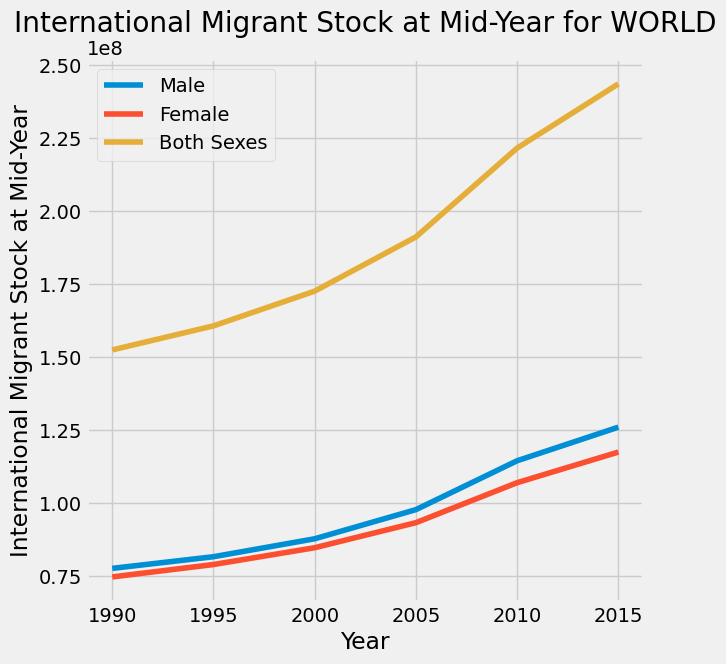

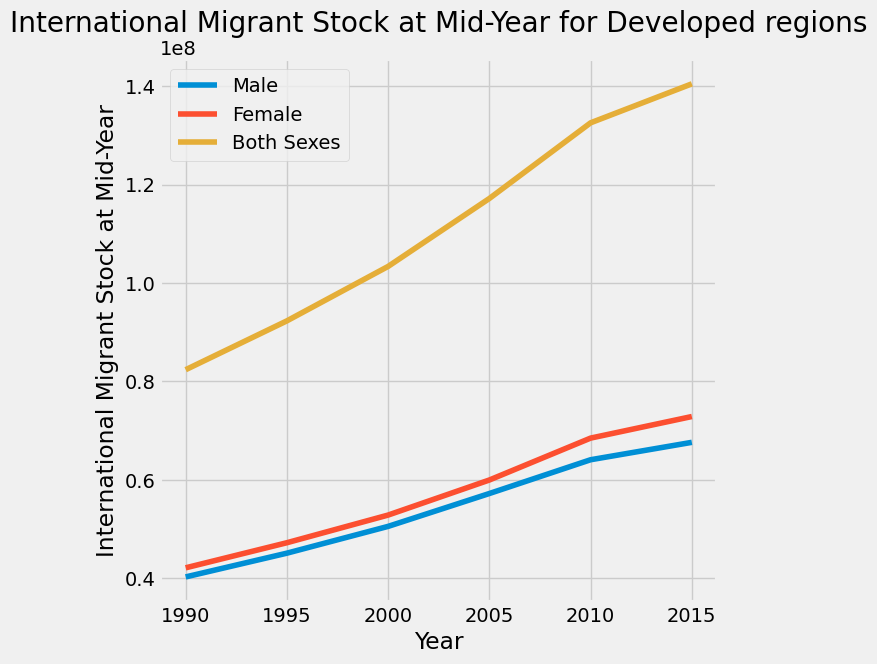

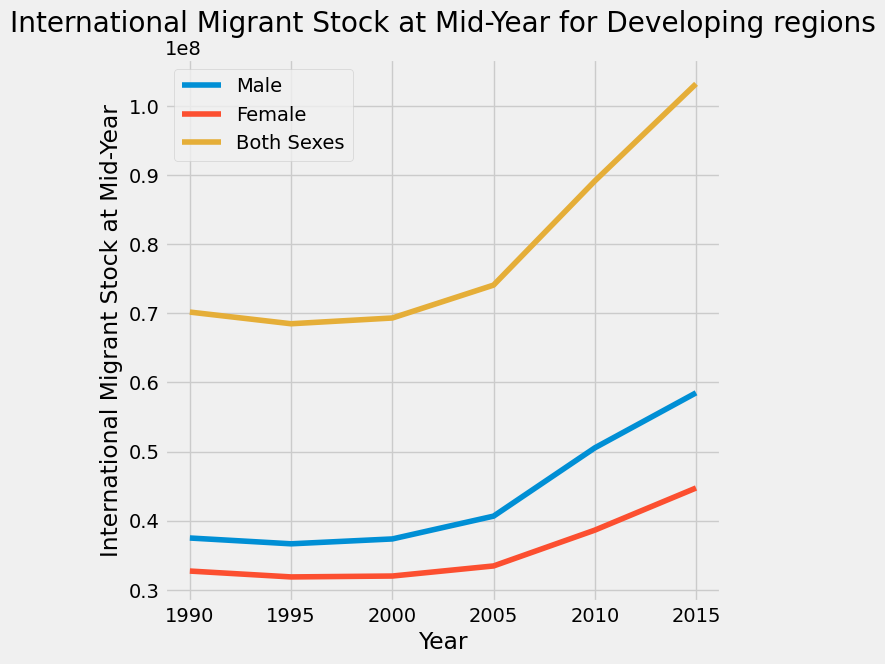

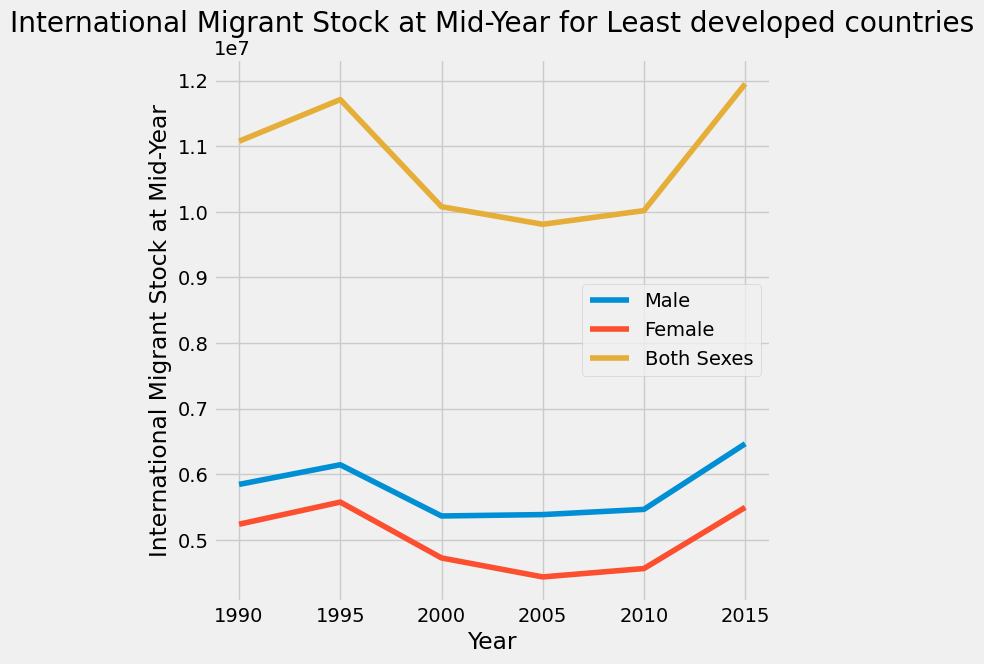

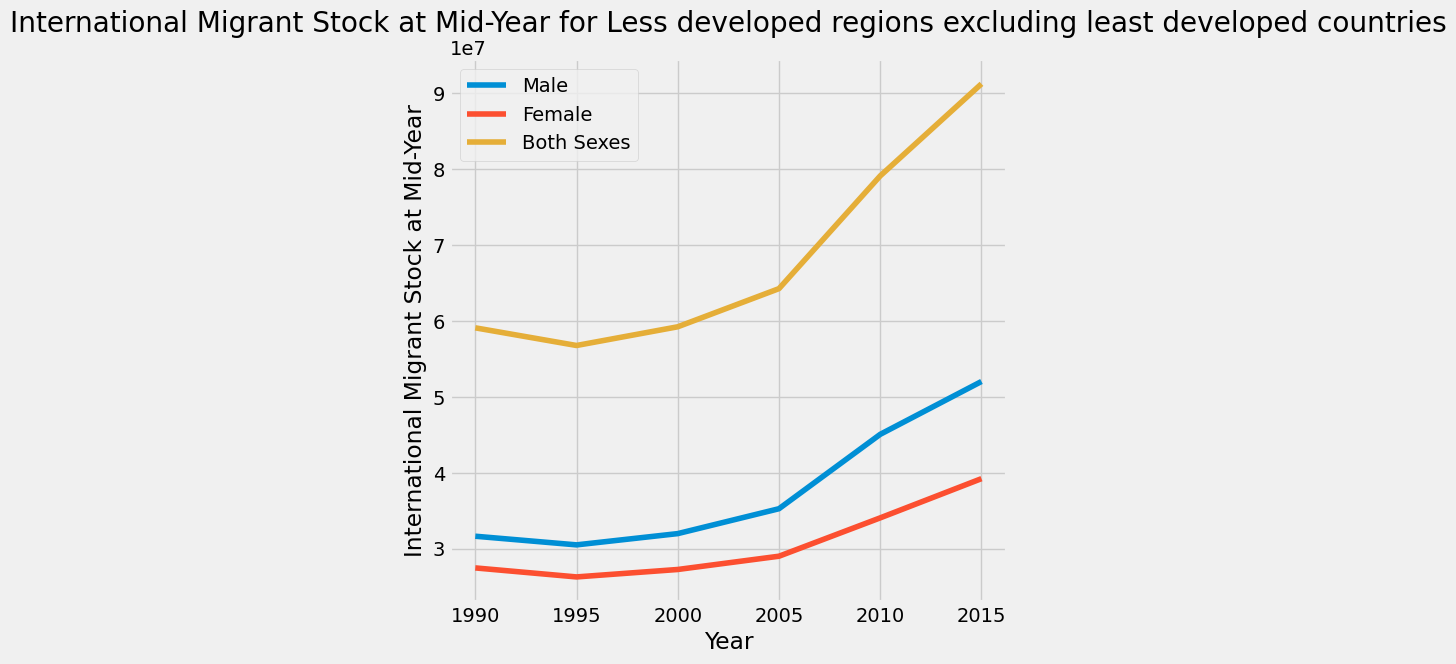

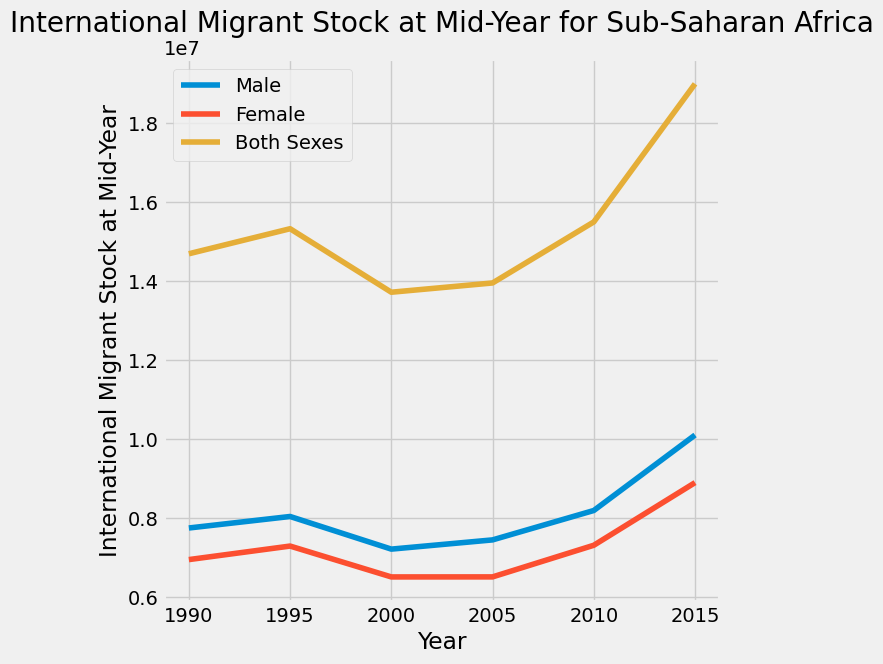

In [310]:
#####Visualizing Table 1 Executive Summary using Line Plot##### 

# List of locations to create bar graphs for
locations_t1ES = ['WORLD', 'Developed regions', 'Developing regions', 'Least developed countries', 'Less developed regions excluding least developed countries', 'Sub-Saharan Africa']

# List of genders to create line plots for
genders = ['Male', 'Female', 'Both Sexes']

# Iterate over the locations
for location in locations_t1ES:
    # Iterate over the genders
    for gender in genders:
        # Filter the dataframe to only include the current location and gender
        data = table1_ES[(table1_ES['Location'] == location) & (table1_ES['Gender'] == gender)]

        # Group the data by year
        data = data.groupby('Year')['International Migrant Stock at Mid-Year'].sum()

        # Create a line plot
        plt.plot(data.index, data.values, label=gender)

    # Set the labels for the x and y axes
    plt.xlabel('Year')
    plt.ylabel('International Migrant Stock at Mid-Year')
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=1.2)

    # Add a title
    plt.title('International Migrant Stock at Mid-Year for ' + location)

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()


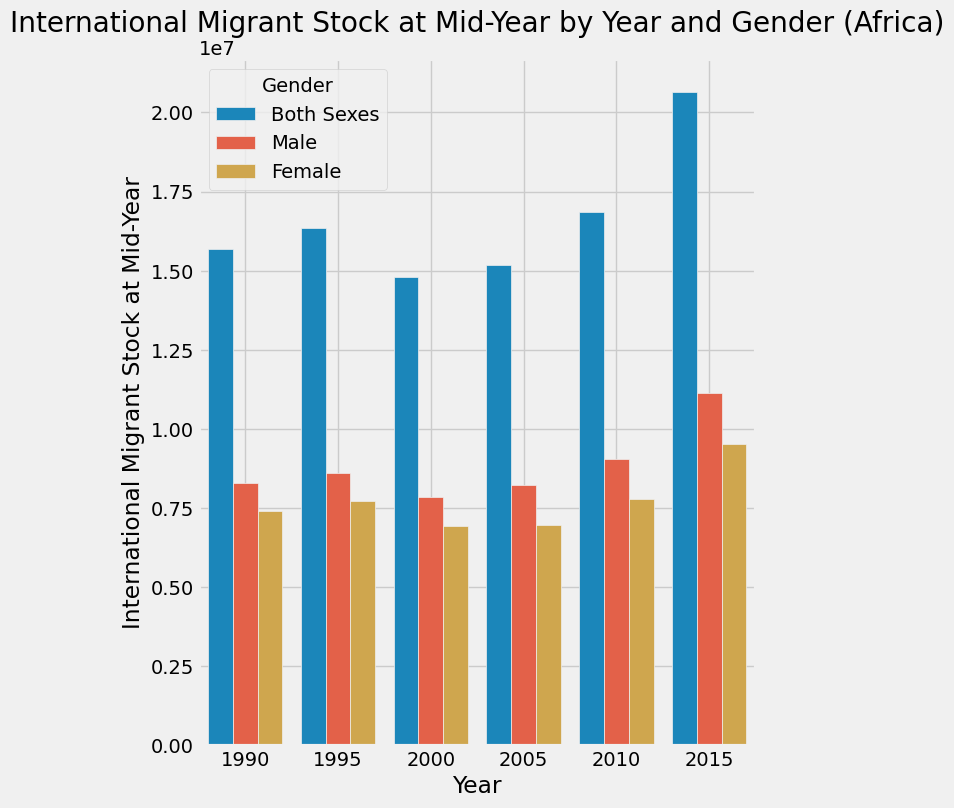

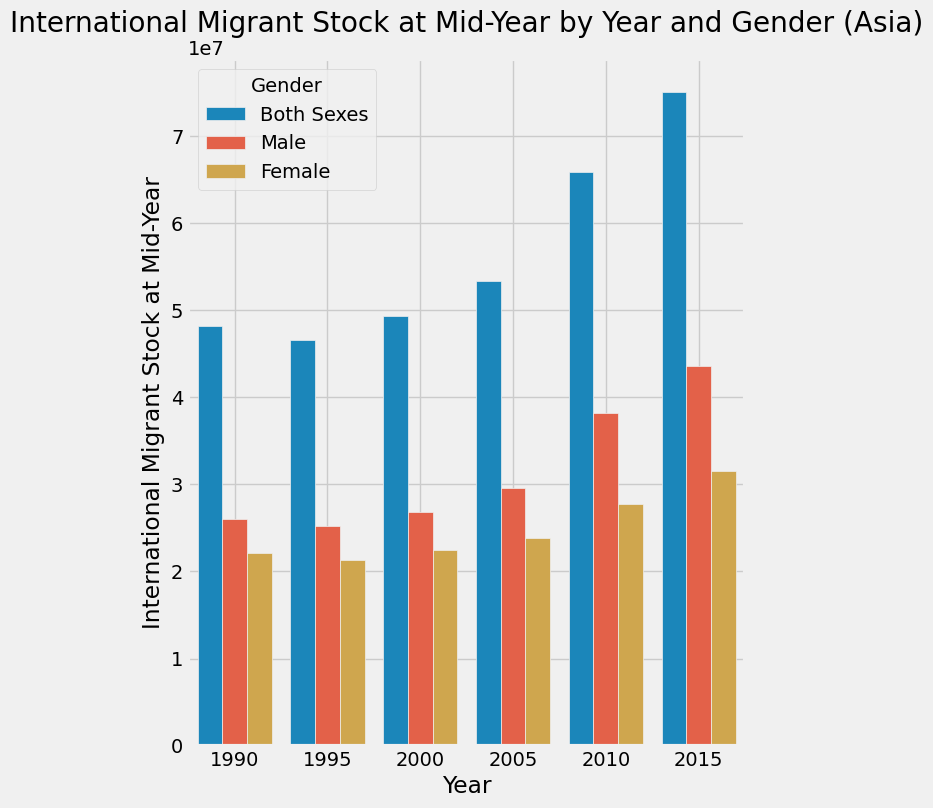

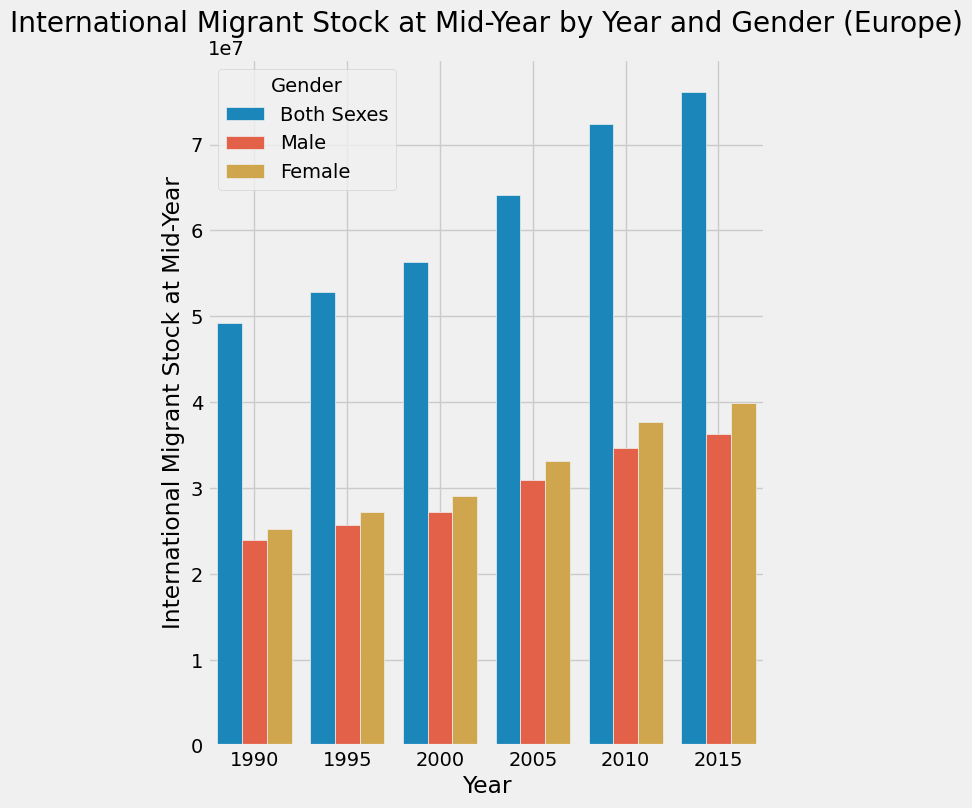

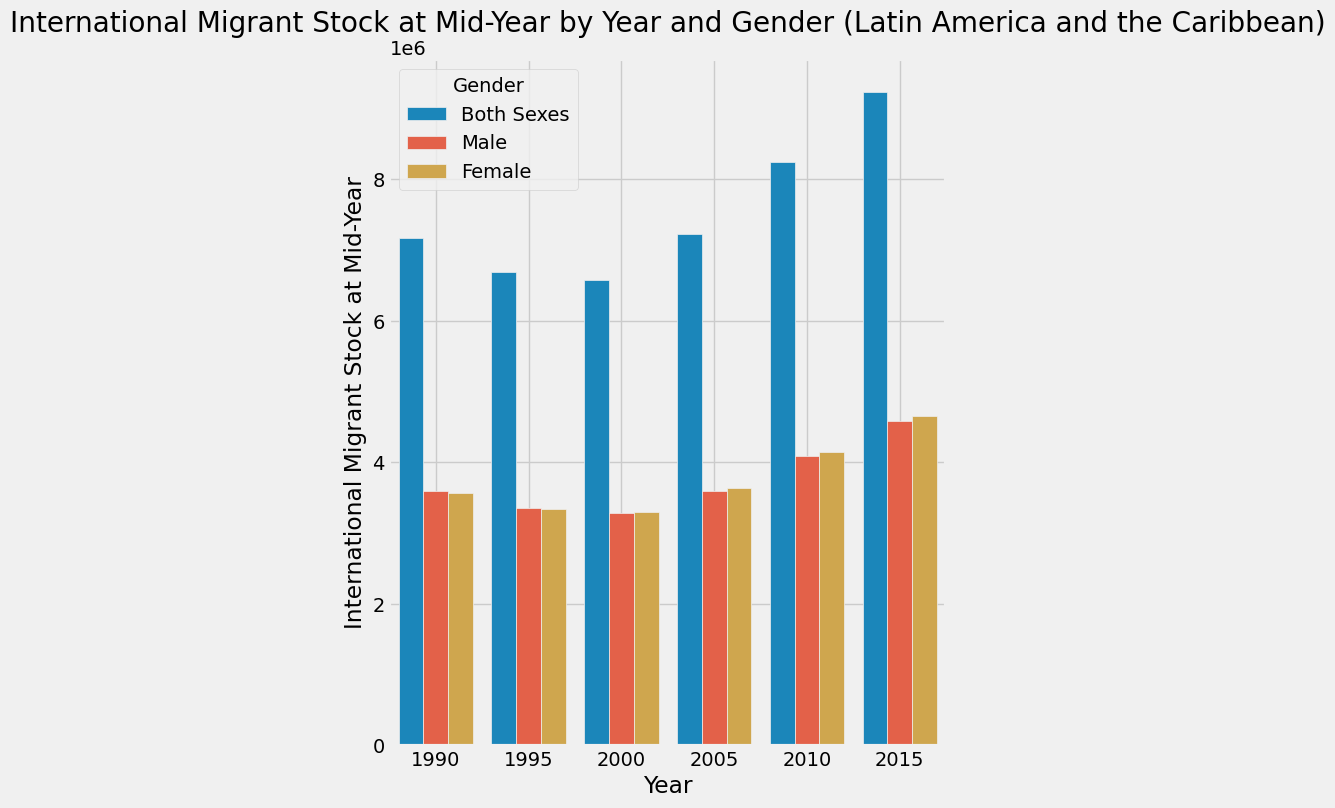

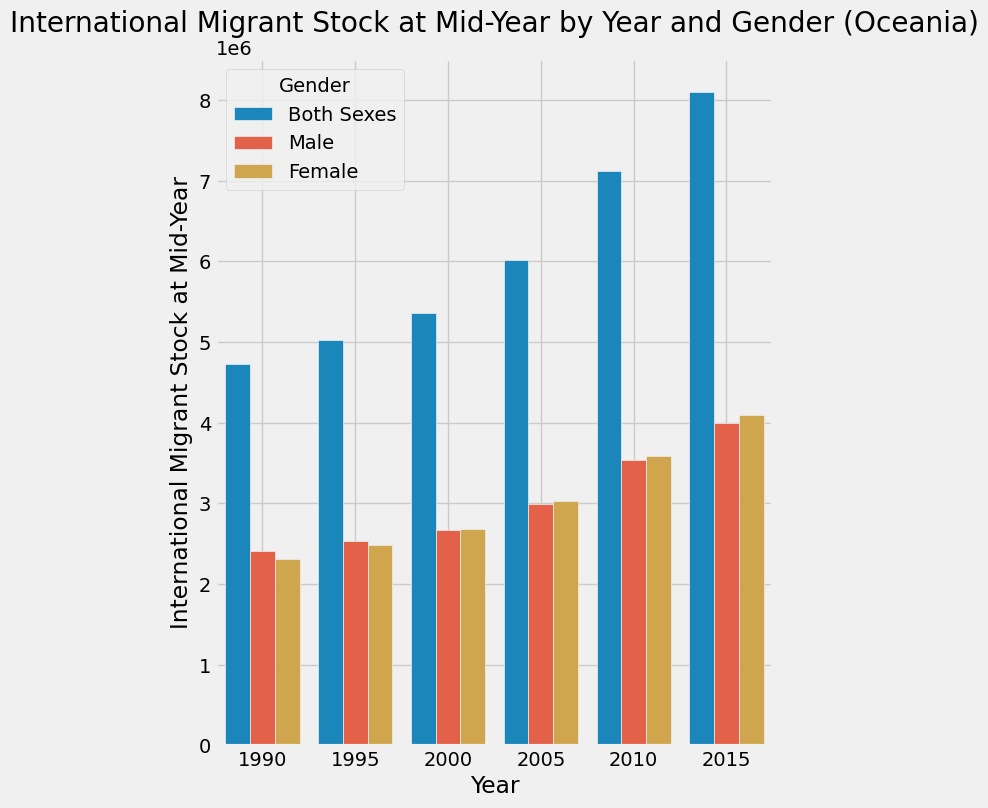

In [239]:
#####Visualizing Table 1 by Major Area using Bar Plot##### 

# Load the dataframe
df = new_table1

# Filter the dataframe to include only rows where the "Category" column is equal to "Major Area"
df_major_area = df[df["Category"] == "Major Area"]

# Create a list of the major areas
major_areas = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania"]

# Loop over the list of major areas
for area in major_areas:
    # Filter the dataframe to include only rows where the "Location" column is equal to the current major area
    df_area = df_major_area[df_major_area["Location"] == area]

    # Create the bar plot
    ax_BP1 = sns.barplot(data=df_area, x="Year", y="International Migrant Stock at Mid-Year", hue="Gender")
    
    # Add grid lines
    ax_BP1.grid(True)

    # Add a title to the plot
    plt.title(f"International Migrant Stock at Mid-Year by Year and Gender ({area})")
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=1.5)

    # Show the plot
    plt.show()





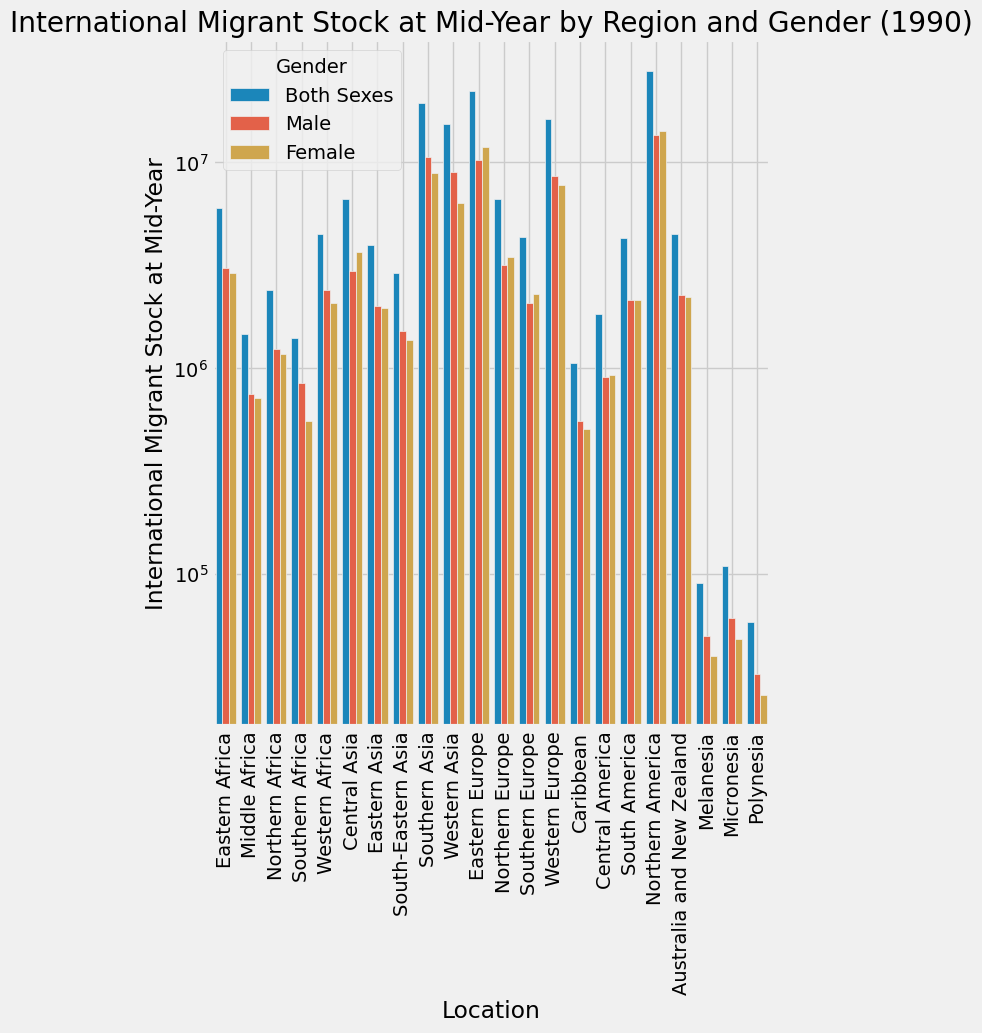

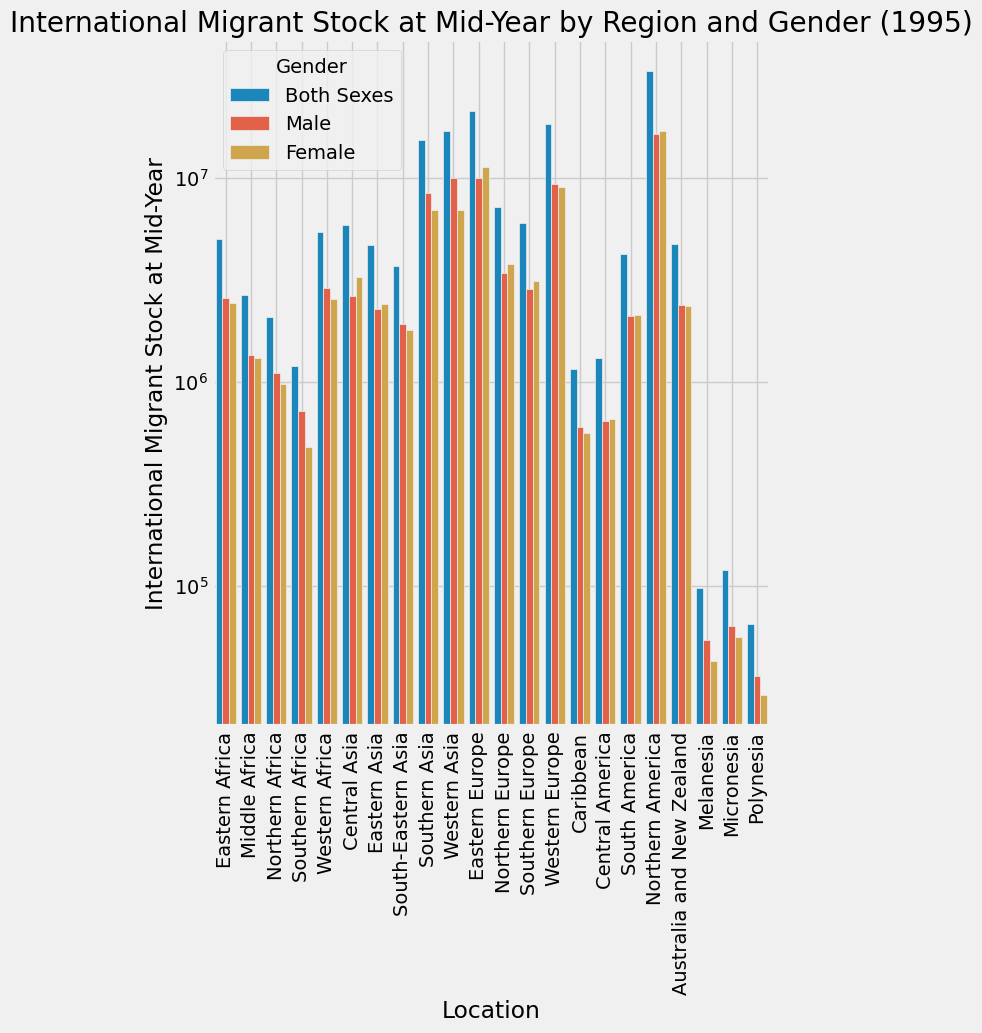

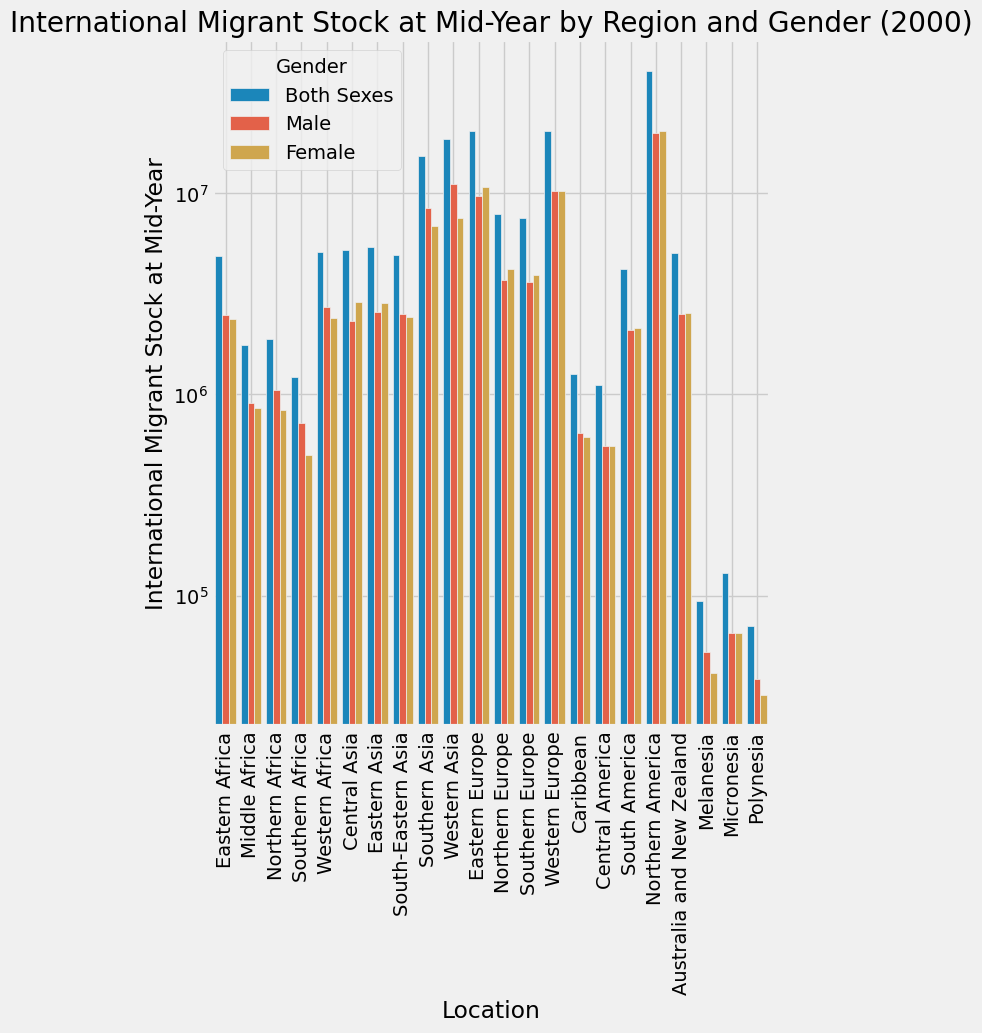

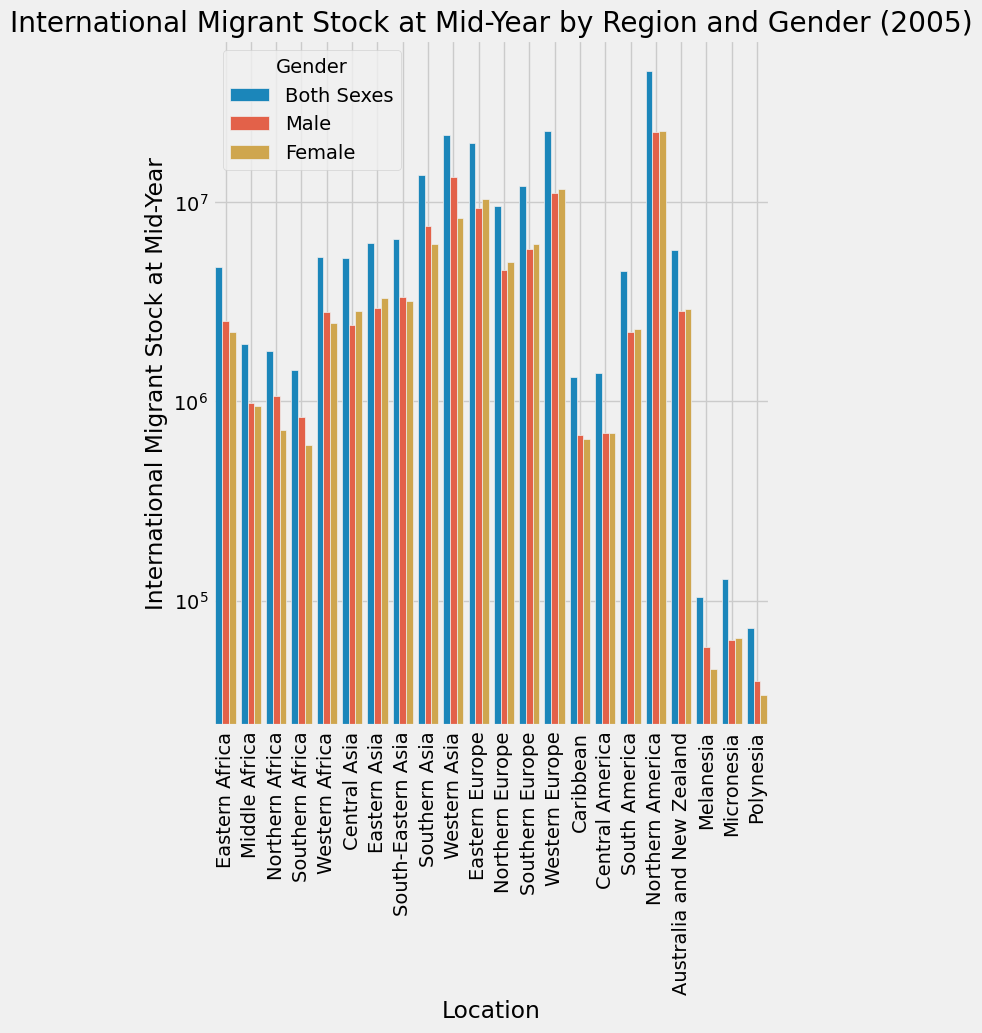

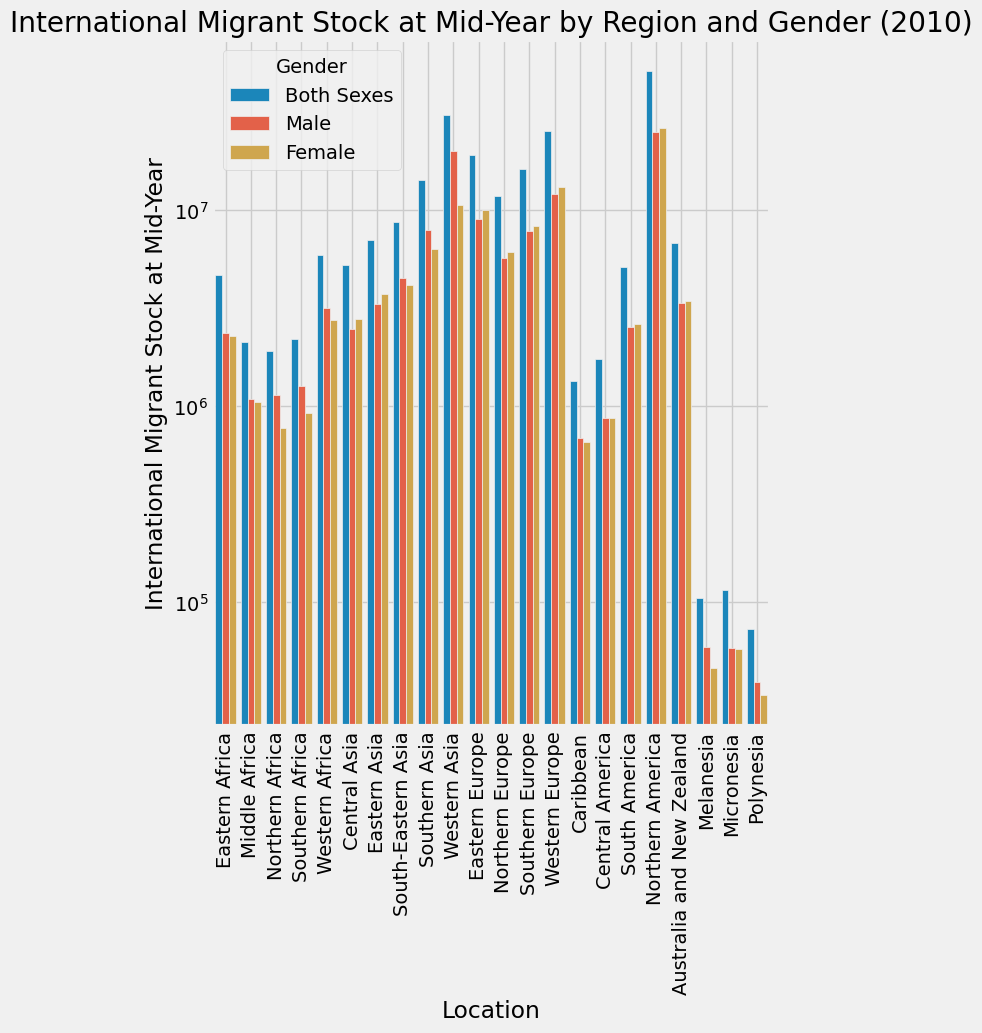

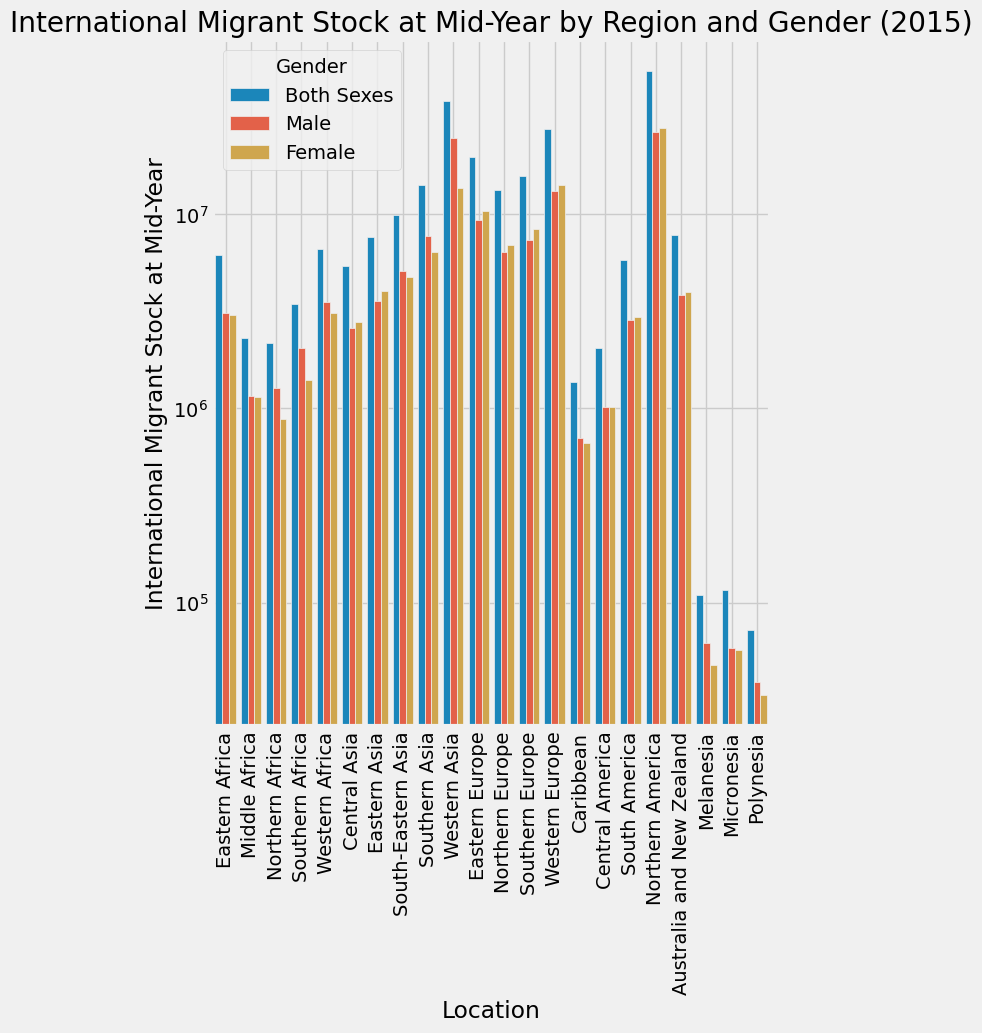

In [237]:
###Visualizing Table 1 by Region using Barplot###

# Load the dataframe
df = new_table1

# Filter the dataframe to include only rows where the "Category" column is equal to "Region"
df_region = df[df["Category"] == "Region"]

#Create a list of the years
years = ["1990", "1995", "2000", "2005", "2010", "2015"]

#Loop over the list of years
for year in years:
    #Filter the dataframe to include only rows where the "Year" column is equal to the current year
    df_year = df_region[df_region["Year"] == year]
    
    #Create the barplot
    ax = sns.barplot(data=df_year, x="Location", y="International Migrant Stock at Mid-Year", hue="Gender")
    
    # Set the y-axis scale to logarithmic
    ax.set_yscale('log')
    
    # Add grid lines
    ax.grid(True)
    
    # Add a title to the plot
    plt.title(f"International Migrant Stock at Mid-Year by Region and Gender ({year})")
    
    # Rotate the x-axis labels for all subplots
    plt.xticks(rotation=90)
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=1.5)

    # Show the plot
    plt.show()


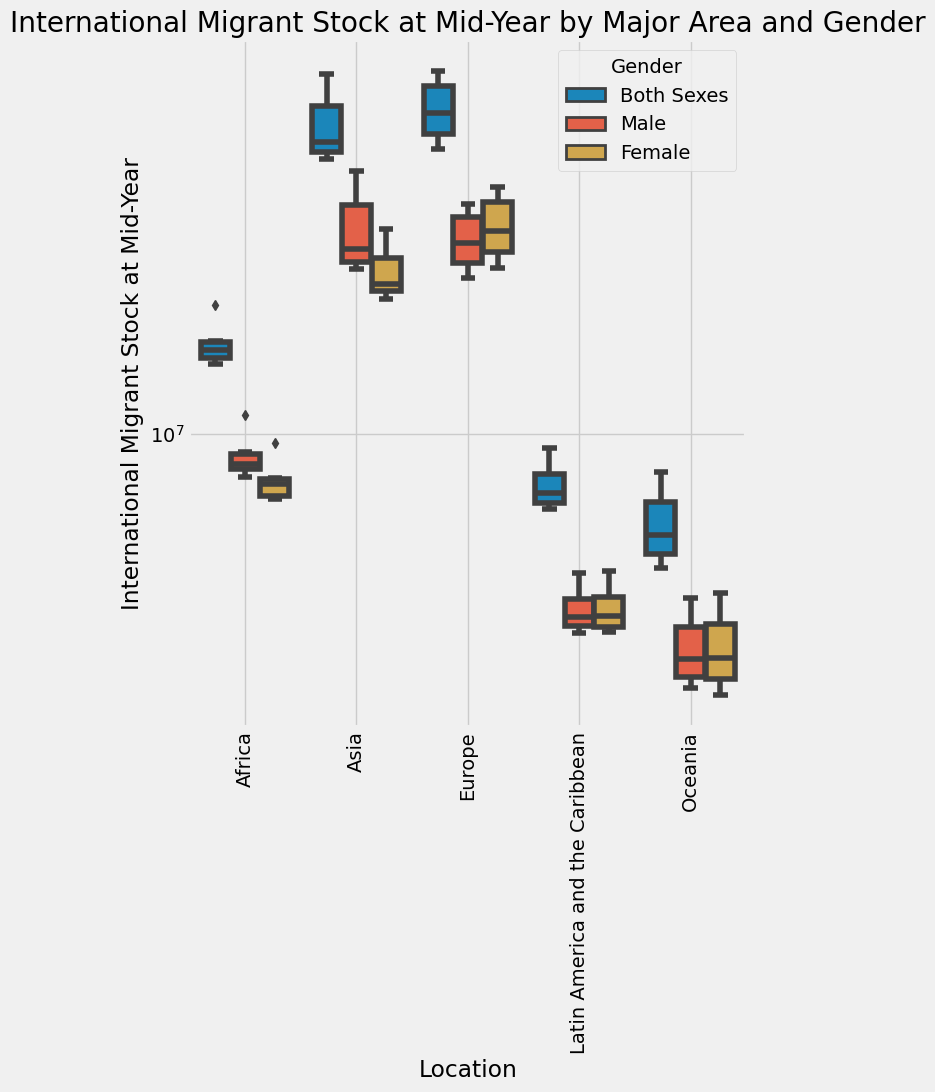

<Figure size 1000x1000 with 0 Axes>

In [238]:
##Boxplots


# Load the dataframe
df = new_table1

# Filter the dataframe to include only rows where the "Category" column is equal to "Region"
df_region = df[df["Category"] == "Major Area"]

# Create the boxplot
ax_2 = sns.boxplot(data=df_region, x="Location", y="International Migrant Stock at Mid-Year", hue="Gender")

# Set the y-axis scale to logarithmic
ax_2.set_yscale('log')

# Add grid lines
ax_2.grid(True)

# Add a title to the plot
plt.title("International Migrant Stock at Mid-Year by Major Area and Gender")

# Rotate the x-axis labels for all subplots
plt.xticks(rotation=90)

# Add space between the title and the plot
plt.subplots_adjust(top=1.5)

#Re-size figure
plt.figure(figsize=(10,10))


# Show the plot
plt.show()

In [355]:
##Cleaning Table 2##

#Read Table 2 on Excel without the first 14 rows
data_table2 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', 'Table 2', skiprows=14)

##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values

# The years are in the first row. To fix that problem, we have to change it into columns with their corresponding values. 
data_table2.columns = data_table2.iloc[0]

# Manually re-write the column names and organize based off of desired names
data_table2.columns = ['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code',
'1990MF', '1995MF', '2000MF', '2005MF', '2010MF', '2015MF', '1990M', '1995M', '2000M', '2005M', '2010M', '2015M', '1990F', '1995F', '2000F', '2005F', '2010F', '2015F']

#Remove first row 
data_table2 = data_table2.iloc[1: , :]

#Create a column name called demographic that has the year+gender values
data_table2 = data_table2.melt(id_vars=['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code'], var_name=["demographic"],value_name="Total Population at Mid-Year") 


##Problem: There are multiple variables (gender and year) stored in one column (demographic) 
#Tidy data principle 2: Each column needs to consist of one and only one variable
#Solution: Split the demographic column into gender and years 
data_table2=(data_table2.assign(Year = lambda x: x.demographic.str[0:4].astype(str), Gender = lambda x: x.demographic.str[4:].astype(str)).drop("demographic",axis=1))

#Styling the dataset: Changing MF to Both sexes, M to male, F to females. Change Sort order column name to Sort Order
data_table2=(data_table2.replace(to_replace =["MF","M","F"],value =["Both Sexes","Male","Female"]))
data_table2 = data_table2.rename(columns={'Sort order': 'Sort Order'})        

#Drop the empty cells that contain value = .. 
data_table2['Total Population at Mid-Year'].replace('..', np.nan, inplace = True)  
data_table2.dropna(subset=['Total Population at Mid-Year'], inplace=True)

##Problem: The first 6 rows contain values whose country code does not exist in the annex. These rows also are sums of the other rows and do not belong under the same column. 
#Tidy data principle #4: each table column needs to have a singular data type 
#Solution: We created a seperate table that holds an executive summary of the Total Population at Mid-Year 


#Create a new dataframe containing desired columns
table2_executive_summary = data_table2[['Major area, region, country or area of destination', 'Notes', 'Total Population at Mid-Year', 'Year', 'Gender']].copy()

#table2_ES has only the values "WORLD", "Developed regions", "Developing regions", "Least developed countries", "Least developed regions", and "Sub-Saharan Africa"
values=["WORLD","Developed regions", "Developing regions", "Least developed countries", "Less developed regions excluding least developed countries", "Sub-Saharan Africa"]
new_table2_ES = table2_executive_summary[table2_executive_summary["Major area, region, country or area of destination"].isin(values)] 

new_table2_ES = new_table2_ES.reset_index(drop=True)

#Rename 
new_table2_ES = new_table2_ES.rename({'Major area, region, country or area of destination': 'Location'}, axis=1) 

#Fix table 2 and remove all values in the values list
new_table2 = data_table2[~data_table2["Major area, region, country or area of destination"].isin(values)] 
new_table2 = new_table2.reset_index(drop=True)


#Problem: Major area, region, country or area of destination has multiple variables in the column and different variables in the rows. 
#tidy data principle #3: variables need to be in cells, not rows and columns
#Solution: Add a new column called "Category" that seperates the major area, region, country/area of destination 


# function to assign values in the category values of the new column 
def category(df):
    if df['Sort Order'] in list_major_area_num:
        return 'Major Area'
    elif df['Sort Order'] in list_region_num:
        return 'Region'
    return 'Country/Area'

#Rename 
new_table2 = new_table2.rename(columns={'Major area, region, country or area of destination': 'Location', 'Country code': 'Country Code'})

#change the float types into ints
new_table2['Sort Order'] = new_table2['Sort Order'].astype(int)
new_table2['Country Code'] = new_table2['Country Code'].astype(int)

#Add category column
new_table2['Category'] = new_table2.apply(category, axis = 1)


#reorder the columns so that it follows order: sort order, country code..
new_table2 = new_table2[['Sort Order', 'Location', 'Category','Country Code', 'Notes', 'Total Population at Mid-Year', 'Year', 'Gender']]

#view new_table2
new_table2.head()


Sort Order        Location      Category  Country Code Notes  \
0           7          Africa    Major Area           903   NaN   
1           8  Eastern Africa        Region           910   NaN   
2           9         Burundi  Country/Area           108   NaN   
3          10         Comoros  Country/Area           174   NaN   
4          11        Djibouti  Country/Area           262   NaN   

   Total Population at Mid-Year  Year      Gender  
0                    631614.304  1990  Both Sexes  
1                    198231.687  1990  Both Sexes  
2                      5613.141  1990  Both Sexes  
3                       415.144  1990  Both Sexes  
4                       588.356  1990  Both Sexes

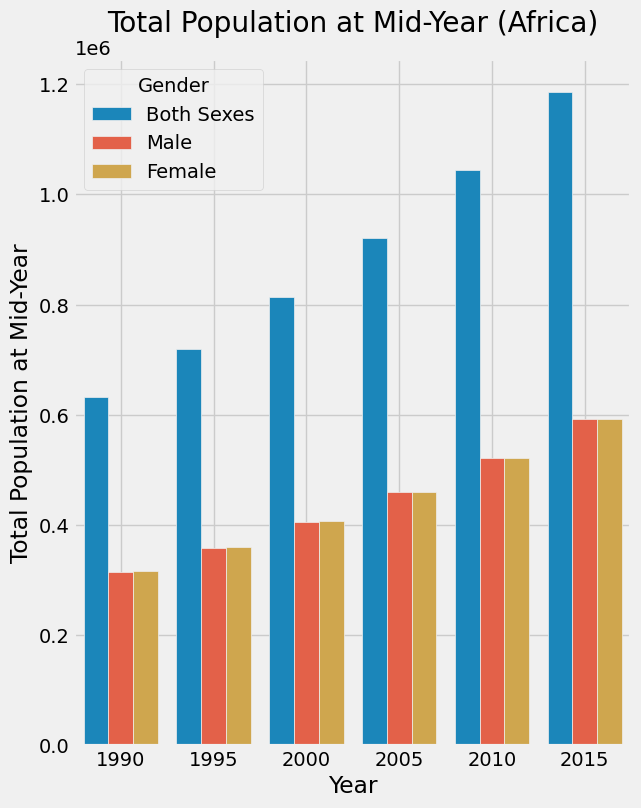

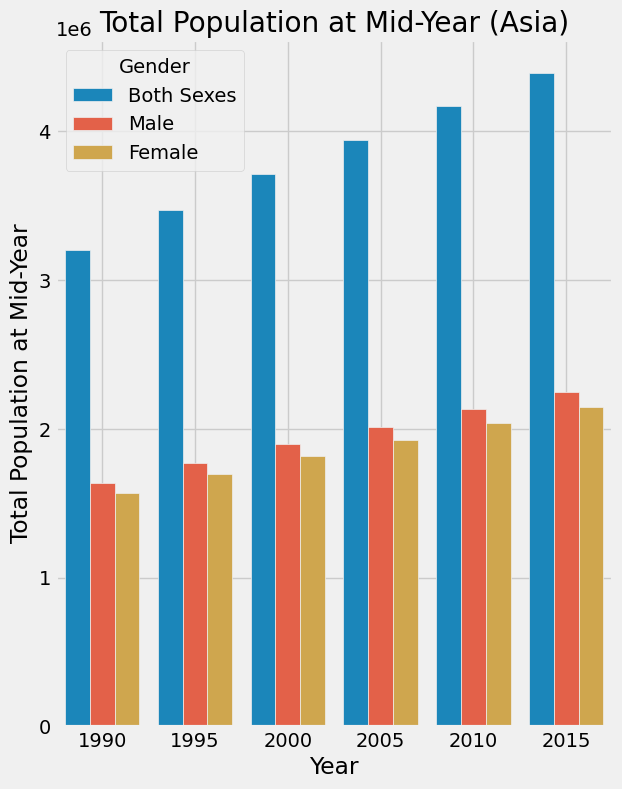

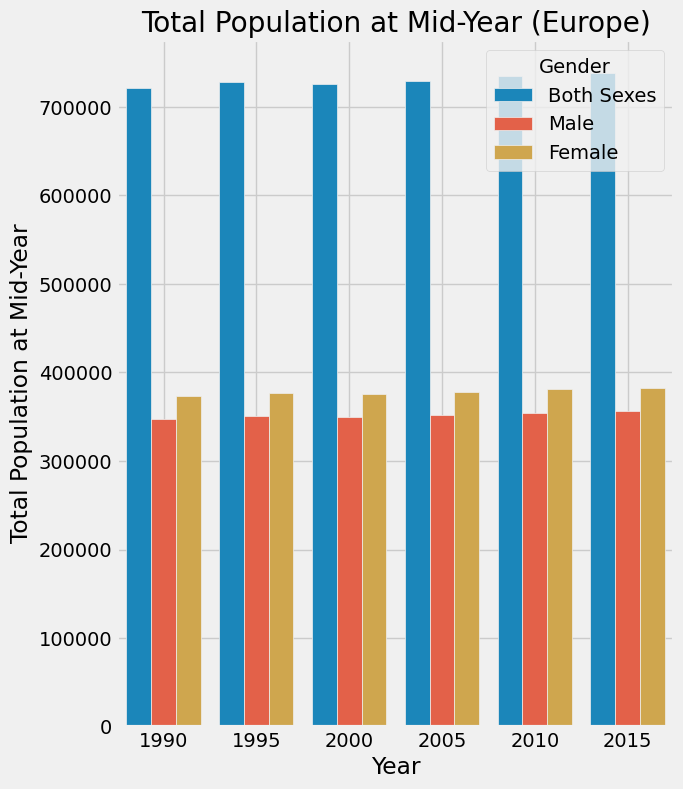

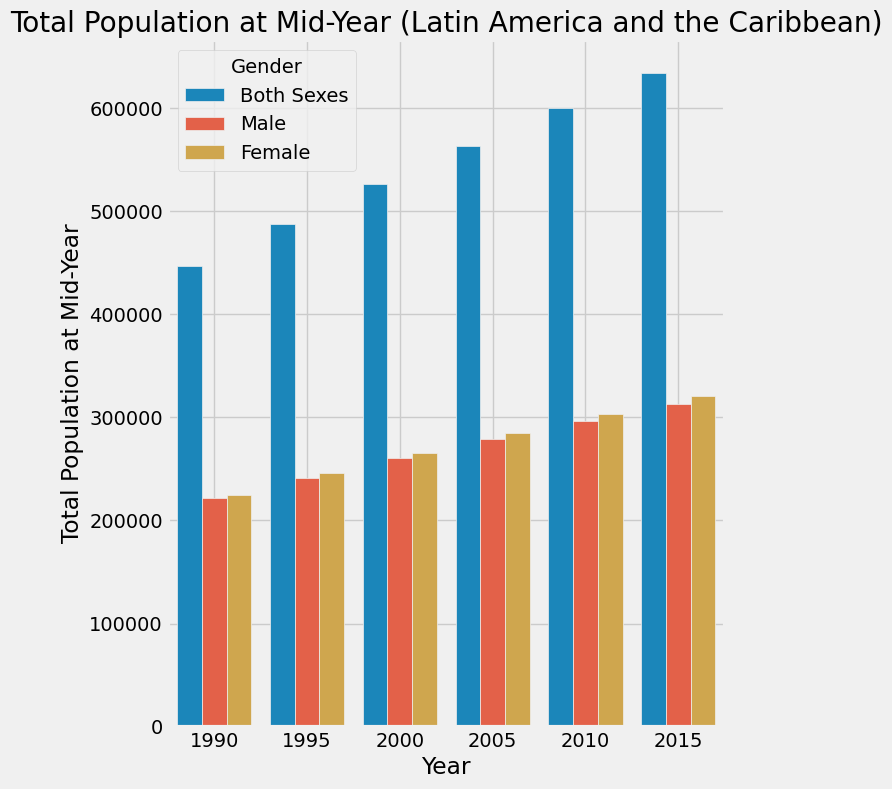

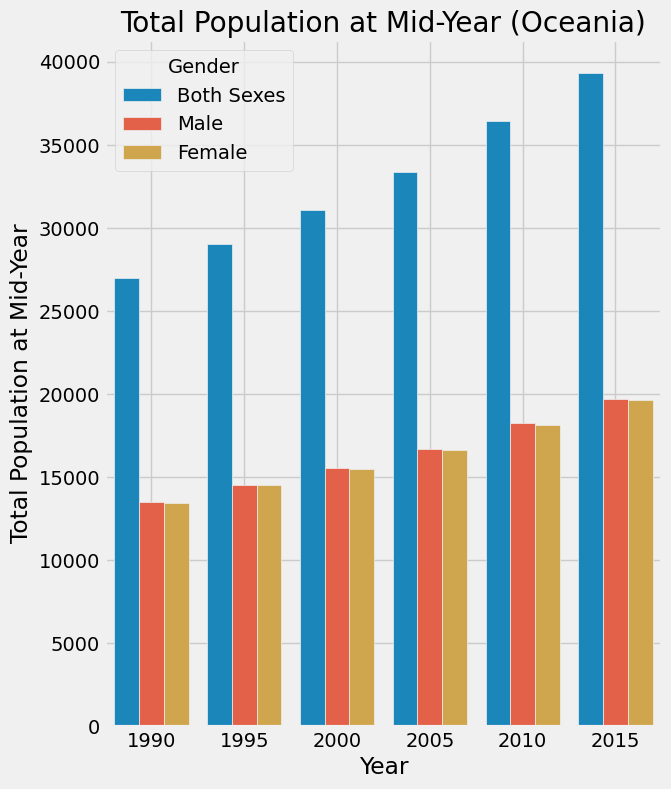

In [356]:
#####Visualizing Table 2 using Bar Plot##### 

# Load the dataframe
df2 = new_table2

# Filter the dataframe to include only rows where the "Category" column is equal to "Major Area"
df2_major_area = df2[df2["Category"] == "Major Area"]

# Create a list of the major areas
major_areas = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania"]

# Loop over the list of major areas
for area in major_areas:
    # Filter the dataframe to include only rows where the "Location" column is equal to the current major area
    df2_area = df2_major_area[df2_major_area["Location"] == area]

    # Create the bar plot
    ax_BP2 = sns.barplot(data=df2_area, x="Year", y="Total Population at Mid-Year", hue="Gender")
    
    # Add grid lines
    ax_BP2.grid(True)

    # Add a title to the plot
    plt.title(f"Total Population at Mid-Year ({area})")
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=1.5)

    # Show the plot
    plt.show()

In [312]:
##Combine Table 1 & Table 2
#tidy data principle 5: a single observational units must be in 1 table

#Combine new_table1, new_table2
midyear_data = pd.merge(new_table1, new_table2)
midyear_data = midyear_data[['Sort Order', 'Location', 'Category', 'Country Code', 'Notes', 'Type of data (a)', 'Year', 'Gender', 'International Migrant Stock at Mid-Year', 'Total Population at Mid-Year']]

#Combine table1_ES and new_table2_ES
ES_table12 = pd.merge(table1_ES, new_table2_ES)
ES_table12 = ES_table12[['Location', 'Notes', 'Year', 'Gender', 'International Migrant Stock at Mid-Year', 'Total Population at Mid-Year']]



ES_table12.head()

Location Notes  Year      Gender  \
0                                              WORLD   NaN  1990  Both Sexes   
1                                  Developed regions   (b)  1990  Both Sexes   
2                                 Developing regions   (c)  1990  Both Sexes   
3                          Least developed countries   (d)  1990  Both Sexes   
4  Less developed regions excluding least develop...   NaN  1990  Both Sexes   

   International Migrant Stock at Mid-Year  Total Population at Mid-Year  
0                              152563212.0                   5309667.699  
1                               82378628.0                   1144463.062  
2                               70184584.0                   4165204.637  
3                               11075966.0                    510057.629  
4                               59105261.0                   3655147.008

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_table12_ES.index, rotation=90)
C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data_table12_ES.index, rotation=90)


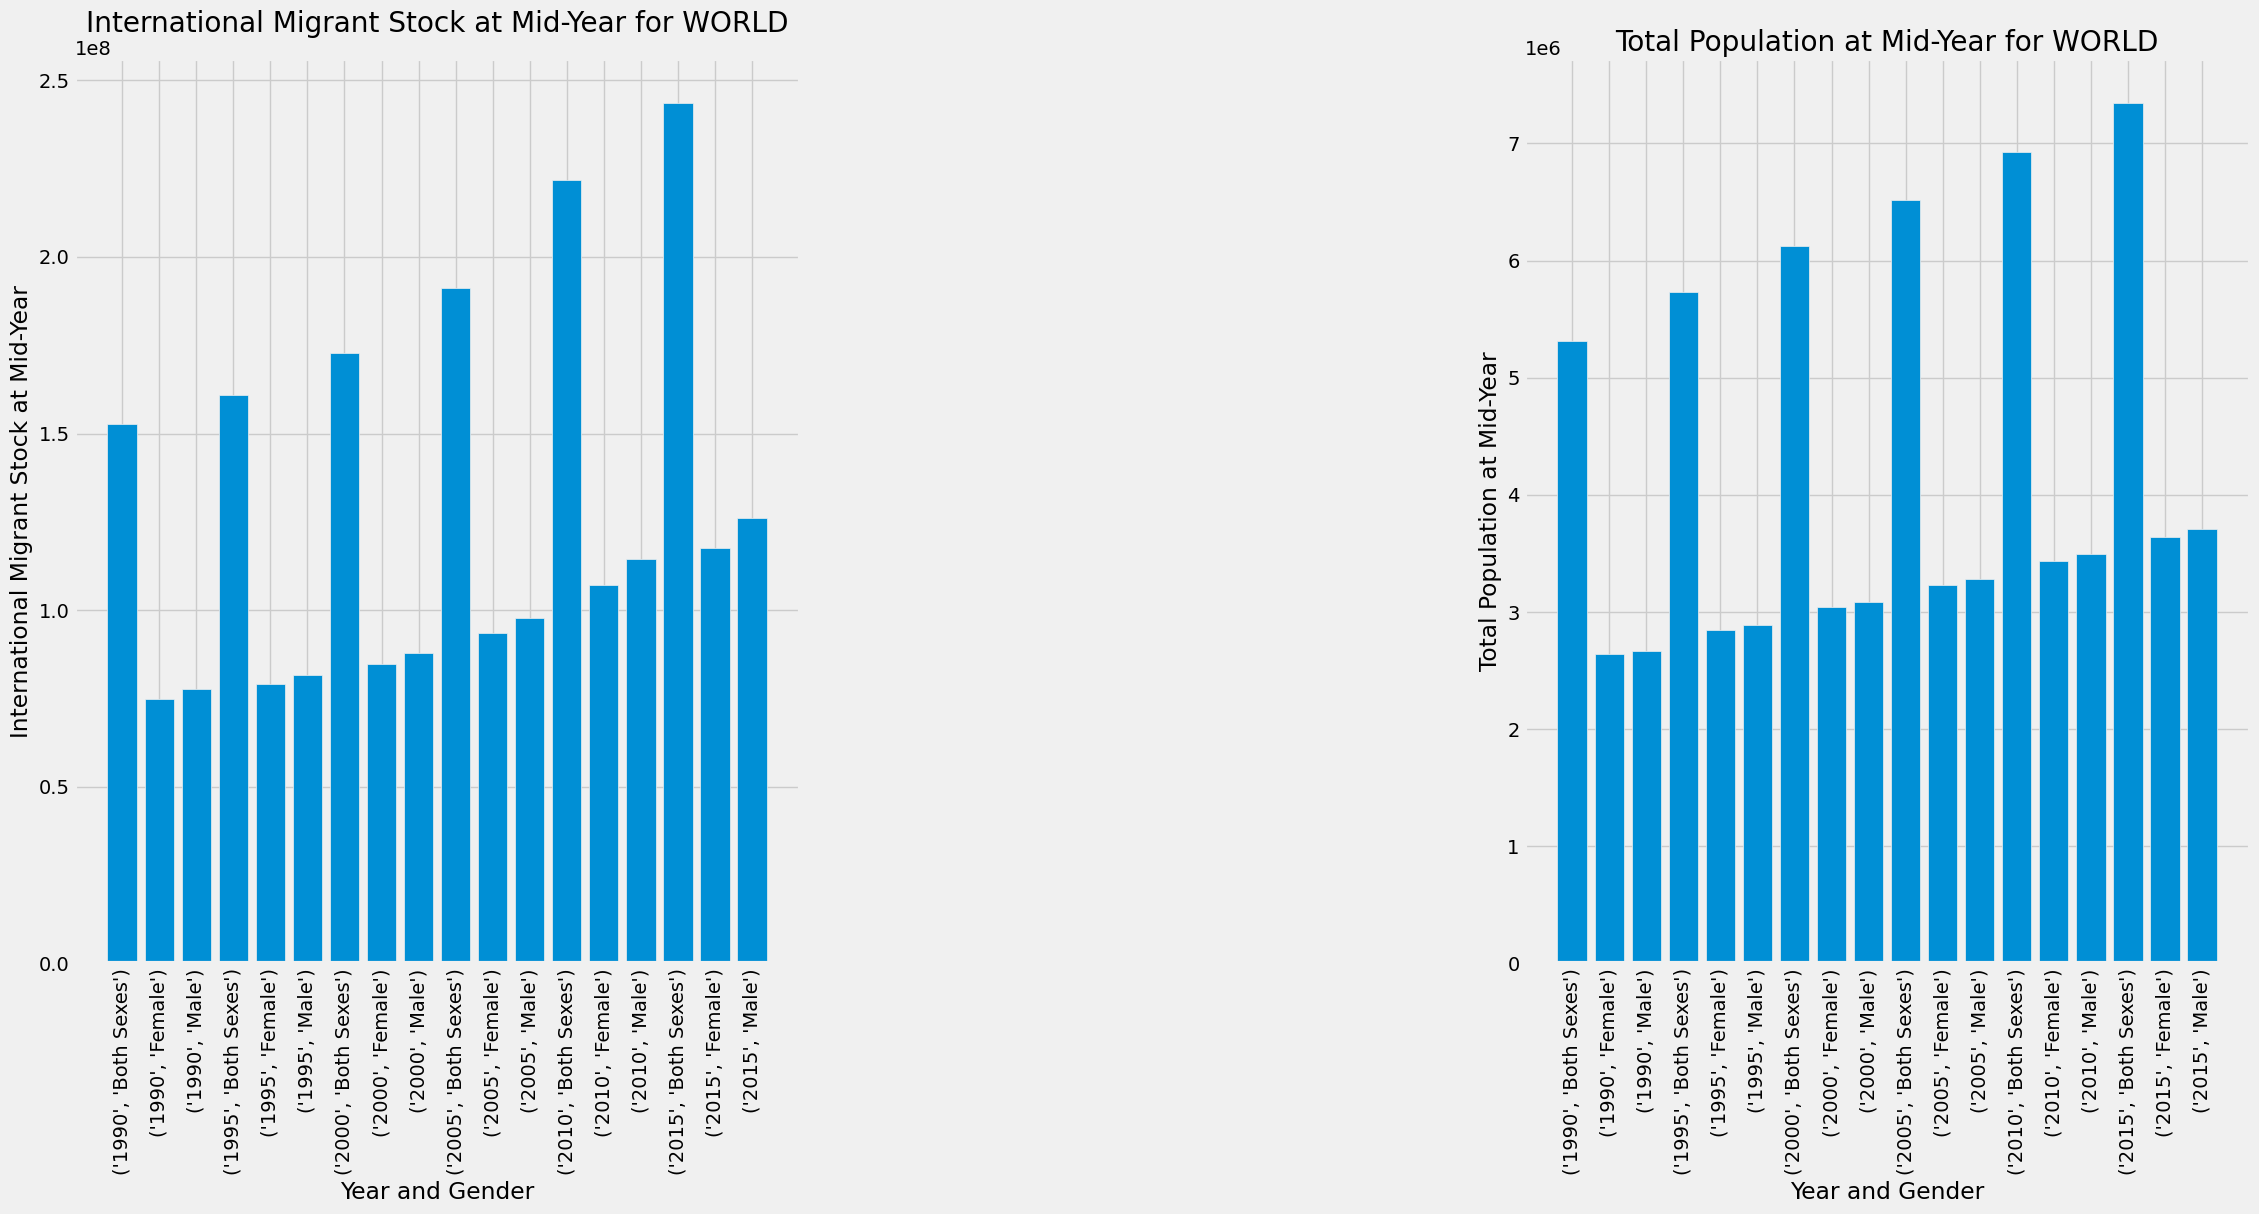

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_table12_ES.index, rotation=90)
C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data_table12_ES.index, rotation=90)


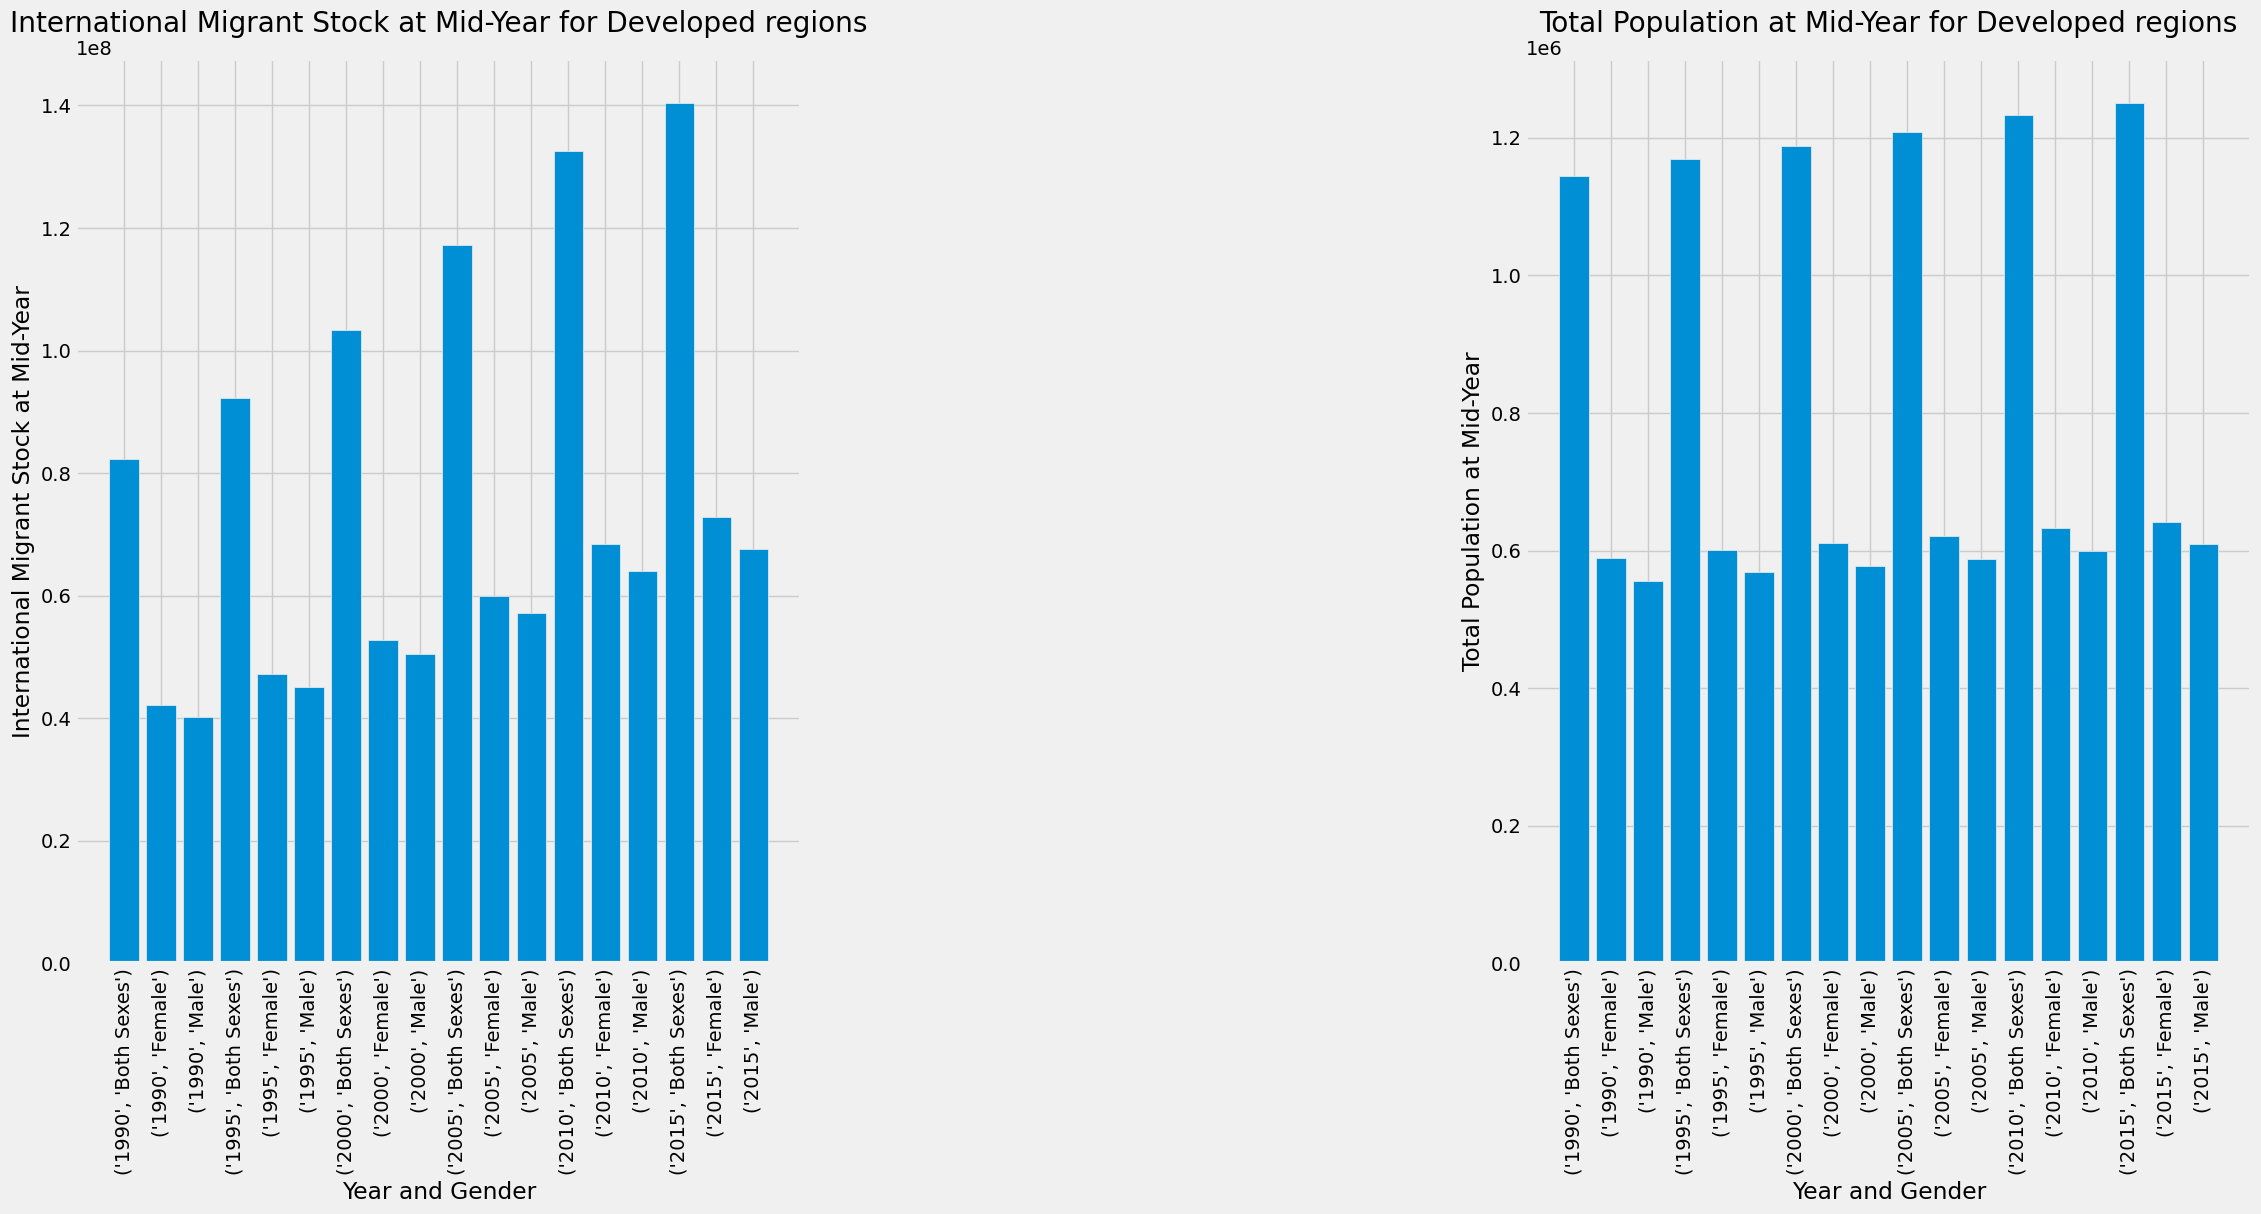

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_table12_ES.index, rotation=90)
C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data_table12_ES.index, rotation=90)


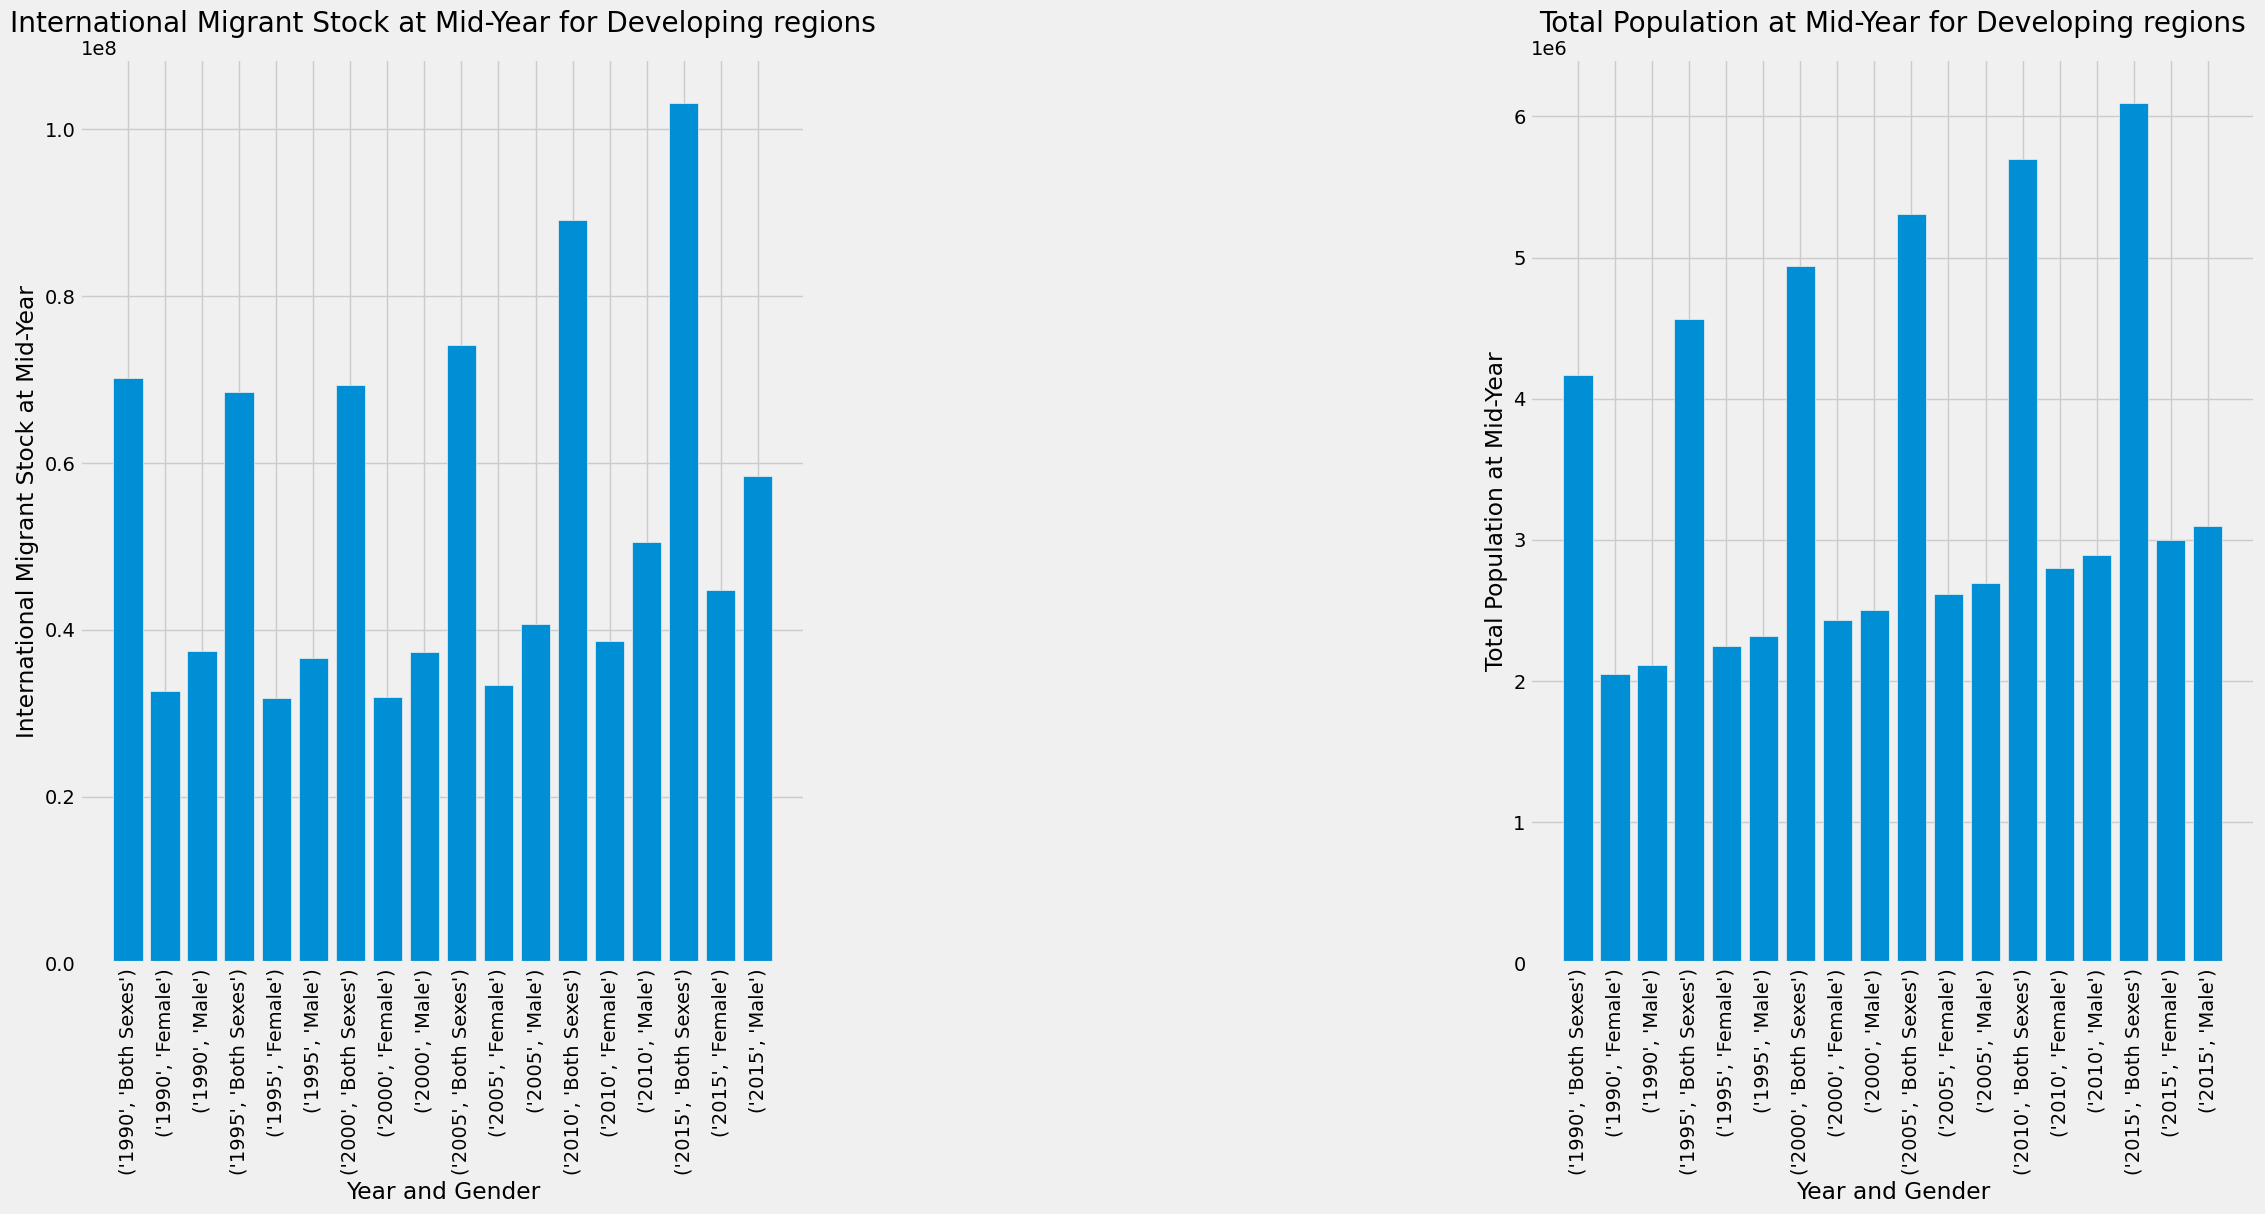

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_table12_ES.index, rotation=90)
C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data_table12_ES.index, rotation=90)


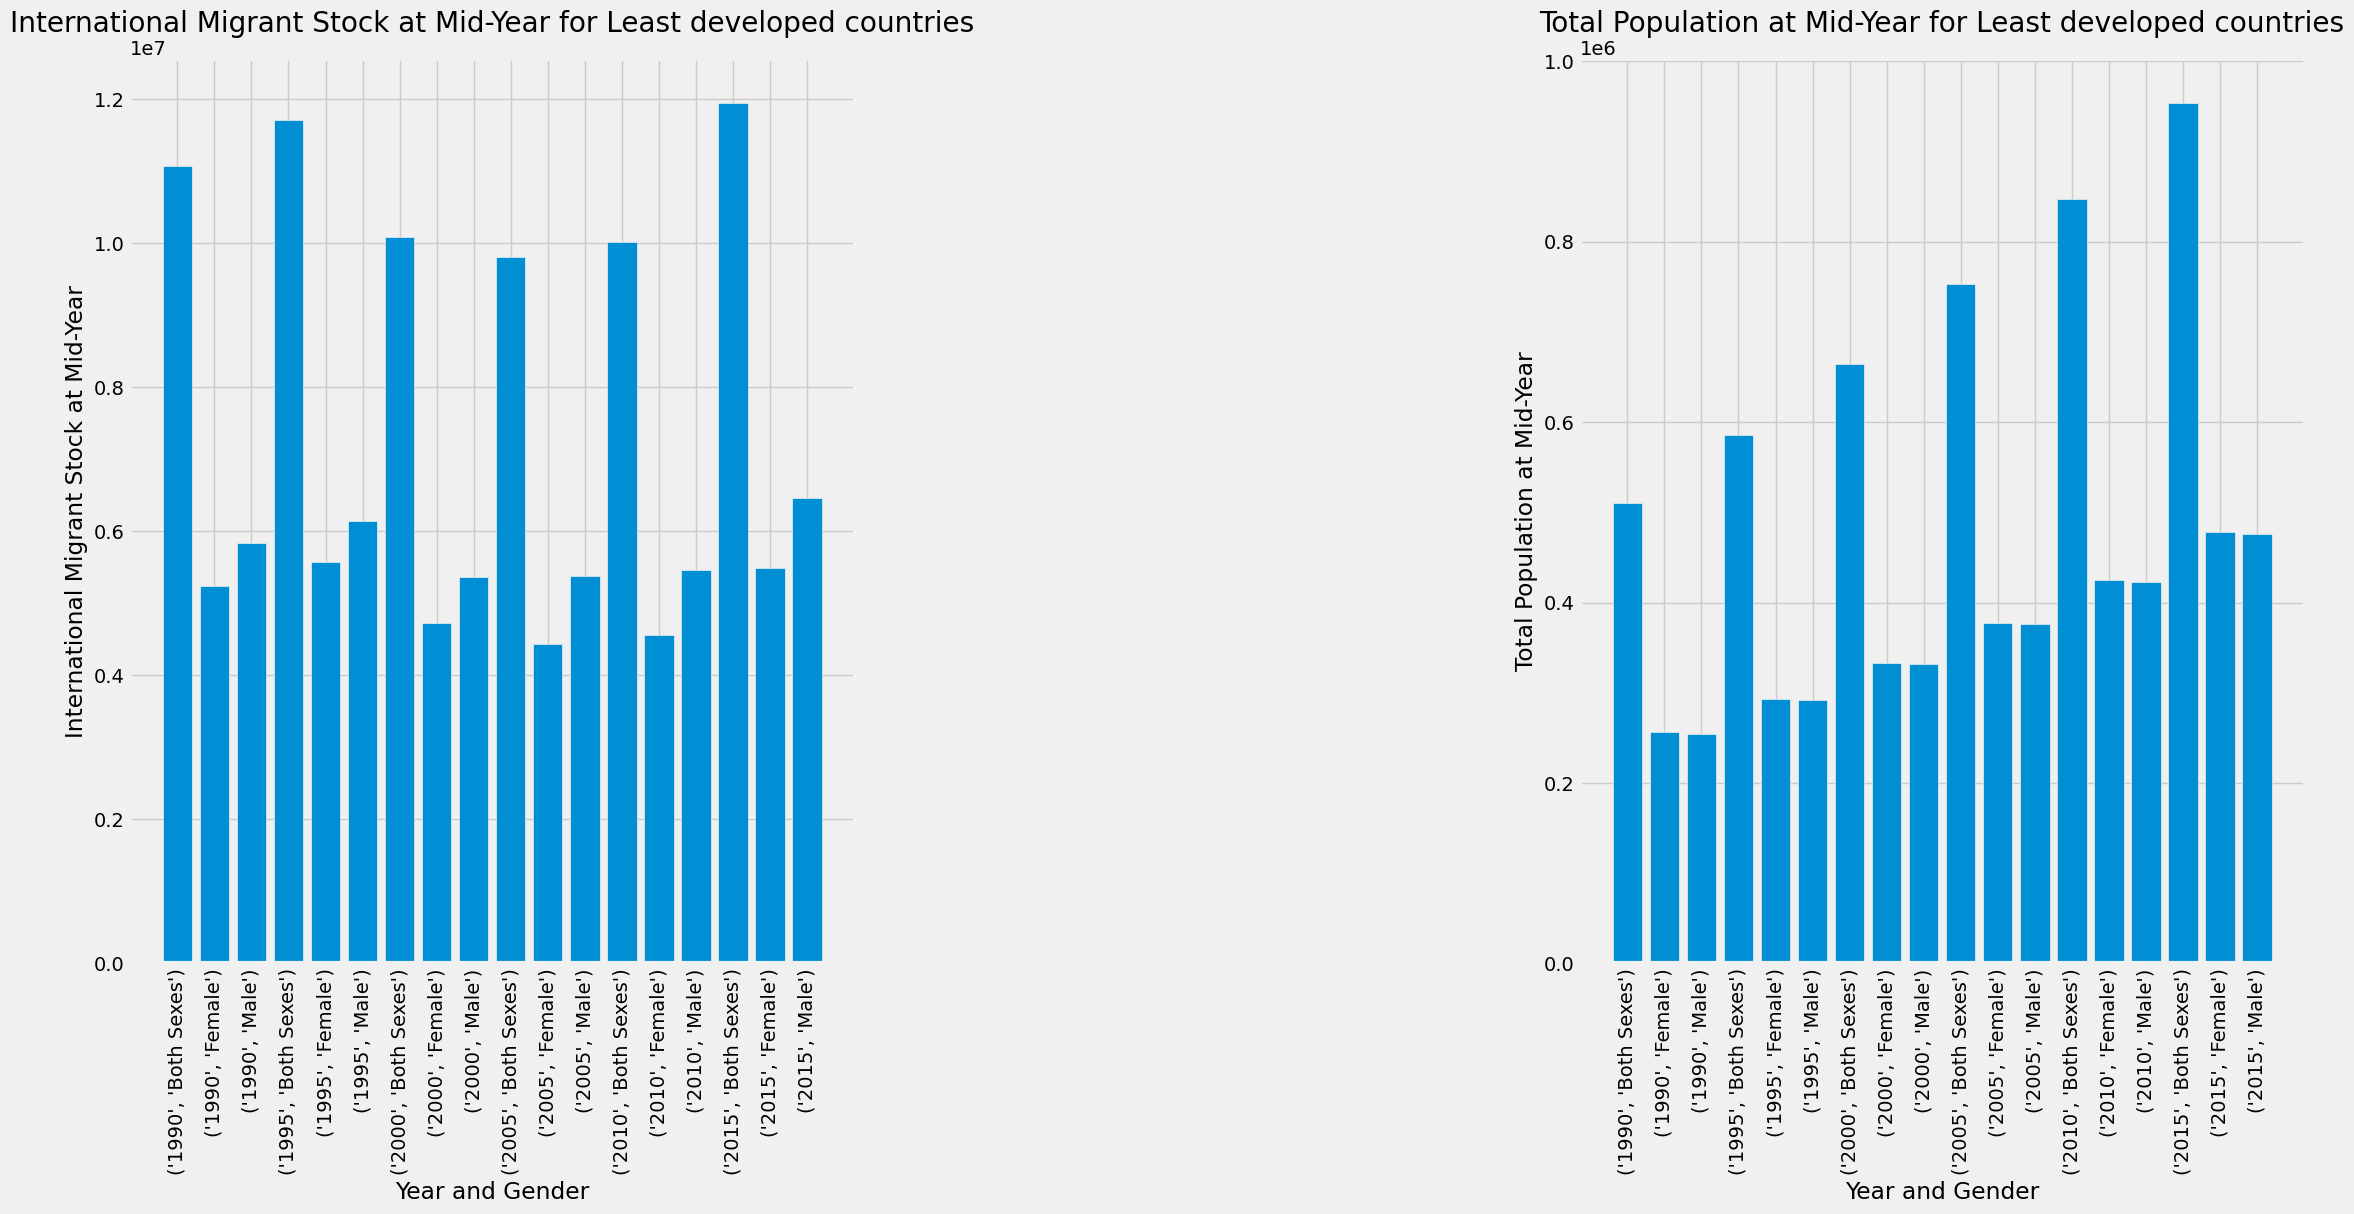

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_table12_ES.index, rotation=90)
C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data_table12_ES.index, rotation=90)


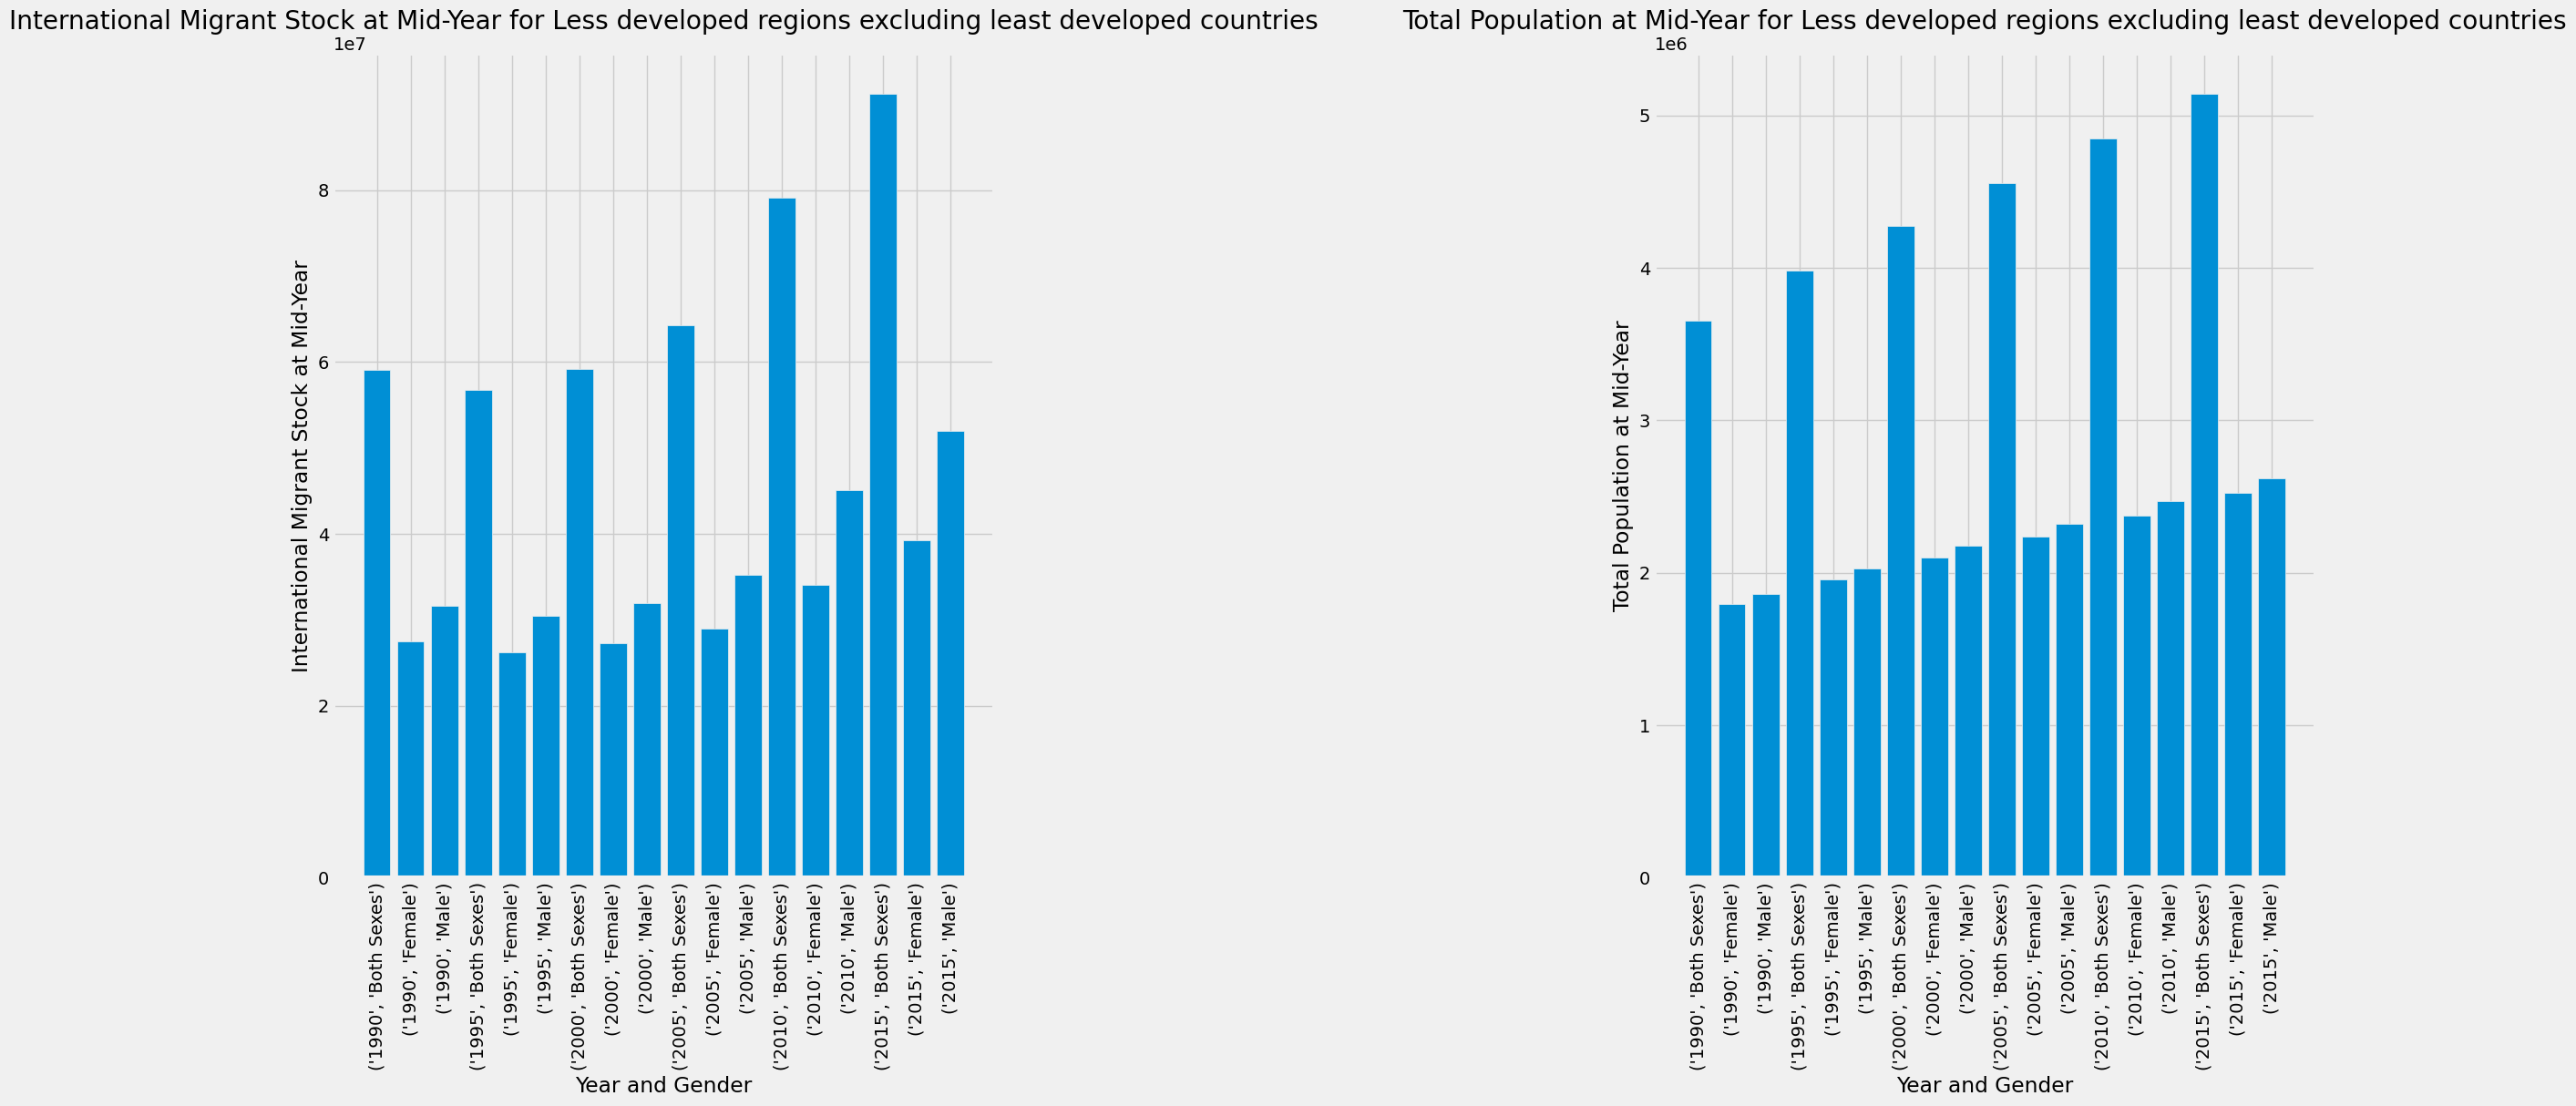

C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_table12_ES.index, rotation=90)
C:\Users\ftuzz\AppData\Local\Temp\ipykernel_22368\2892816497.py:39: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(data_table12_ES.index, rotation=90)


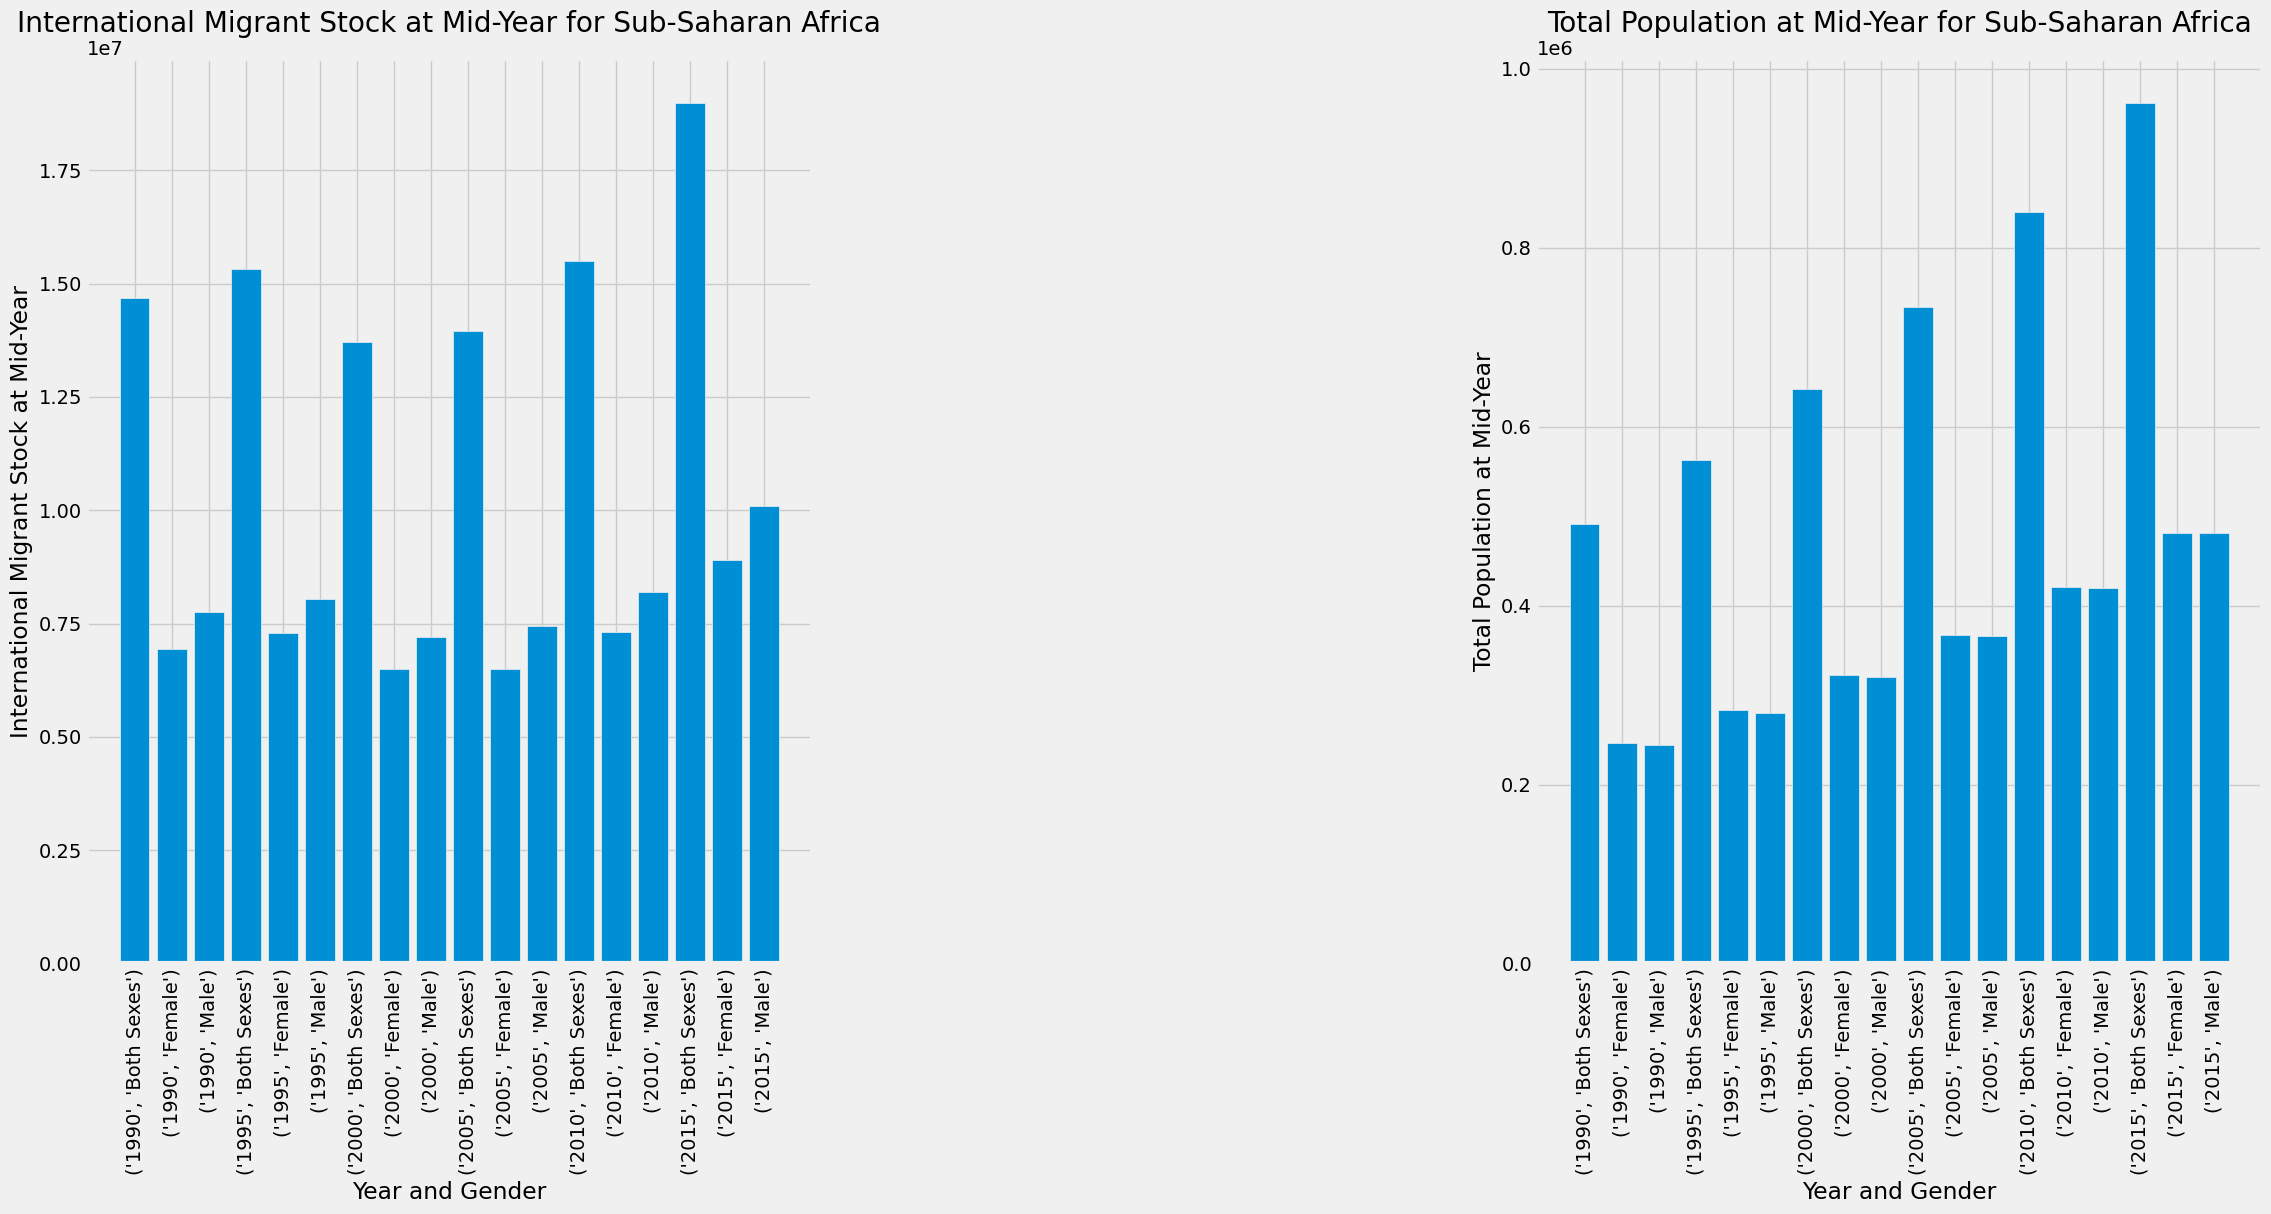

In [354]:
###Visualizing Table 1 & 2 Executive Summary using Barchart###

# List of locations to create bar graphs for
locations_t1ES = ['WORLD', 'Developed regions', 'Developing regions', 'Least developed countries', 'Less developed regions excluding least developed countries', 'Sub-Saharan Africa']

# Iterate over the locations
for location in locations_t1ES:
    # Filter the dataframe to only include the current location
    data_table12_ES = ES_table12[ES_table12['Location'] == location]

    # Group the data by year and gender
    data_table12_ES = data_table12_ES.groupby(['Year', 'Gender'])['International Migrant Stock at Mid-Year', 'Total Population at Mid-Year'].sum()

    # Convert the tuples in the index to strings
    data_table12_ES.index = map(str, data_table12_ES.index)

    # Create a figure with two axes
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 8))

    # Create a bar chart for the International Migrant Stock at Mid-Year data on the first axis
    ax1.bar(data_table12_ES.index, data_table12_ES['International Migrant Stock at Mid-Year'].values)

    # Set the labels for the x and y axes for the first chart
    ax1.set_xlabel('Year and Gender')
    ax1.set_ylabel('International Migrant Stock at Mid-Year')
    
    #Set the title for first chart
    ax1.set_title('International Migrant Stock at Mid-Year for ' +  location)

    # Rotate the x-axis tick labels for the first chart
    ax1.set_xticklabels(data_table12_ES.index, rotation=90)

    # Create a bar chart for the Total Population at Mid-Year data on the second axis
    ax2.bar(data_table12_ES.index, data_table12_ES['Total Population at Mid-Year'].values)

    # Set the labels for the x and y axes for the second chart
    ax2.set_xlabel('Year and Gender')
    ax2.set_ylabel('Total Population at Mid-Year')

    # Rotate the x-axis tick labels for the second chart
    ax2.set_xticklabels(data_table12_ES.index, rotation=90)
    
    #Set the title for second chart
    ax2.set_title('Total Population at Mid-Year for ' +  location)

    # Add space between the title and the plots
    plt.subplots_adjust(top=1.2)
    
    
    # Add space between the subplots
    fig.subplots_adjust(wspace=1)

    # Show the plot
    plt.show()


In [378]:
##Cleaning Table 3##

#Read Table 3 on Excel without the first 14 rows
data_table3 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', 'Table 3', skiprows=14)


##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values


# The years are in the first row. To fix that problem, we have to change it into columns with their corresponding values. 
data_table3.columns = data_table3.iloc[0]

# Manually re-write the column names and organize based off of desired names
data_table3.columns = ['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
'1990MF', '1995MF', '2000MF', '2005MF', '2010MF', '2015MF', '1990M', '1995M', '2000M', '2005M', '2010M', '2015M', '1990F', '1995F', '2000F', '2005F', '2010F', '2015F']

#Remove the first row                        
data_table3 = data_table3.iloc[1: , :]

#Create a column name called demographic that has the year+gender values
data_table3 = data_table3.melt(id_vars=['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name=["demographic"],value_name="International Migrant Stock as a Percentage of Total Population") 

##Problem: There are multiple variables stored in one column 
#Tidy data principle 2: Each column needs to consist of one and only one variable
#Solution: Split the demographic column into gender and years 
data_table3=(data_table3.assign(Year = lambda x: x.demographic.str[0:4].astype(str), Gender = lambda x: x.demographic.str[4:].astype(str)).drop("demographic",axis=1))

#Styling the dataset: Changing MF to Both sexes, M to male, F to females. Change Sort order column name to Sort Order 
data_table3 = (data_table3.replace(to_replace =["MF","M","F"],value =["Both Sexes","Male","Female"]))
data_table3 = data_table3.rename(columns={'Sort order': 'Sort Order'})        


#Drop the empty cells that contain value = .. 
data_table3['International Migrant Stock as a Percentage of Total Population'].replace('..', np.nan, inplace = True)  
data_table3.dropna(subset=['International Migrant Stock as a Percentage of Total Population'], inplace=True)

##Problem: The first 6 rows contain values whose country code does not exist in the annex. These rows also are sums of the other rows and do not belong under the same column. 
#Tidy data principle #4: each table column needs to have a singular data type 
#Solution: We created a seperate table that holds an executive summary of the International Migrant Stock as a Percentage of Total Population

#Create a new dataframe containing desired columns
table3_executive_summary = data_table3[['Major area, region, country or area of destination', 'Notes', 'International Migrant Stock as a Percentage of Total Population', 'Year', 'Gender']].copy()

# new_table3_ES has only the values "WORLD", "Developed regions", "Developing regions", etc
values=["WORLD","Developed regions", "Developing regions", "Least developed countries", "Less developed regions excluding least developed countries", "Sub-Saharan Africa"]
new_table3_ES = table3_executive_summary[table3_executive_summary["Major area, region, country or area of destination"].isin(values)] 

new_table3_ES = new_table3_ES.reset_index(drop=True)

#Rename 
new_table3_ES = new_table3_ES.rename({'Major area, region, country or area of destination': 'Location'}, axis=1) 


# fix table 3 and remove all values in the values list
new_table3 = data_table3[~data_table3["Major area, region, country or area of destination"].isin(values)] 
new_table3 = new_table3.reset_index(drop=True)


#Problem: Major area, region, country or area of destination has multiple variables in the column and different variables in the rows. 
#tidy data principle #3: variables need to be in cells, not rows and columns
#Solution: Add a new column called "Category" that seperates the major area, region, country/area of destination 

# function to assign values in the category values of the new column 
def category(df):
    if df['Sort Order'] in list_major_area_num:
        return 'Major Area'
    elif df['Sort Order'] in list_region_num:
        return 'Region'
    return 'Country/Area'

new_table3 = new_table3.rename(columns={'Major area, region, country or area of destination': 'Location', 'Country code': 'Country Code'})


# change the floats type into ints
new_table3['Country Code'] = new_table3['Country Code'].astype(int)
new_table3['Sort Order'] = new_table3['Sort Order'].astype(int)

#Add category column
new_table3['Category'] = new_table3.apply(category, axis = 1)


#reorder the columns so that it follows order: sort order, country code..
new_table3 = new_table3[['Sort Order', 'Location', 'Category','Country Code', 'Notes', 'International Migrant Stock as a Percentage of Total Population', 'Year', 'Gender']]



#view
new_table3_ES.head()


Location Notes  \
0                                              WORLD   NaN   
1                                  Developed regions   (b)   
2                                 Developing regions   (c)   
3                          Least developed countries   (d)   
4  Less developed regions excluding least develop...   NaN   

   International Migrant Stock as a Percentage of Total Population  Year  \
0                                           2.873310                1990   
1                                           7.198015                1990   
2                                           1.685021                1990   
3                                           2.171513                1990   
4                                           1.617042                1990   

       Gender  
0  Both Sexes  
1  Both Sexes  
2  Both Sexes  
3  Both Sexes  
4  Both Sexes

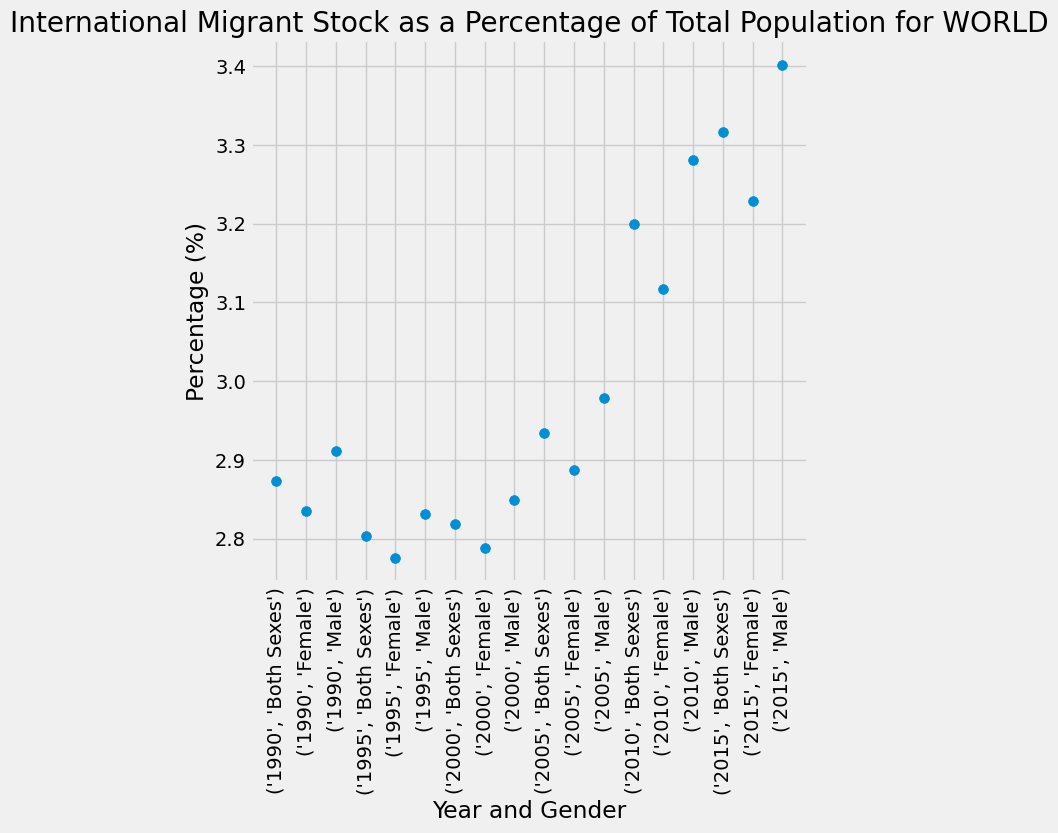

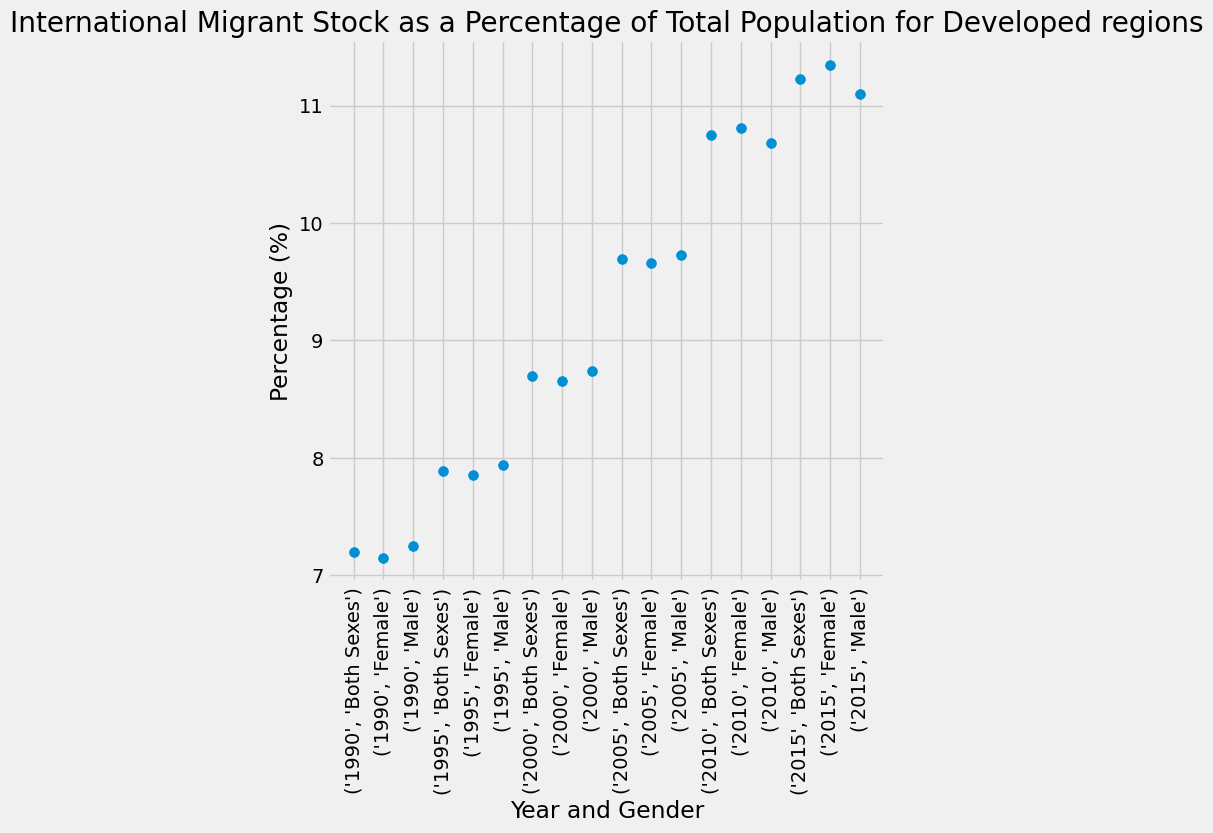

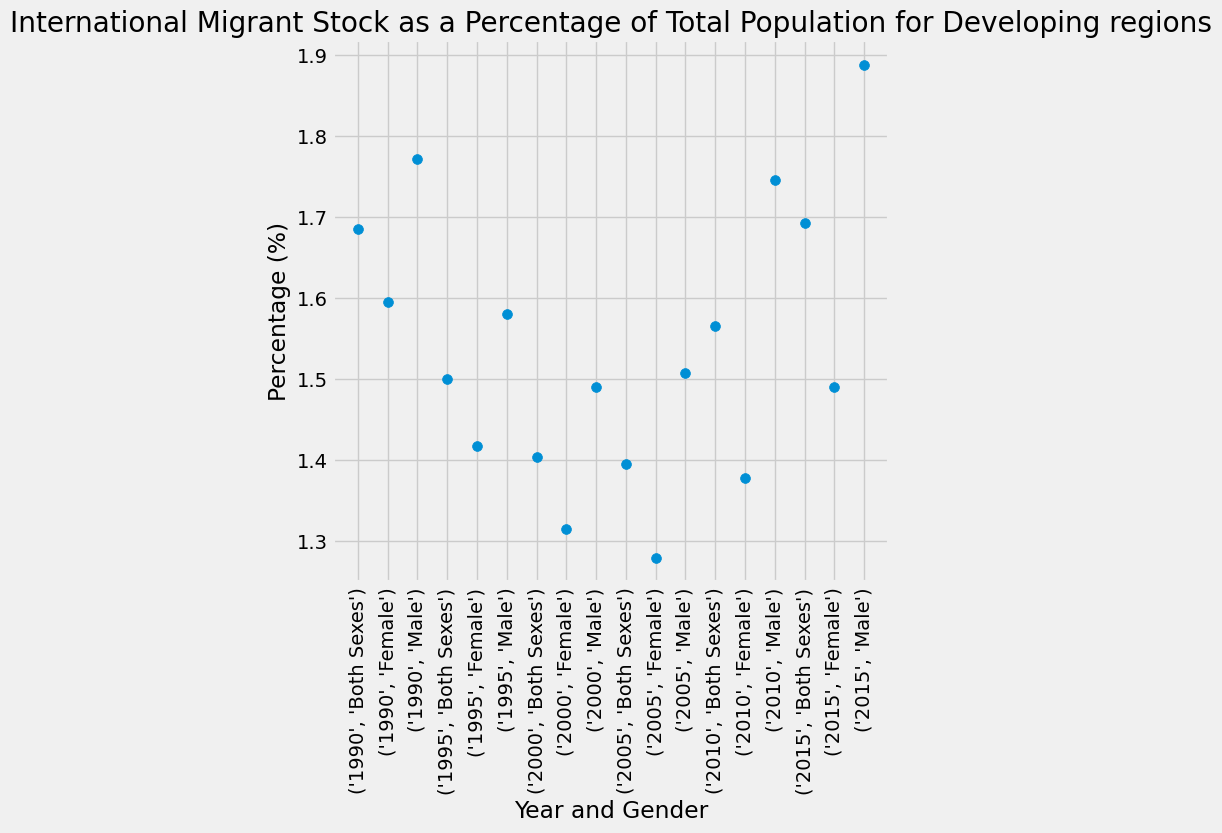

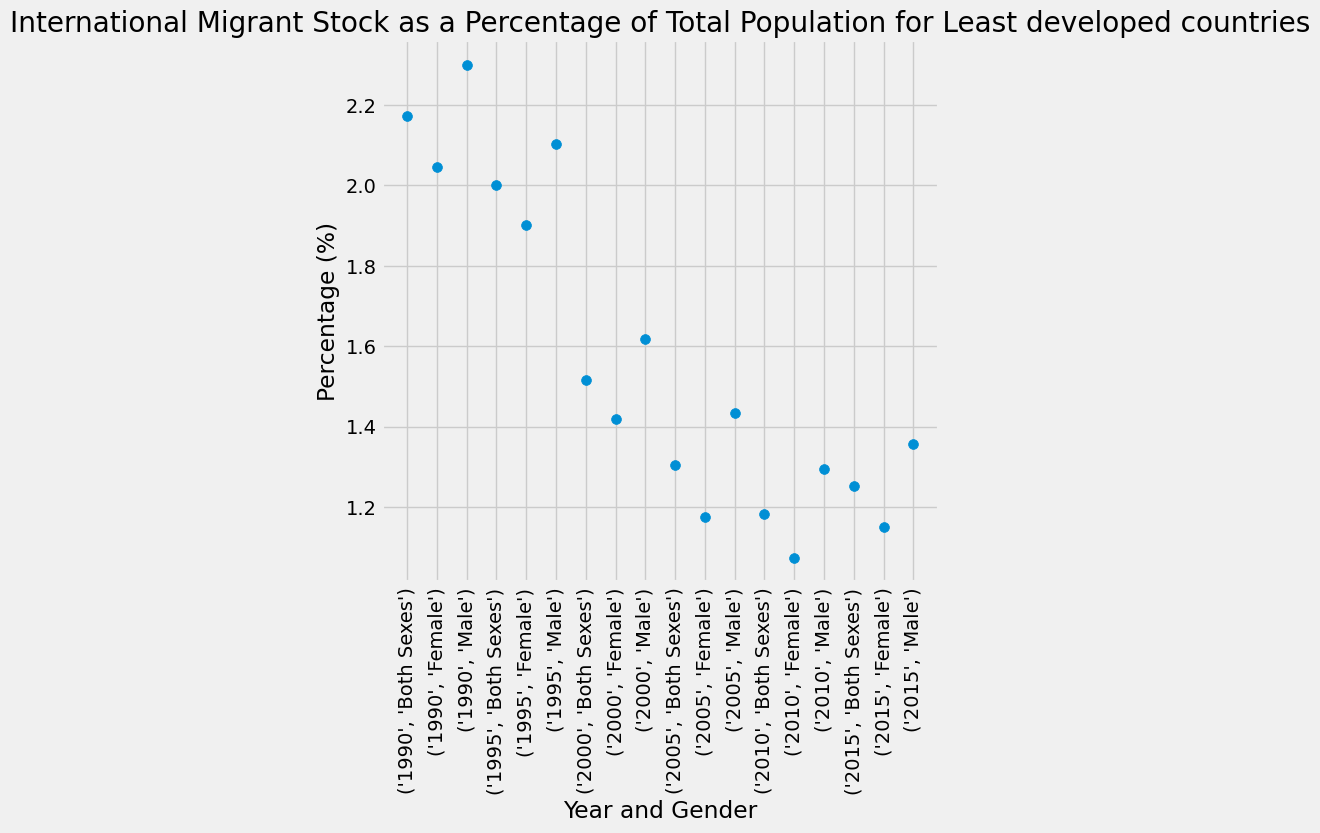

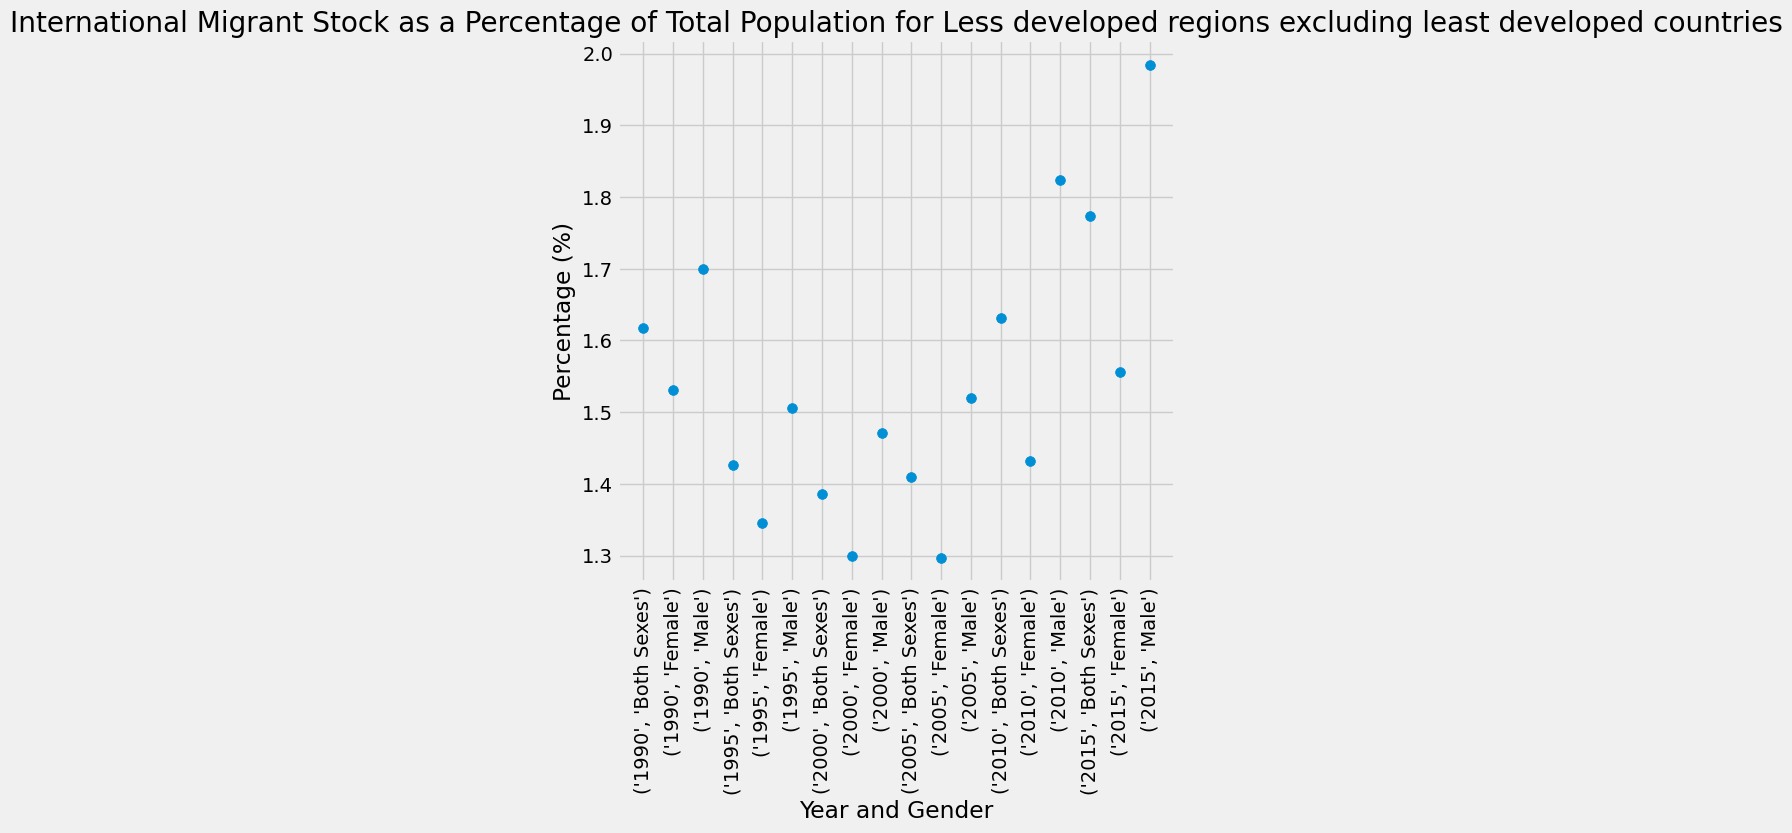

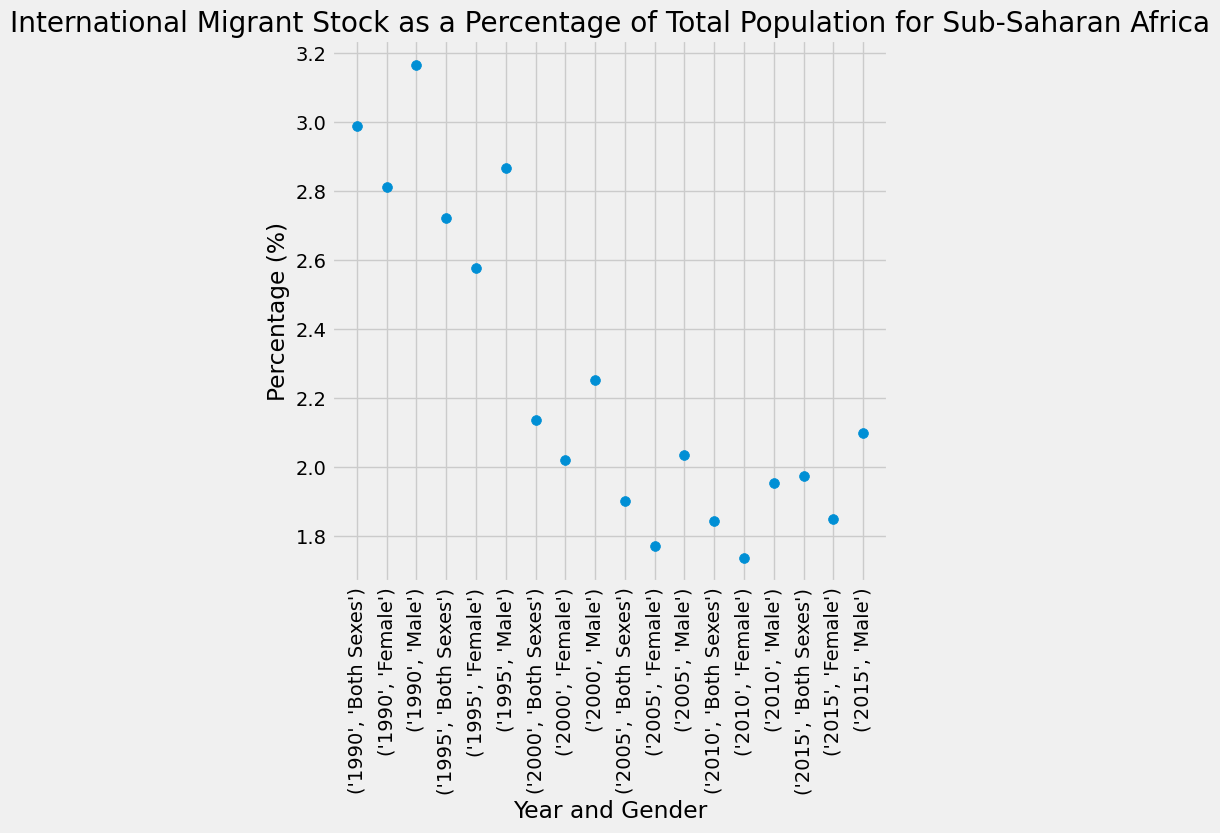

In [412]:
###Visualizing Table 3 Executive Summary using Scatterplot###

# List of locations to create scatter plots for
locations_t1ES = ['WORLD', 'Developed regions', 'Developing regions', 'Least developed countries', 'Less developed regions excluding least developed countries', 'Sub-Saharan Africa']

# Iterate over the locations
for location in locations_t1ES:
    # Filter the dataframe to only include the current location
    data_table3_ES = new_table3_ES[new_table3_ES['Location'] == location]

    # Group the data by year and gender
    data_table3_ES = data_table3_ES.groupby(['Year', 'Gender'])['International Migrant Stock as a Percentage of Total Population'].sum()

    # Convert the tuples in the index to strings
    data_table3_ES.index = map(str, data_table3_ES.index)

    # Create a scatter plot
    plt.scatter(data_table3_ES.index, data_table3_ES.values, s=50)

    # Set the labels for the x and y axes
    plt.xlabel('Year and Gender')
    plt.ylabel('Percentage (%)')

    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=1.2)

    # Add a title
    plt.title('International Migrant Stock as a Percentage of Total Population for ' + location)

    # Show the plot
    plt.show()

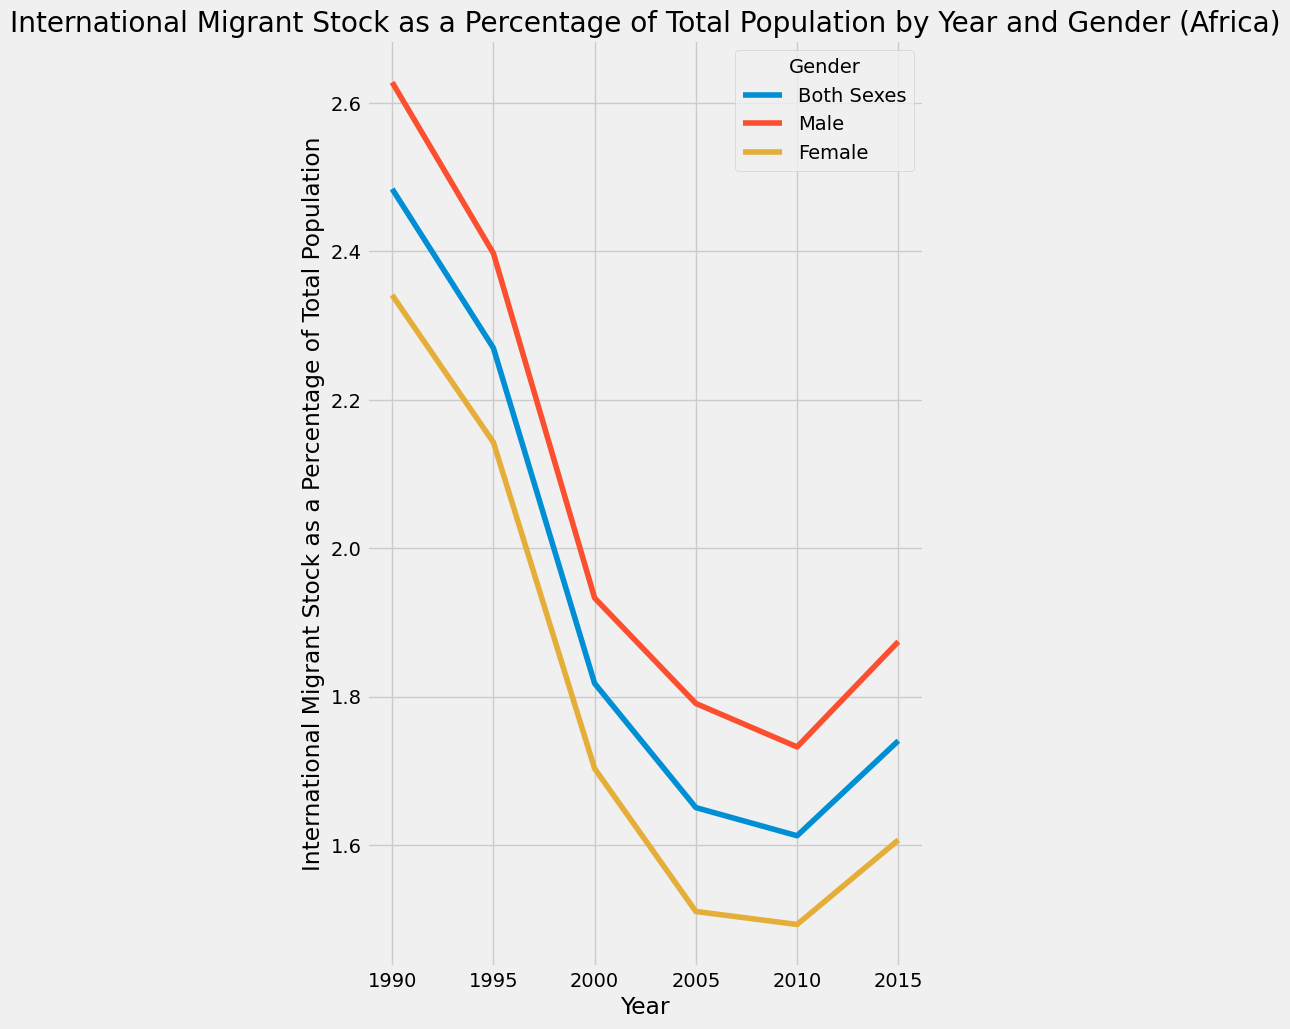

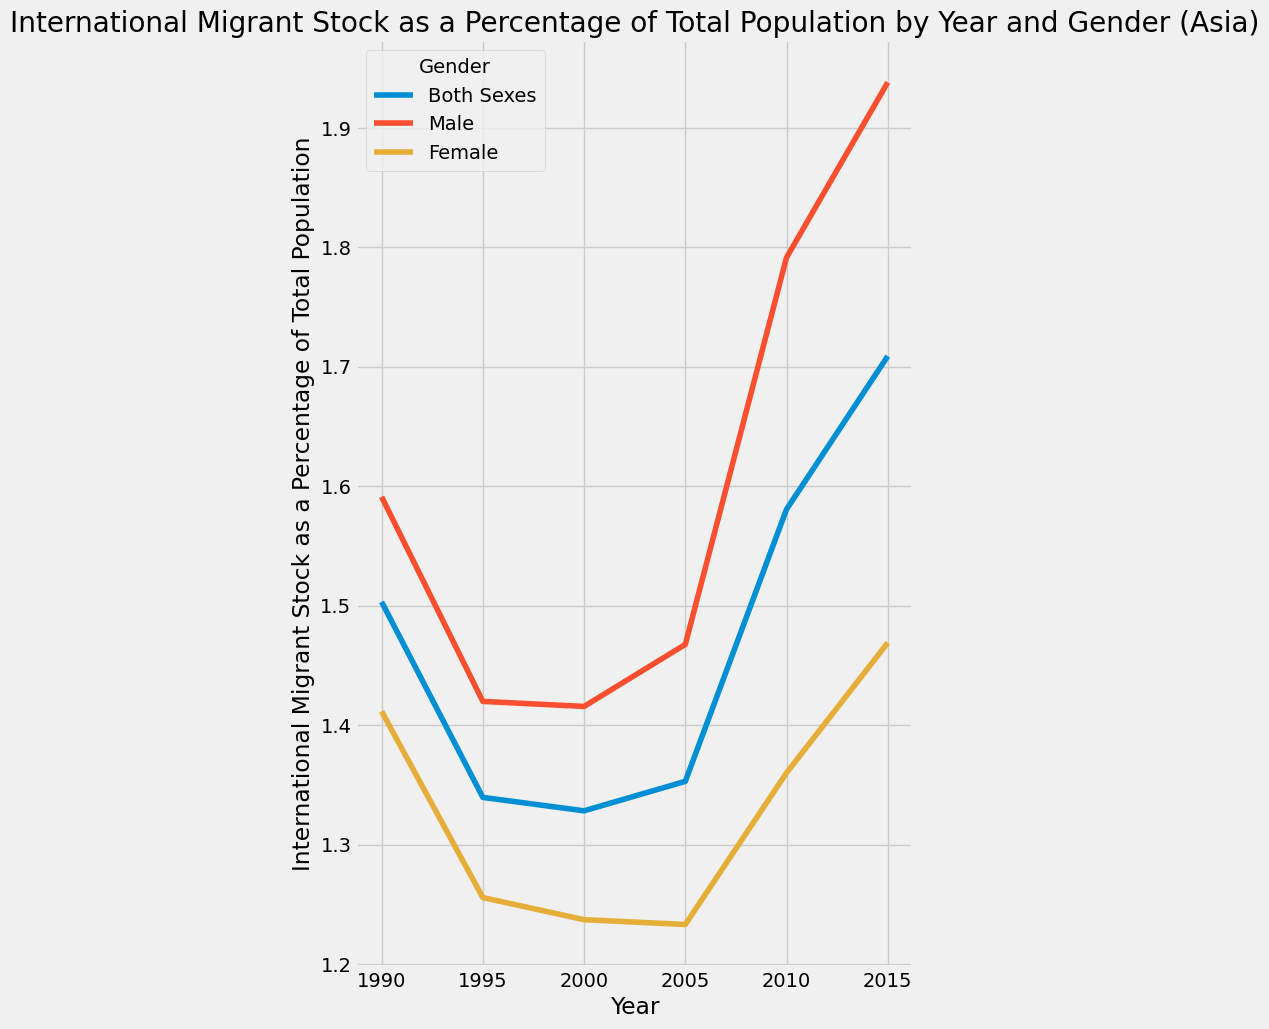

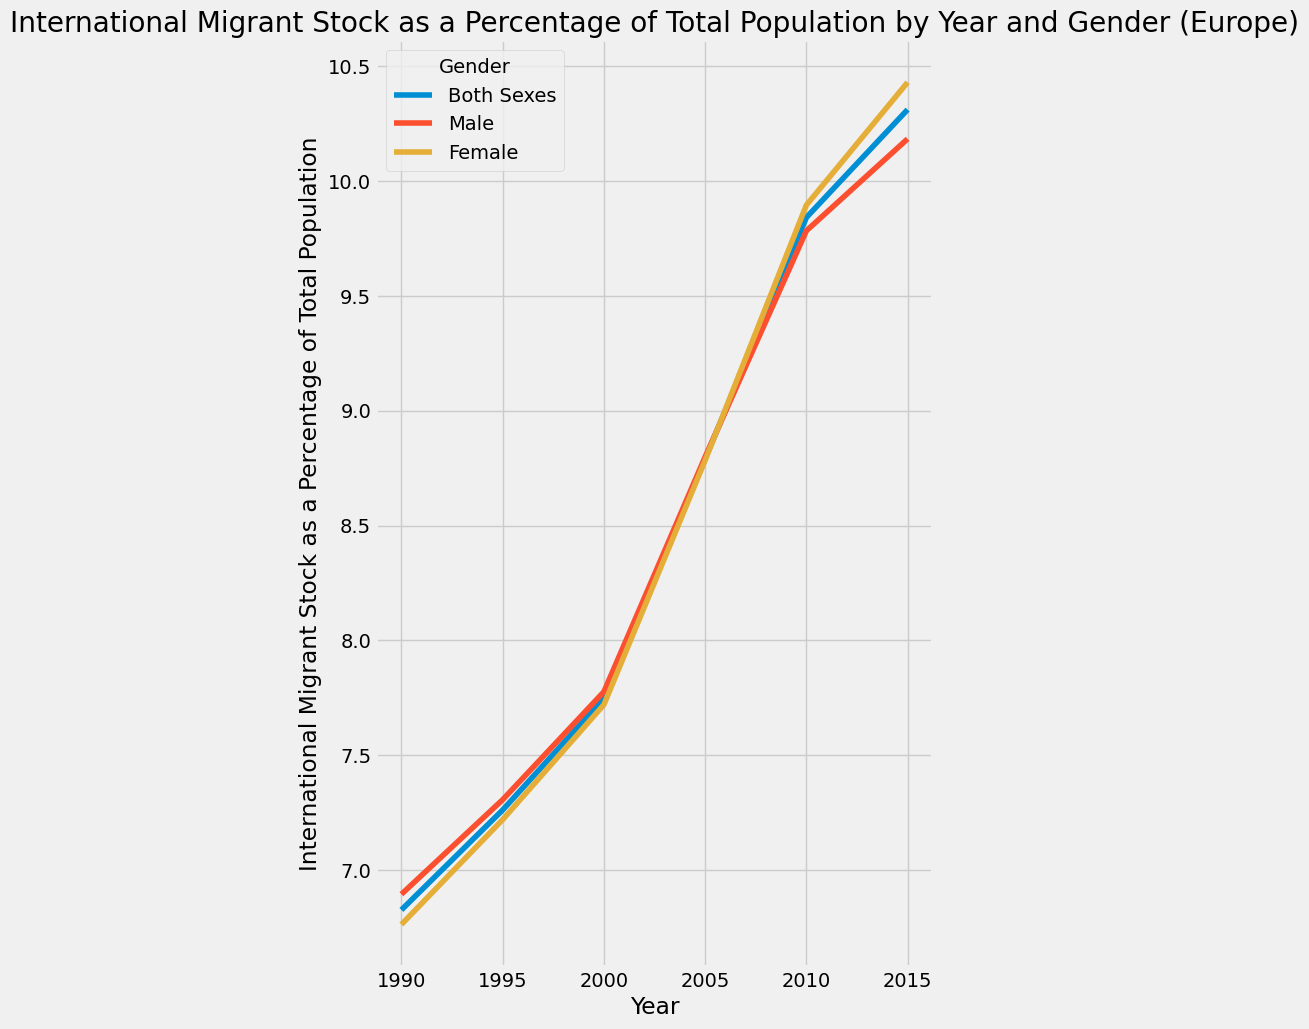

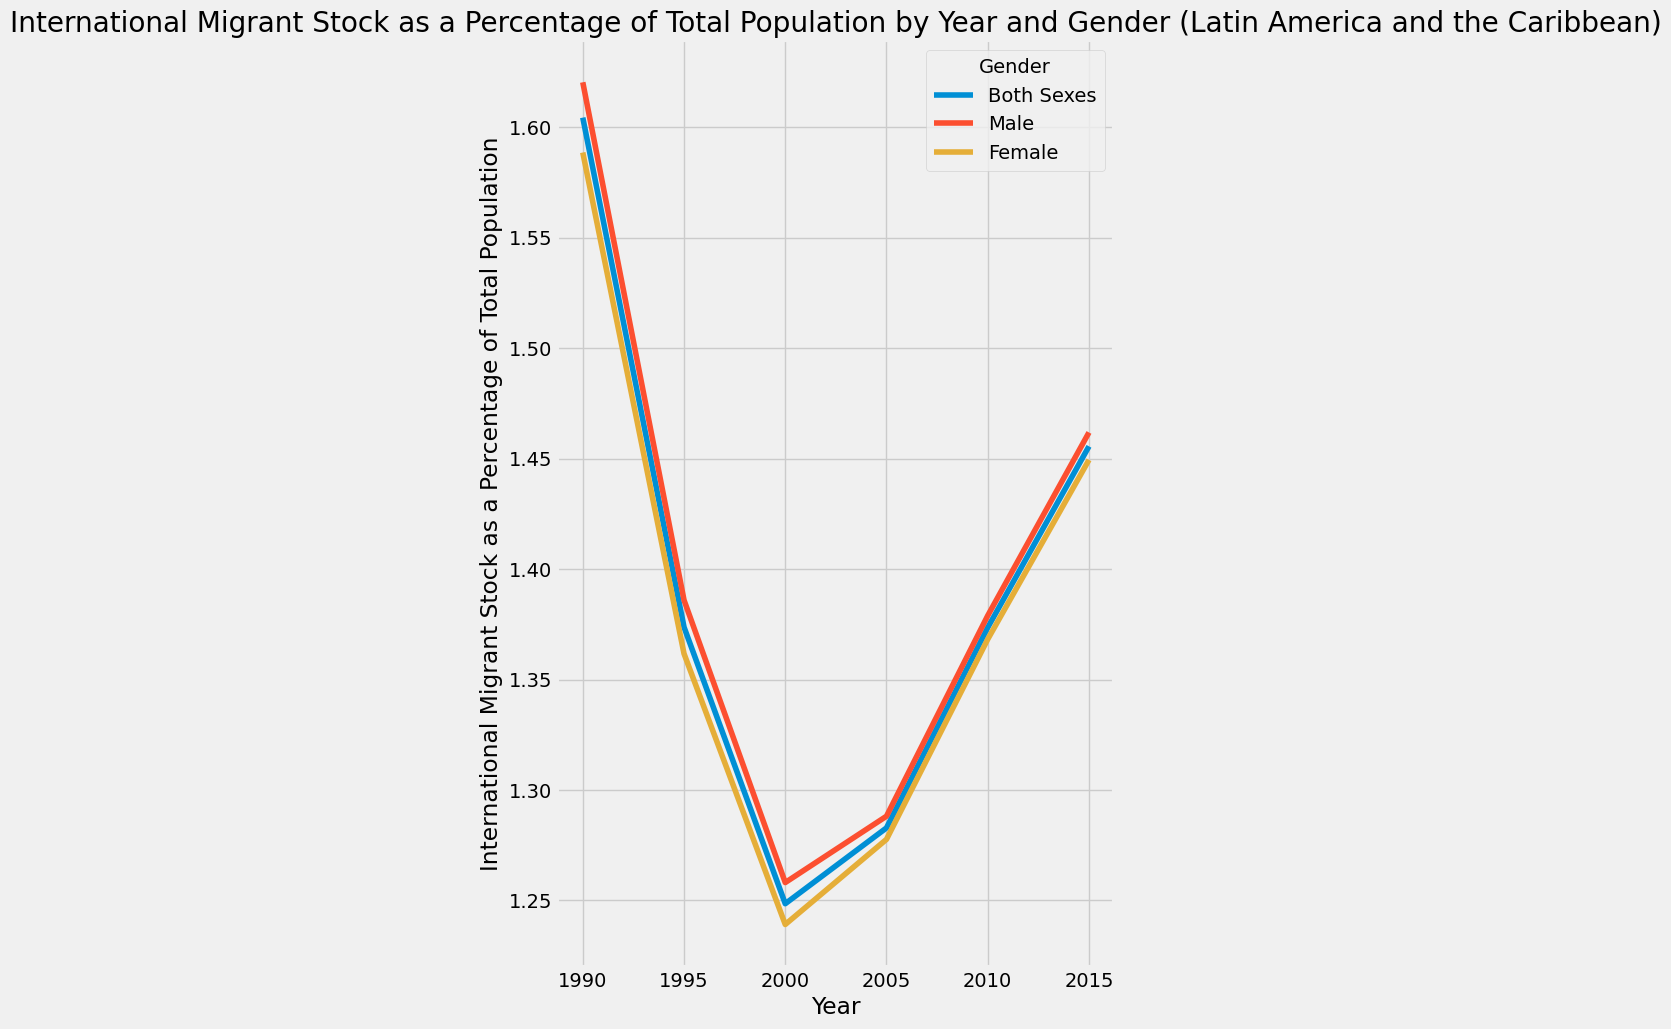

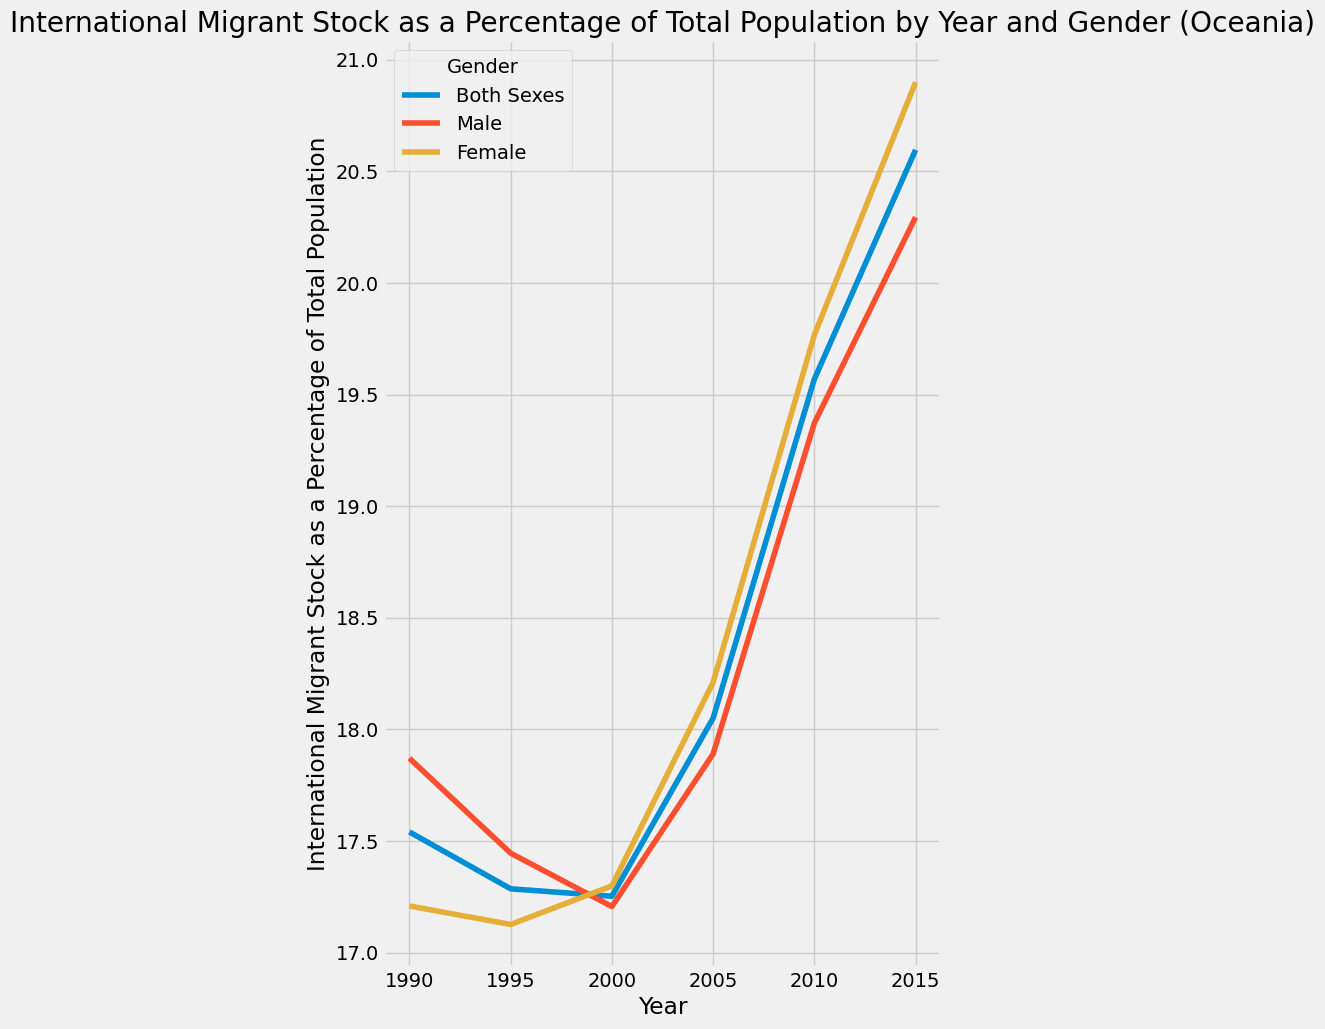

In [377]:
###Visualizing Table 3 by Major Area using Lineplot###


# Load the dataframe
df3 = new_table3

# Filter the dataframe to include only rows where the "Category" column is equal to "Major Area"
df3_major_area = df3[df3["Category"] == "Major Area"]

# Create a list of the major areas
major_areas = ["Africa", "Asia", "Europe", "Latin America and the Caribbean", "Oceania"]

# Loop over the list of major areas
for area in major_areas:
    # Filter the dataframe to include only rows where the "Location" column is equal to the current major area
    df3_area = df3_major_area[df3_major_area["Location"] == area]

    # Create the line plot
    ax_LP3 = sns.lineplot(data=df3_area, x="Year", y="International Migrant Stock as a Percentage of Total Population", hue="Gender")
    
    # Add grid lines
    ax_LP3.grid(True)

    # Add a title to the plot
    plt.title(f"International Migrant Stock as a Percentage of Total Population by Year and Gender ({area})")
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=2)

    # Show the plot
    plt.show()


In [400]:
##Cleaning Table 4##

#Read Table 4 on Excel without the first 14 rows
data_table4 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', 'Table 4', skiprows=14)

##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values

# The years are in the first row. To fix that problem, we have to change it into columns with their corresponding values. 
data_table4.columns = data_table4.iloc[0]

#Manually re-write the column names and organize based off of desired column names 
data_table4.columns = ['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
'1990F', '1995F', '2000F', '2005F', '2010F', '2015F']


#Remove the first row                        
data_table4 = data_table4.iloc[1: , :]

#Create a column name called demographic that has the year+gender values

data_table4 = data_table4.melt(id_vars=['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name=["demographic"],value_name="Migrants as Percentage of the International Migrant Stock") 

##Problem: There are multiple variables (gender and year) stored in one column (demographic) 
#Tidy data principle 2: Each column needs to consist of one and only one variable
#Solution: Split the demographic column into gender and years 

data_table4 = (data_table4.assign(Year = lambda x: x.demographic.str[0:4].astype(str), Gender = lambda x: x.demographic.str[4:].astype(str)).drop("demographic",axis=1))

#Styling the dataset: Changing F females. Change Sort\norder column name to Sort Order

data_table4 = (data_table4.replace(to_replace =["F"],value =["Female"]))
data_table4 = data_table4.rename(columns={'Sort order': 'Sort Order'})    

#Drop the empty cells that contain value = .. 
data_table4['Migrants as Percentage of the International Migrant Stock'].replace('..', np.nan, inplace = True)  
data_table4.dropna(subset=['Migrants as Percentage of the International Migrant Stock'], inplace=True)

##Problem: The first 6 rows contain values whose country code does not exist in the annex. These rows also are sums of the other rows and do not belong under the same column. 
#Tidy data principle #4: each table column needs to have a singular data type 
#Solution: We created a seperate table that holds an executive summary of the Migrants as Percentage of the International Migrant Stock 

#Create a new dataframe containing desired columns

table4_executive_summary = data_table4[['Major area, region, country or area of destination', 'Notes', 'Migrants as Percentage of the International Migrant Stock', 'Year', 'Gender']].copy()

#table4_ES has only the values "WORLD", "Developed regions", "Developing regions", "Least developed countries", "Least developed regions", and "Sub-Saharan Africa"

values=["WORLD","Developed regions", "Developing regions", "Least developed countries", "Less developed regions excluding least developed countries", "Sub-Saharan Africa"]
table4_ES = table4_executive_summary[table4_executive_summary["Major area, region, country or area of destination"].isin(values)] 

table4_ES = table4_ES.reset_index(drop=True)

#Rename 
table4_ES = table4_ES.rename({'Major area, region, country or area of destination': 'Location'}, axis=1) 


#Fix table 1 and remove all values in the values list
new_table4 = data_table4[~data_table4["Major area, region, country or area of destination"].isin(values)] 
new_table4 = new_table4.reset_index(drop=True)


#Problem: Major area, region, country or area of destination has multiple variables in the column and different variables in the rows. 
#tidy data principle #3: variables need to be in cells, not rows and columns
#Solution: Add a new column called "Category" that seperates the major area, region, country/area of destination 

#Create list
list_major_area_num = [7, 71, 127, 180, 238]
list_region_num = [8, 29, 39, 47, 53, 72, 78, 86, 98, 108, 128, 139, 153, 170, 181, 208, 217, 232, 239, 242, 248, 256]

# function to assign values in the category values of the new column 
def category(df):
    if df['Sort Order'] in list_major_area_num:
        return 'Major Area'
    elif df['Sort Order'] in list_region_num:
        return 'Region'
    return 'Country/Area'

new_table4 = new_table4.rename(columns={'Major area, region, country or area of destination': 'Location', 'Country code': 'Country Code'})

# #change the float types into ints
new_table4['Sort Order'] = new_table4['Sort Order'].astype(int)
new_table4['Country Code'] = new_table4['Country Code'].astype(int)

# #Add category column
new_table4['Category'] = new_table4.apply(category, axis = 1)

# #reorder the columns so that it follows order: sort order, country code..
new_table4 = new_table4[['Sort Order', 'Location', 'Category','Country Code', 'Notes', 'Type of data (a)', 'Migrants as Percentage of the International Migrant Stock', 'Year', 'Gender']]

#view new_table4
new_table4.tail()



Sort Order                   Location      Category  Country Code Notes  \
1534         261                      Samoa  Country/Area           882   NaN   
1535         262                    Tokelau  Country/Area           772   NaN   
1536         263                      Tonga  Country/Area           776   NaN   
1537         264                     Tuvalu  Country/Area           798   NaN   
1538         265  Wallis and Futuna Islands  Country/Area           876   NaN   

     Type of data (a)  \
1534                B   
1535                B   
1536                B   
1537                C   
1538                B   

      Migrants as Percentage of the International Migrant Stock  Year  Gender  
1534                                          49.908704          2015  Female  
1535                                          52.156057          2015  Female  
1536                                          45.437096          2015  Female  
1537                                          44.680851          2015  Female  
1538                                          49.526150          2015  Female

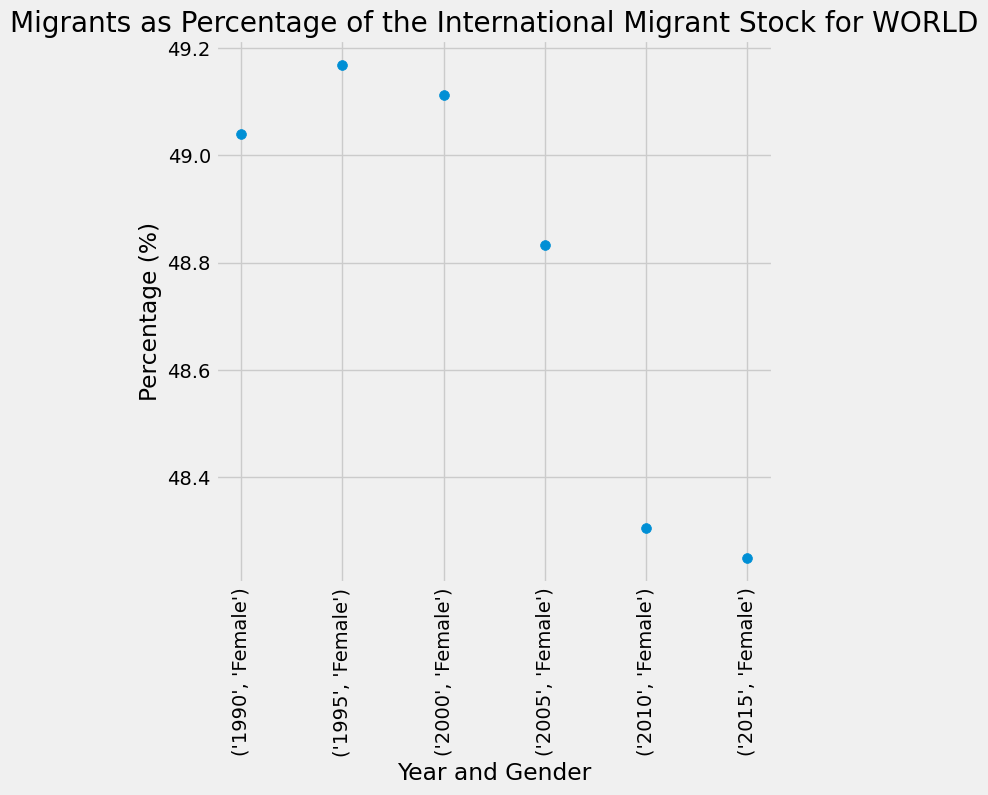

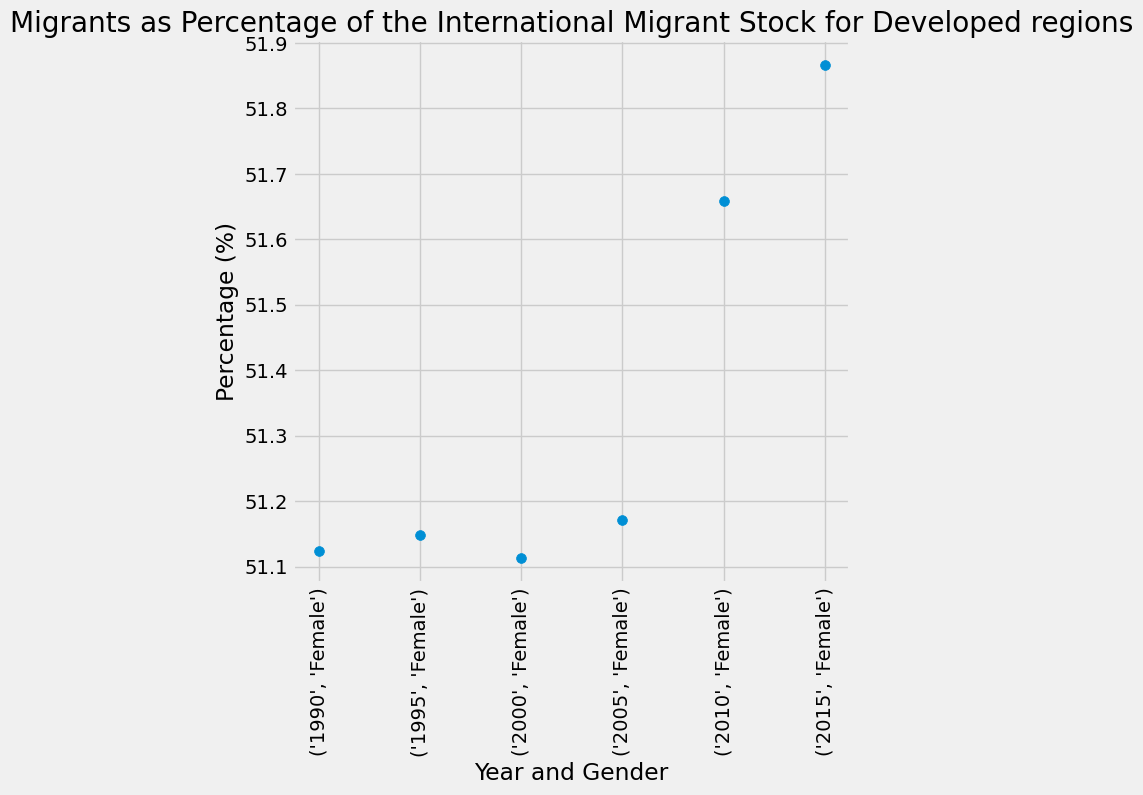

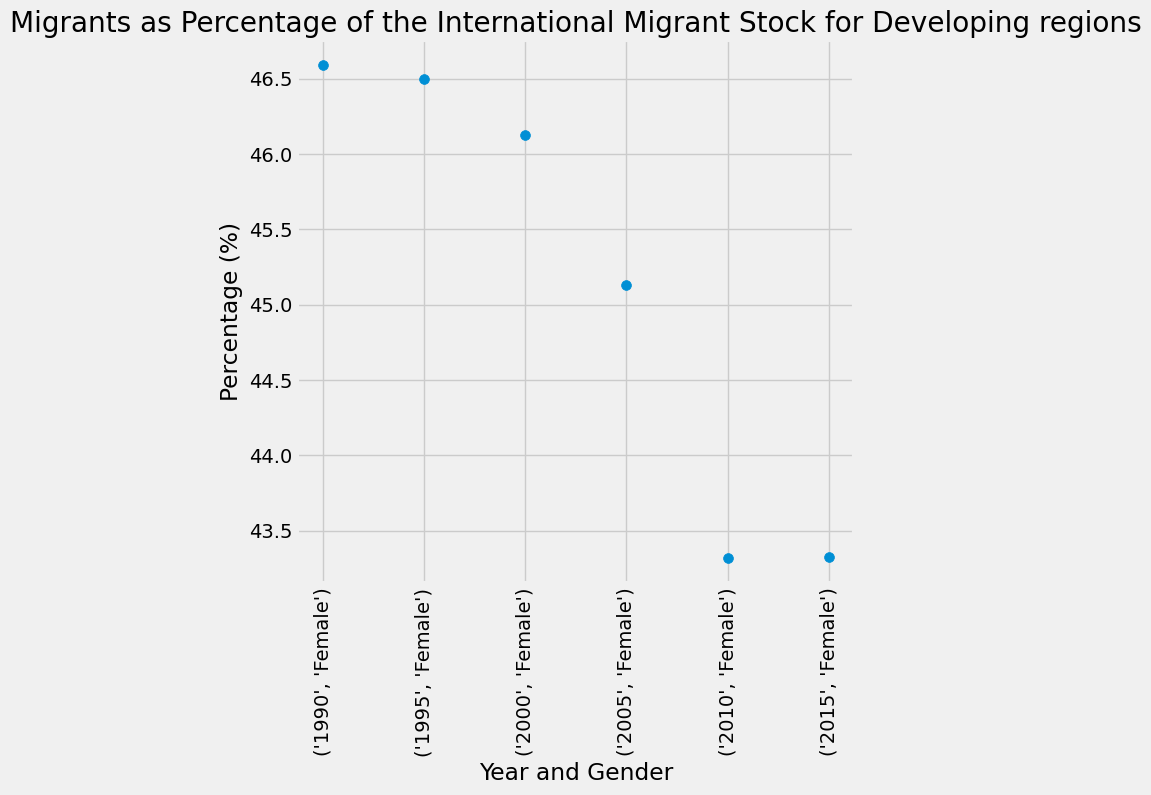

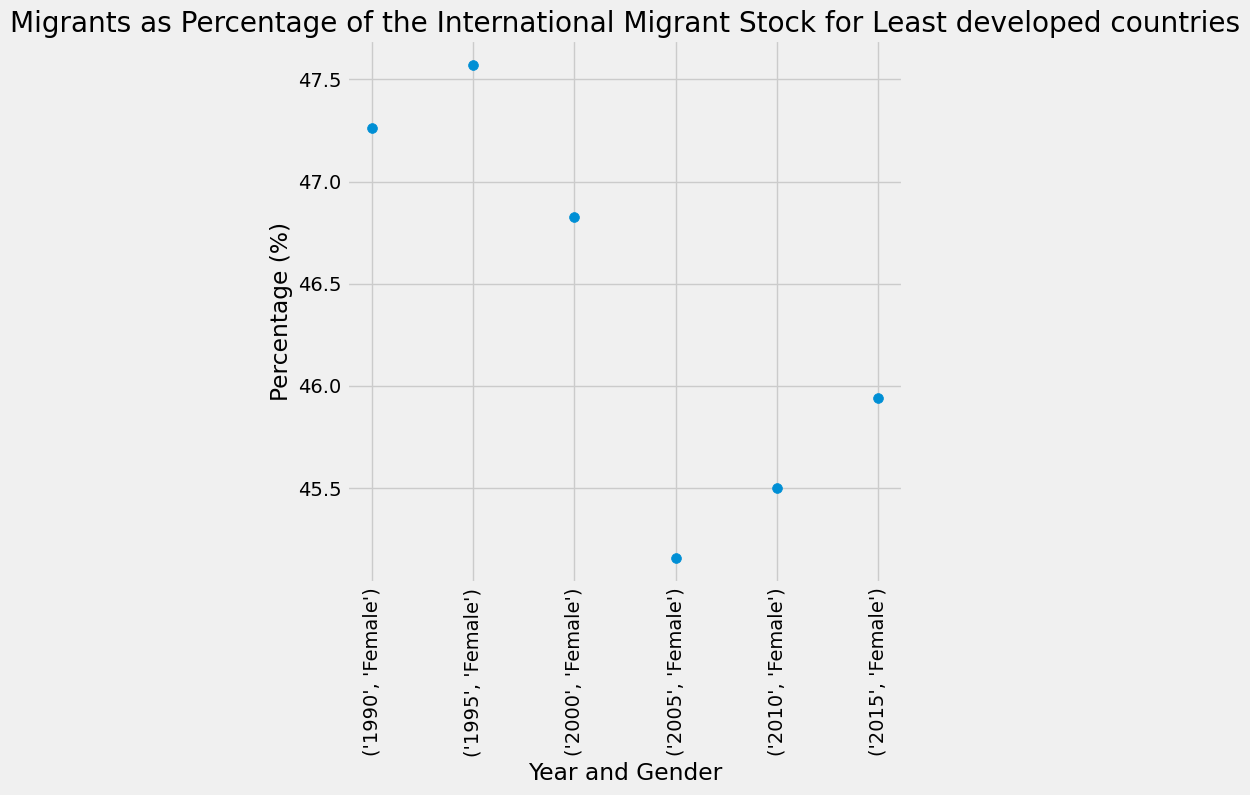

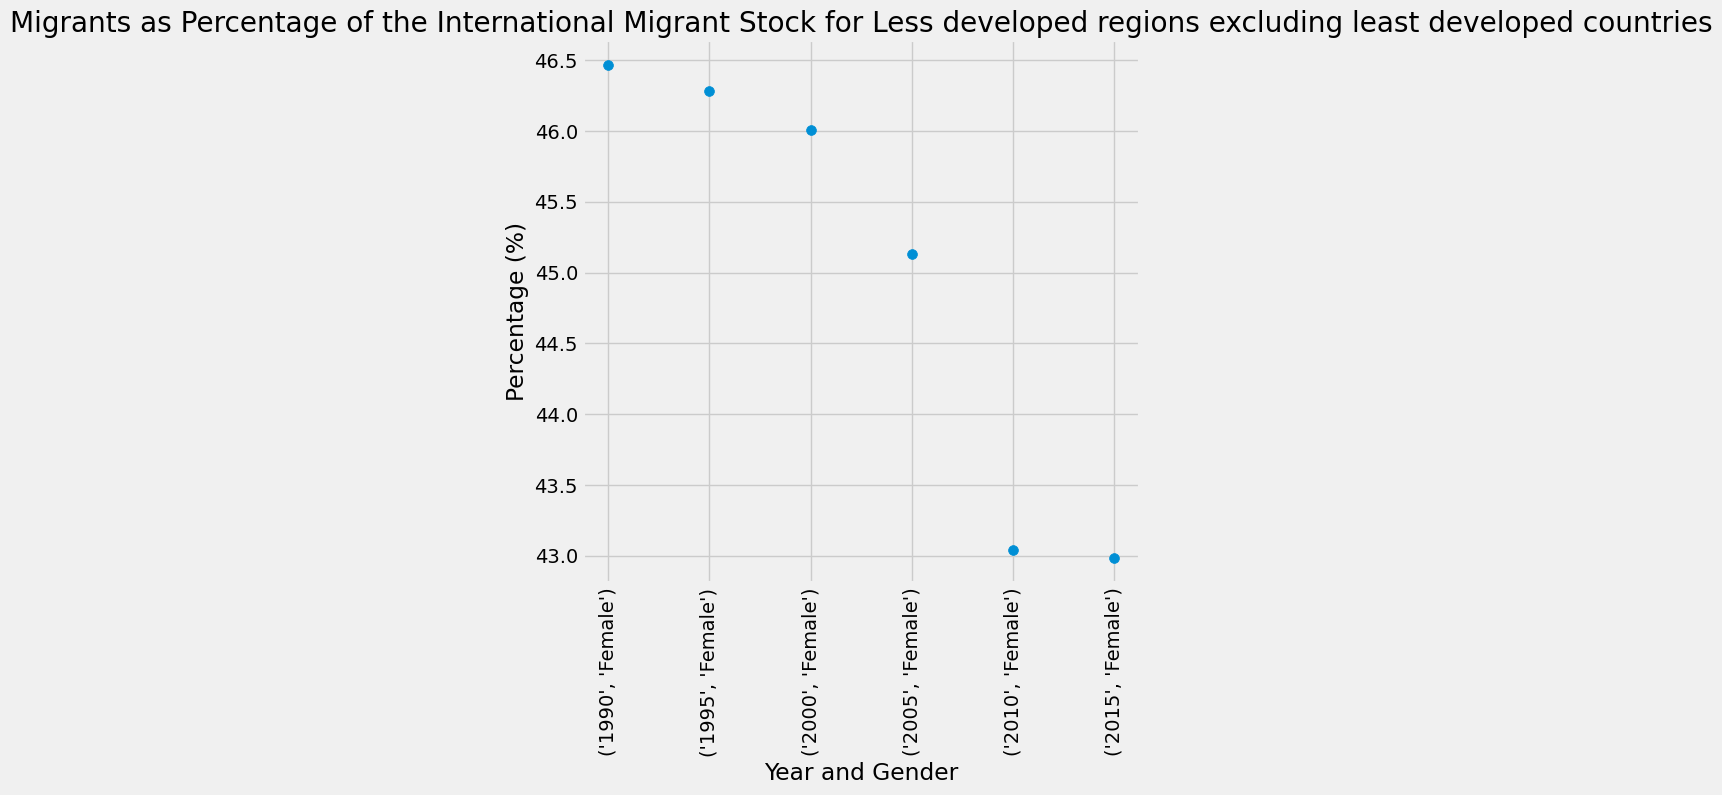

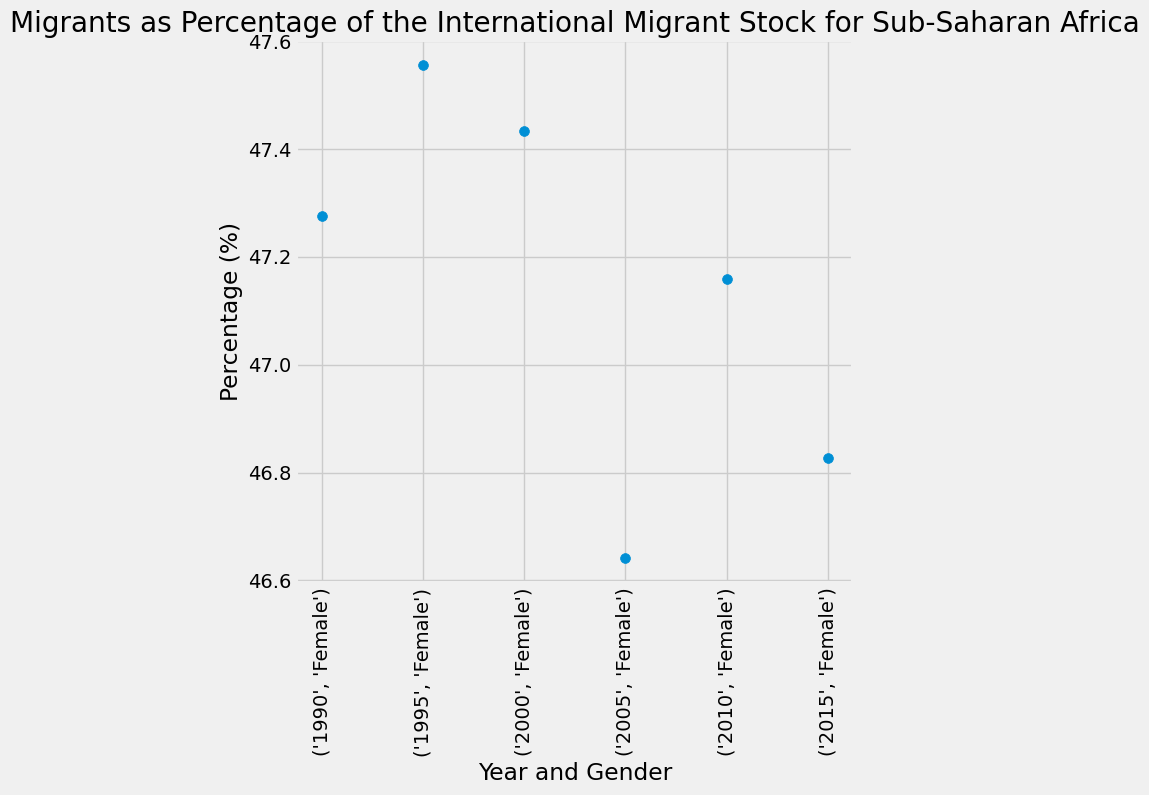

In [392]:
###Visualizing Table 4 Executive Summary using Scatterplot###

# List of locations to create scatter plots for
locations_t1ES = ['WORLD', 'Developed regions', 'Developing regions', 'Least developed countries', 'Less developed regions excluding least developed countries', 'Sub-Saharan Africa']

# Iterate over the locations
for location in locations_t1ES:
    # Filter the dataframe to only include the current location
    data_table4_ES = table4_ES[table4_ES['Location'] == location]

    # Group the data by year and gender
    data_table4_ES = data_table4_ES.groupby(['Year', 'Gender'])['Migrants as Percentage of the International Migrant Stock'].sum()

    # Convert the tuples in the index to strings
    data_table4_ES.index = map(str, data_table4_ES.index)

    # Create a scatter plot
    plt.scatter(data_table4_ES.index, data_table4_ES.values, s=50)

    # Set the labels for the x and y axes
    plt.xlabel('Year and Gender')
    plt.ylabel('Percentage (%)')

    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=1.2)

    # Add a title
    plt.title('Migrants as Percentage of the International Migrant Stock for ' + location)

    # Show the plot
    plt.show()


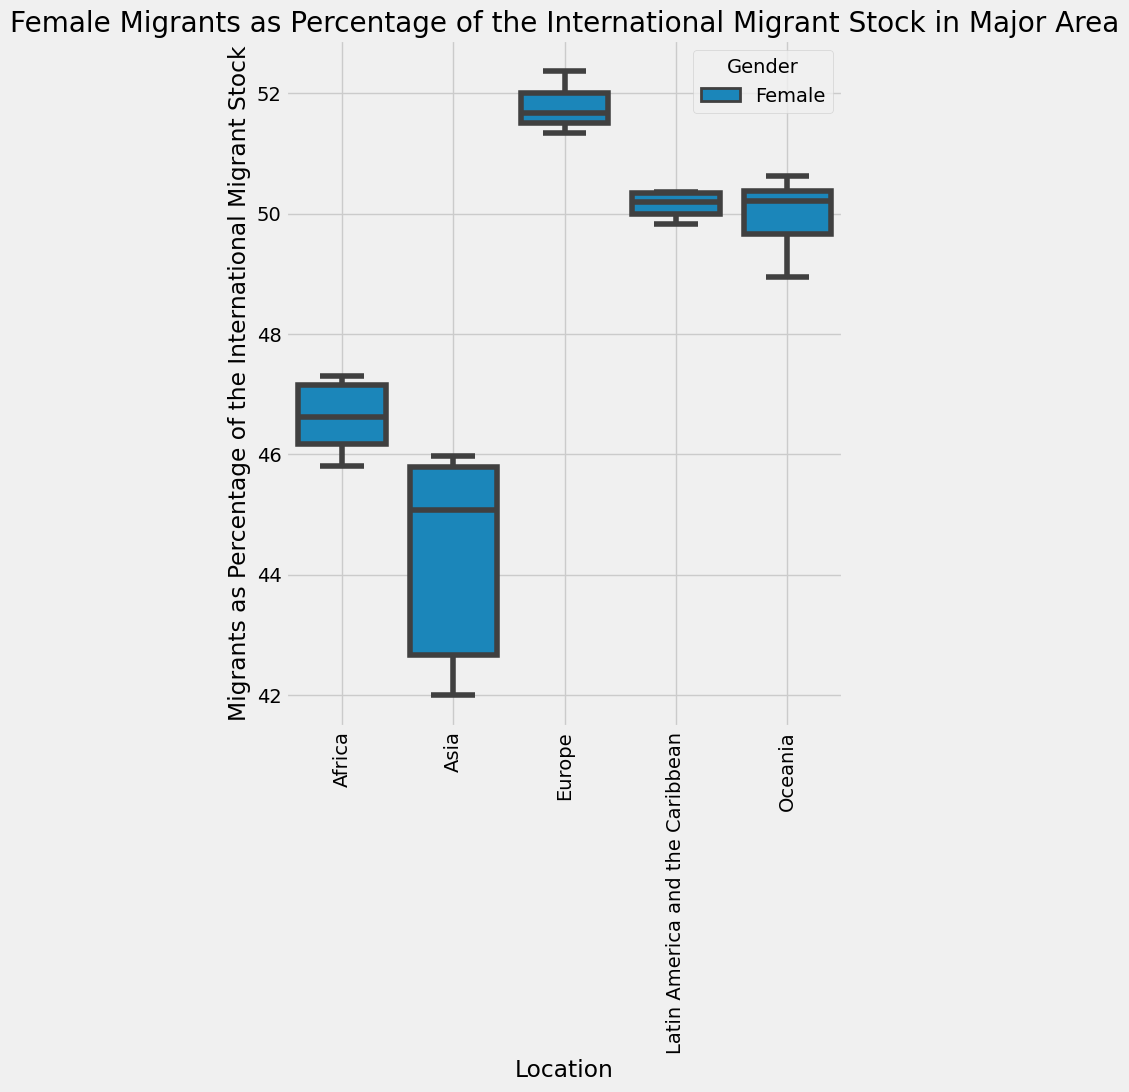

<Figure size 1000x1000 with 0 Axes>

In [403]:
###Visualizing Table 4 Major Area using Boxplot###

# Load the dataframe
df4 = new_table4

# Filter the dataframe to include only rows where the "Category" column is equal to "Major Area"
df4_region = df4[df4["Category"] == "Major Area"]

# Create the boxplot
ax_4 = sns.boxplot(data=df4_region, x="Location", y="Migrants as Percentage of the International Migrant Stock", hue="Gender")

# Set the y-axis scale to logarithmic
#ax_4.set_yscale('log')

# Add grid lines
ax_4.grid(True)

# Add a title to the plot
plt.title("Female Migrants as Percentage of the International Migrant Stock in Major Area")

# Rotate the x-axis labels for all subplots
plt.xticks(rotation=90)

# Add space between the title and the plot
plt.subplots_adjust(top=1.5)

#Re-size figure
plt.figure(figsize=(10,10))


# Show the plot
plt.show()



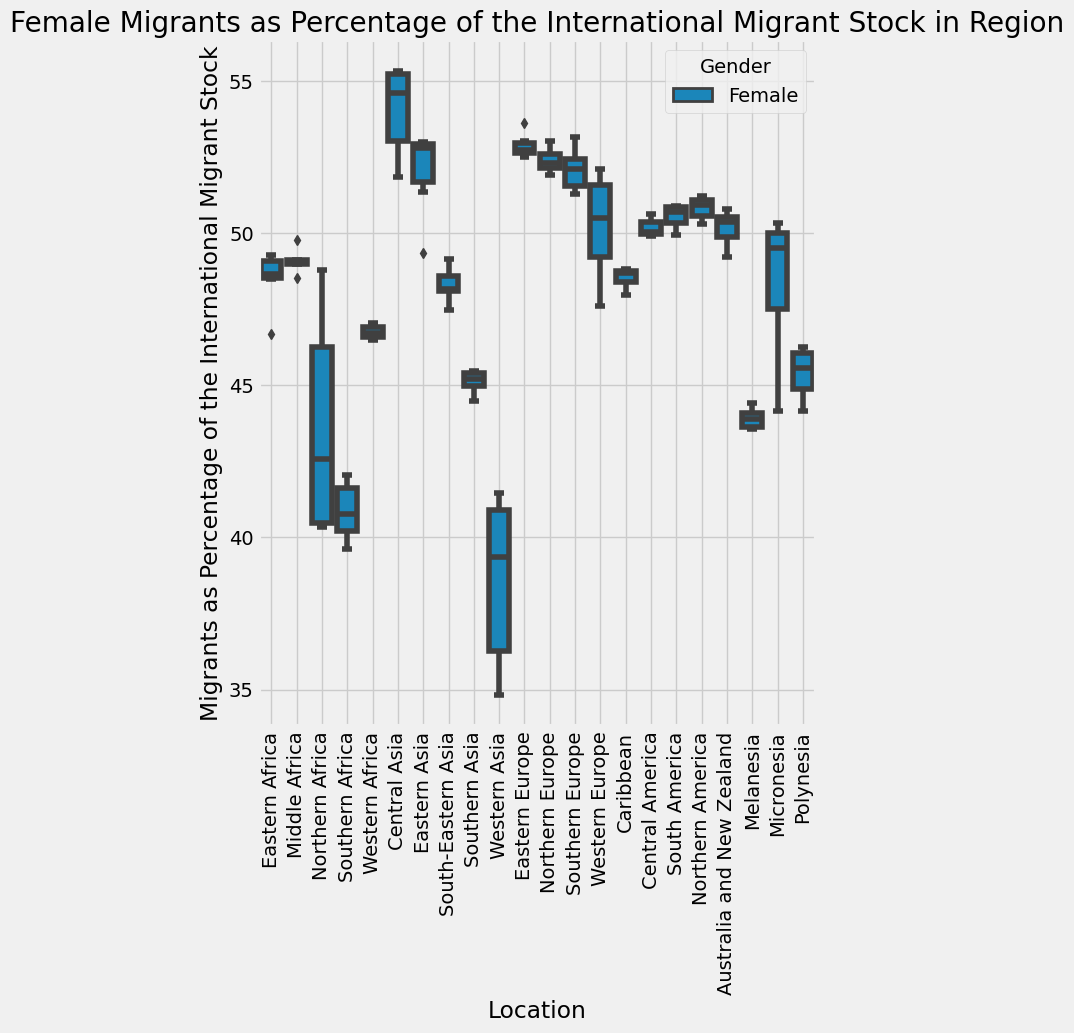

<Figure size 1000x1000 with 0 Axes>

In [408]:
###Visualizing Table 4 Region using Boxplot###

# Load the dataframe
df41 = new_table4

# Filter the dataframe to include only rows where the "Category" column is equal to "Region"
df41_region = df41[df41["Category"] == "Region"]

# Create the boxplot
ax_41 = sns.boxplot(data=df41_region, x="Location", y="Migrants as Percentage of the International Migrant Stock", hue="Gender")


# Add grid lines
ax_41.grid(True)

# Add a title to the plot
plt.title("Female Migrants as Percentage of the International Migrant Stock in Region")

# Rotate the x-axis labels for all subplots
plt.xticks(rotation=90)

# Add space between the title and the plot
plt.subplots_adjust(top=1.5)

#Re-size figure
plt.figure(figsize=(10,10))


# Show the plot
plt.show()

In [415]:
##Cleaning Table 5##

#Read Table 5 on Excel without the first 14 rows
data_table5 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', 'Table 5', skiprows=14)


##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values


# The years are in the first row. To fix that problem, we have to change it into columns with their corresponding values. 
data_table5.columns = data_table5.iloc[0]

# Manually re-write the column names and organize based off of desired names
data_table5.columns = ['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
'1990-1995MF', '1995-2000MF', '2000-2005MF', '2005-2010MF', '2010-2015MF', '1990-1995M', '1995-2000M', '2000-2005M', '2005-2010M', '2010-2015M','1990-1995F', '1995-2000F', '2000-2005F', '2005-2010F', '2010-2015F']

#Remove the first row                        
data_table5 = data_table5.iloc[1: , :]

## Problem: The column names are values (years) and not variable names 
#Tidy data principle 1: Column names need to be informative, variable names and not values
#Solution: Create a column name called demographic that has the year+gender values
data_table5 = data_table5.melt(id_vars=['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)'], var_name=["demographic"],value_name="Annual Rate of Change of the Migrant Stock") 

#Create a column name called demographic that has the year+gender values
data_table5=(data_table5.assign(Year = lambda x: x.demographic.str[0:9].astype(str), Gender = lambda x: x.demographic.str[9:].astype(str)).drop("demographic",axis=1))

#Styling the dataset: Changing MF to Both sexes, M to male, F to females. Change Sort Order column name 
data_table5 = (data_table5.replace(to_replace =["MF","M","F"],value =["Both Sexes","Male","Female"]))
data_table5 = data_table5.rename(columns={'Sort order': 'Sort Order'})        

#Drop the empty cells that contain value = .. 
data_table5['Annual Rate of Change of the Migrant Stock'].replace('..', np.nan, inplace = True)  
data_table5.dropna(subset=['Annual Rate of Change of the Migrant Stock'], inplace=True)

##Problem: The first 6 rows contain values whose country code does not exist in the annex. These rows also are sums of the other rows and do not belong under the same column. 
#Tidy data principle #4: each table column needs to have a singular data type 
#Solution: We created a seperate table that holds an executive summary of the Annual Rate of Change of the Migrant Stock

#Create a new dataframe containing desired columns
table5_executive_summary = data_table5[['Major area, region, country or area of destination', 'Notes', 'Annual Rate of Change of the Migrant Stock', 'Year', 'Gender']].copy()


# new_table5_ES has only the values "WORLD", "Developed regions", "Developing regions", etc
values=["WORLD","Developed regions", "Developing regions", "Least developed countries", "Less developed regions excluding least developed countries", "Sub-Saharan Africa"]
new_table5_ES = table5_executive_summary[table5_executive_summary["Major area, region, country or area of destination"].isin(values)] 

new_table5_ES = new_table5_ES.reset_index(drop=True)

#Rename 
new_table5_ES = new_table5_ES.rename({'Major area, region, country or area of destination': 'Location'}, axis=1) 


# fix table 5 and remove all values in the values list
new_table5 = data_table5[~data_table5["Major area, region, country or area of destination"].isin(values)] 
new_table5 = new_table5.reset_index(drop=True)

#Problem: Major area, region, country or area of destination has multiple variables in the column and different variables in the rows. 
#tidy data principle #3: variables need to be in cells, not rows and columns
#Solution: Add a new column called "Category" that seperates the major area, region, country/area of destination 

# function to assign values in the category values of the new column 
def category(df):
    if df['Sort Order'] in list_major_area_num:
        return 'Major Area'
    elif df['Sort Order'] in list_region_num:
        return 'Region'
    return 'Country/Area'

new_table5 = new_table5.rename(columns={'Major area, region, country or area of destination': 'Location', 'Country code': 'Country Code'})


# change the floats type into ints
new_table5['Country Code'] = new_table5['Country Code'].astype(int)
new_table5['Sort Order'] = new_table5['Sort Order'].astype(int)



#Add category column
new_table5['Category'] = new_table5.apply(category, axis = 1)


#reorder the columns so that it follows order: sort order, country code..
new_table5 = new_table5[['Sort Order', 'Location', 'Category','Country Code', 'Notes', 'Annual Rate of Change of the Migrant Stock', 'Year', 'Gender']]



#view
new_table5.head()




Sort Order        Location      Category  Country Code Notes  \
0           7          Africa    Major Area           903   NaN   
1           8  Eastern Africa        Region           910   NaN   
2           9         Burundi  Country/Area           108   NaN   
3          10         Comoros  Country/Area           174   NaN   
4          11        Djibouti  Country/Area           262   NaN   

   Annual Rate of Change of the Migrant Stock       Year      Gender  
0                                    0.826734  1990-1995  Both Sexes  
1                                   -3.435412  1990-1995  Both Sexes  
2                                   -5.355717  1990-1995  Both Sexes  
3                                   -0.199873  1990-1995  Both Sexes  
4                                   -4.058465  1990-1995  Both Sexes

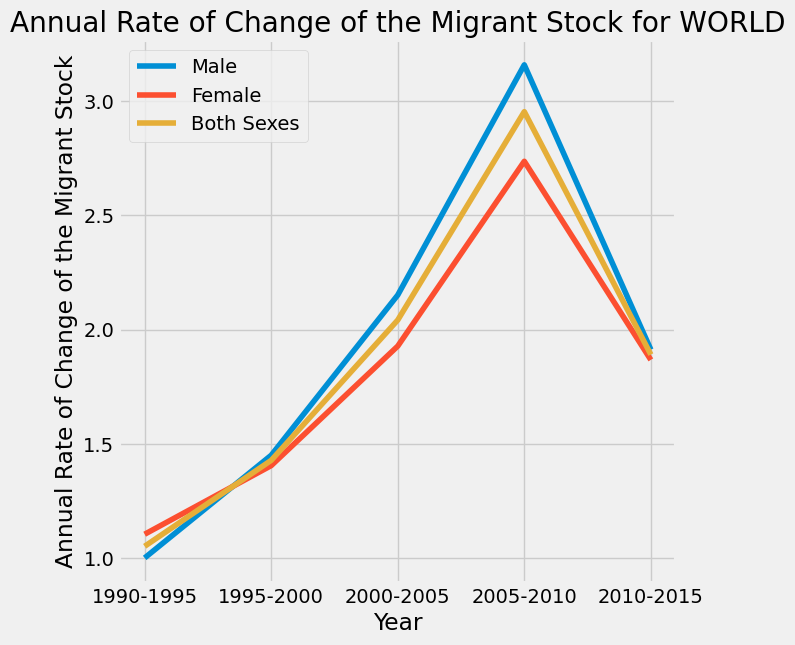

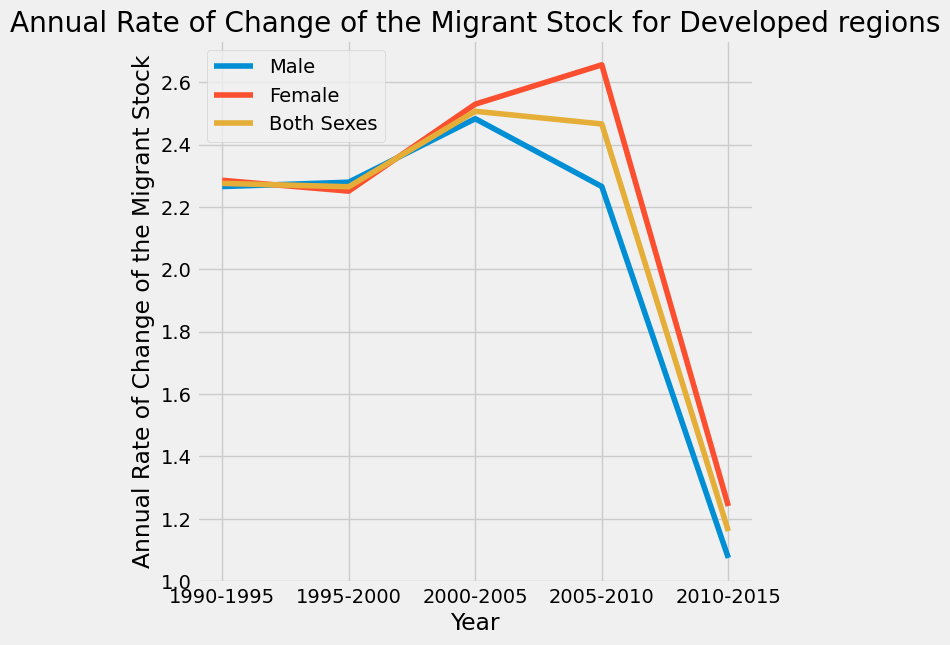

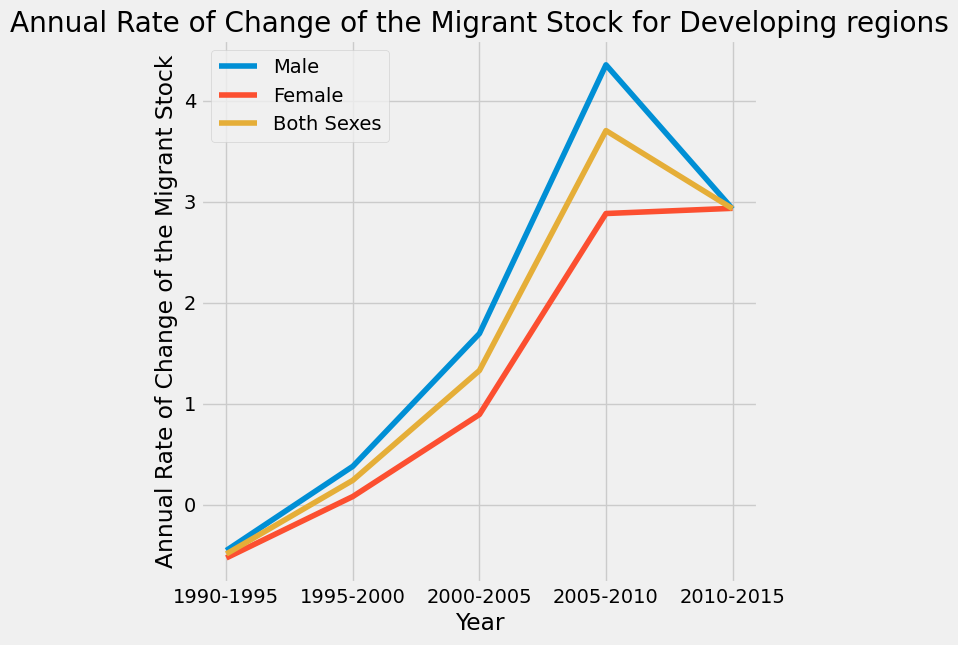

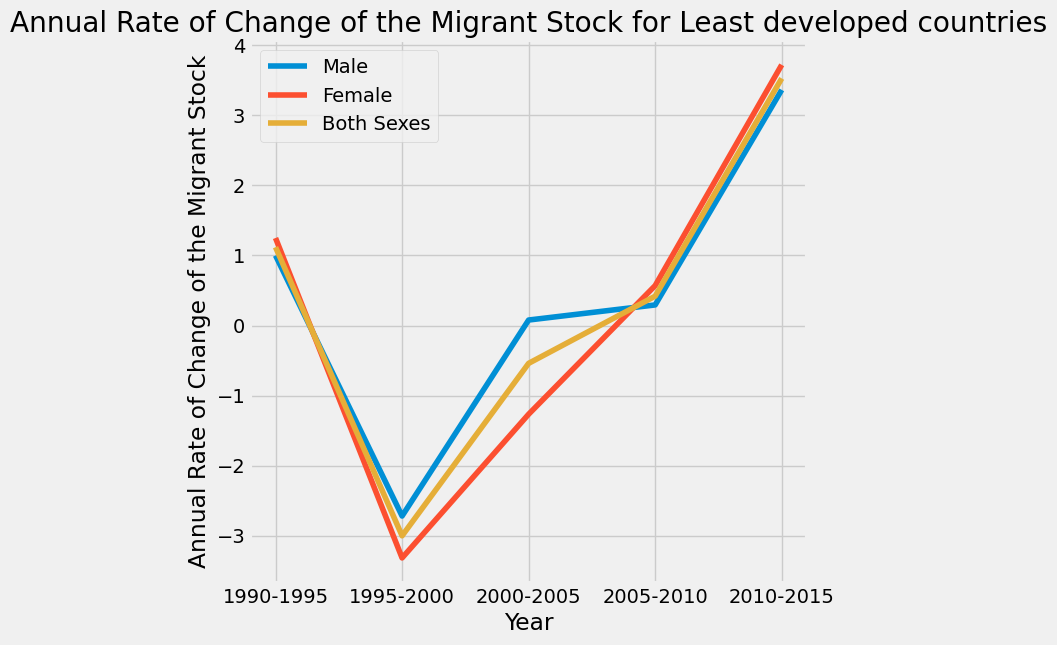

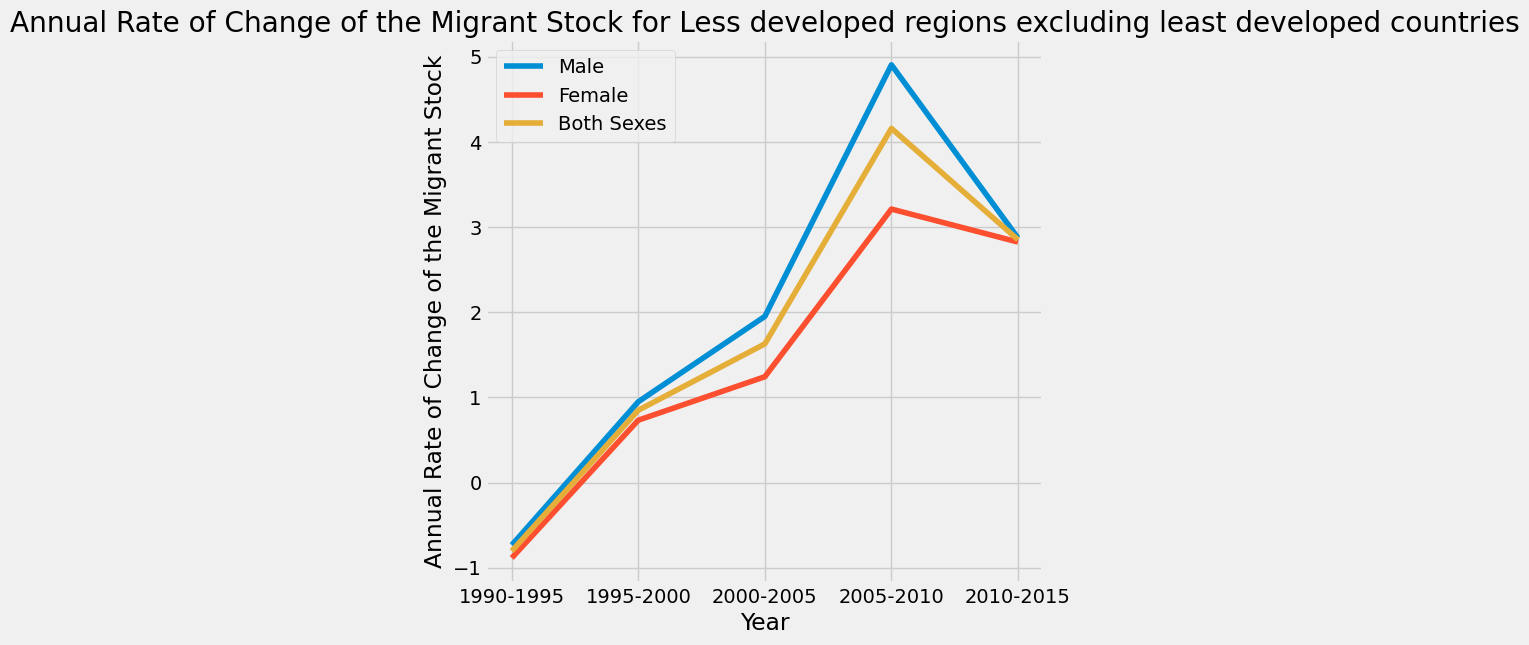

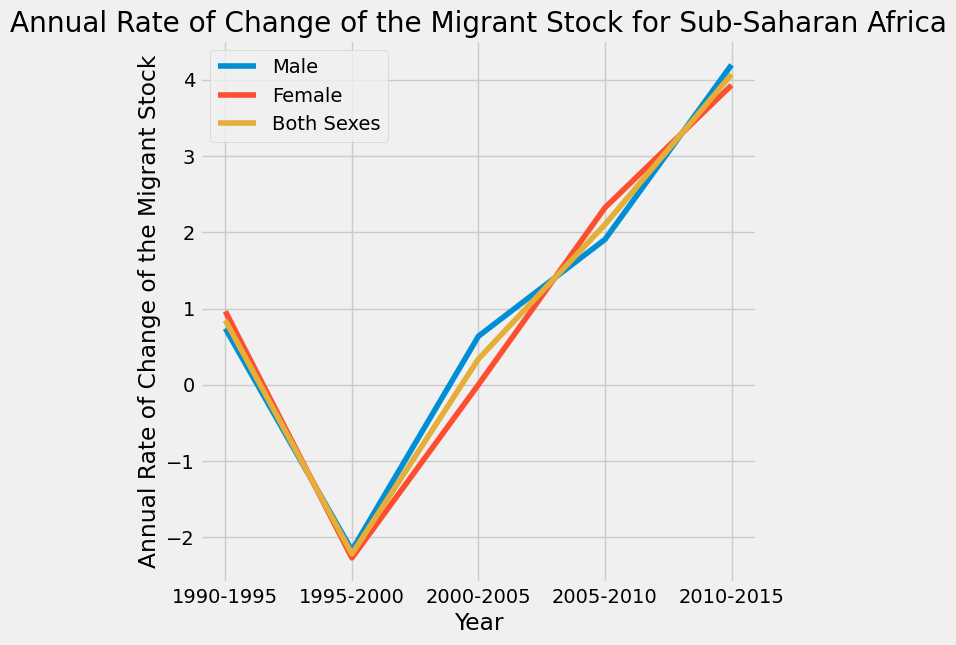

In [414]:
###Visualizing Table 5 Executive Summary using Line Plot###


# List of genders to create line plots for
genders = ['Male', 'Female', 'Both Sexes']

# Iterate over the locations
for location in locations_t1ES:
    # Iterate over the genders
    for gender in genders:
        # Filter the dataframe to only include the current location and gender
        data = new_table5_ES[(new_table5_ES['Location'] == location) & (new_table5_ES['Gender'] == gender)]

        # Group the data by year
        data = data.groupby('Year')['Annual Rate of Change of the Migrant Stock'].sum()

        # Create a line plot
        plt.plot(data.index, data.values, label=gender)

    # Set the labels for the x and y axes
    plt.xlabel('Year')
    plt.ylabel('Annual Rate of Change of the Migrant Stock')
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=1.2)

    # Add a title
    plt.title('Annual Rate of Change of the Migrant Stock for ' + location)

    # Show the legend
    plt.legend()

    # Show the plot
    plt.show()


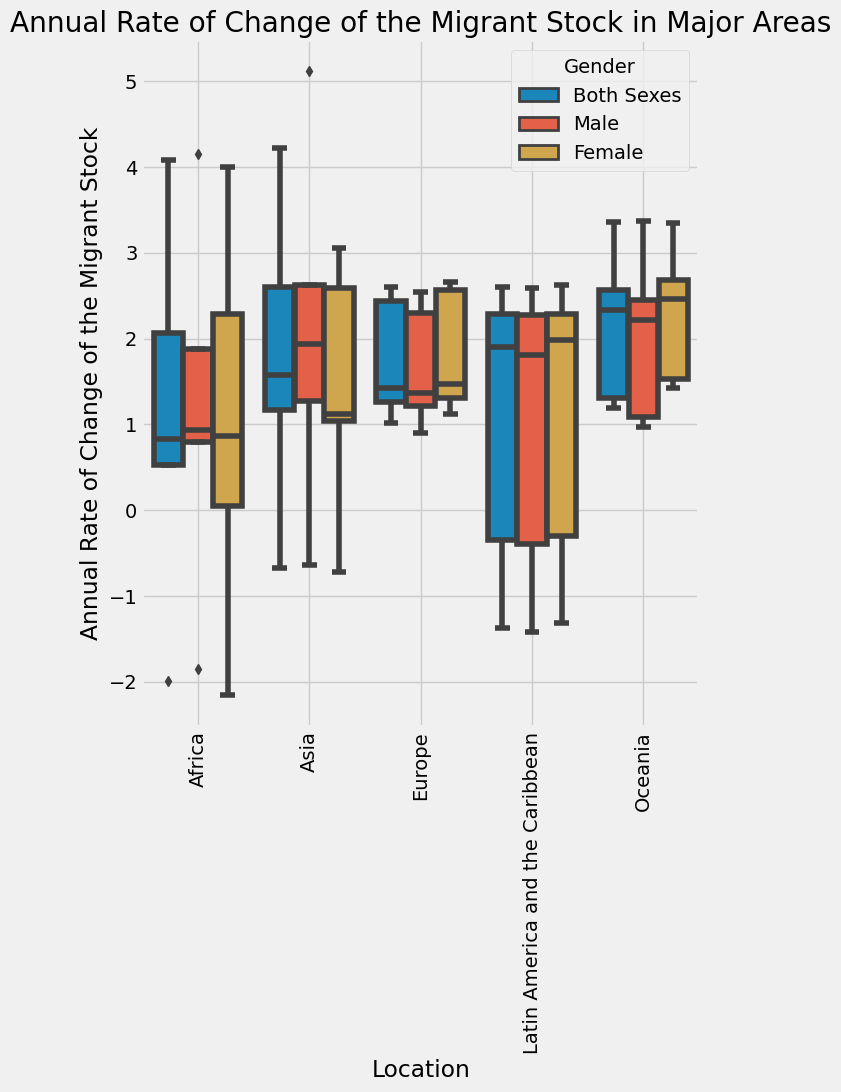

<Figure size 1000x1000 with 0 Axes>

In [418]:
###Visualizing Table 5 Major Area using Boxplot###

# Load the dataframe
df5 = new_table5

# Filter the dataframe to include only rows where the "Category" column is equal to "Major Area"
df5_region = df5[df5["Category"] == "Major Area"]

# Create the boxplot
ax_5 = sns.boxplot(data=df5_region, x="Location", y="Annual Rate of Change of the Migrant Stock", hue="Gender")

# Set the y-axis scale to logarithmic
#ax_4.set_yscale('log')

# Add grid lines
ax_5.grid(True)

# Add a title to the plot
plt.title("Annual Rate of Change of the Migrant Stock in Major Areas")

# Rotate the x-axis labels for all subplots
plt.xticks(rotation=90)

# Add space between the title and the plot
plt.subplots_adjust(top=1.5)

#Re-size figure
plt.figure(figsize=(10,10))


# Show the plot
plt.show()


In [437]:
##Cleaning Table 6##

#Read Table 6 on Excel without the first 14 rows

data_table6 = pd.read_excel('UN_MigrantStockTotal_2015.xlsx', 'Table 6', skiprows=14)

##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values

# The years are in the first row. To fix that problem, we have to change it into columns with their corresponding values. 
data_table6.columns = data_table6.iloc[0]

#Manually re-write the column names and organize based off of desired column names 

data_table6.columns = ['Sort order', 'Major area, region, country or area of destination', 'Notes', 'Country code', 'Type of data (a)',
'1990MF', '1995MF', '2000MF', '2005MF', '2010MF', '2015MF', '1990', '1995', '2000', '2005', '2010', '2015', '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015']

#Remove first row 

data_table6 = data_table6.iloc[1: , :]

#Styling the dataset: Changing MF to Both sexes, M to male, F to females. Change Sort\norder column name to Sort Order
data_table6 = data_table6.rename(columns={'Sort order': 'Sort Order'})    


#Problem: Major area, region, country or area of destination has multiple variables in the column and different variables in the rows. 
#tidy data principle #3: variables need to be in cells, not rows and columns
#Solution: Add a new column called "Category" that seperates the major area, region, country/area of destination 

#Create list
list_major_area_num = [7, 71, 127, 180, 238]
list_region_num = [8, 29, 39, 47, 53, 72, 78, 86, 98, 108, 128, 139, 153, 170, 181, 208, 217, 232, 239, 242, 248, 256]

# function to assign values in the category values of the new column 
def category(df):
    if df['Sort Order'] in list_major_area_num:
        return 'Major Area'
    elif df['Sort Order'] in list_region_num:
        return 'Region'
    return 'Country/Area'

new_table6 = data_table6.rename(columns={'Major area, region, country or area of destination': 'Location', 'Country code': 'Country Code'})

#change the float types into ints
new_table6['Sort Order'] = new_table6['Sort Order'].astype(int)
new_table6['Country Code'] = new_table6['Country Code'].astype(int)

#Add category column
new_table6['Category'] = new_table6.apply(category, axis = 1)

#reorder the columns so that it follows order: sort order, country code..
new_table6 = new_table6[['Sort Order', 'Location', 'Category','Country Code', 'Notes', 'Type of data (a)', '1990MF', '1995MF', '2000MF', '2005MF', '2010MF', '2015MF', '1990', '1995', '2000', '2005', '2010', '2015', '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015']]



#Problem: There are multiple types of of data stored in 1 table
#tidy data principle #4: each table column needs to have a singular data type 
#Solution: Create three seperate tables - One for estimated refugee stock, one for refugees as percentage of migrant stock, and one for annual rate of change of the refugee stock


##Create a dataframe for Estimated Refugee stock at mid-year 
ERS_midyear_table = new_table6[['Sort Order', 'Location', 'Category', 'Country Code', 'Notes', 'Type of data (a)', '1990MF', '1995MF','2000MF', '2005MF', '2010MF', '2015MF']].copy()


##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values

#Create a column name called demographic that has the year+gender values

ERS_midyear_table = ERS_midyear_table.melt(id_vars=['Sort Order', 'Location', 'Category', 'Country Code', 'Notes', 'Type of data (a)'], var_name=["demographic"],value_name="Estimated Refugee Stock at Mid-Year") 

##Problem: There are multiple variables (gender and year) stored in one column (demographic) 
#Tidy data principle 2: Each column needs to consist of one and only one variable
#Solution: Split the demographic column into gender and years 

ERS_midyear_table = (ERS_midyear_table.assign(Year = lambda x: x.demographic.str[0:4].astype(str), Gender = lambda x: x.demographic.str[4:].astype(str)).drop("demographic",axis=1))

#Styling the dataset: Changing MF to Both sexes

ERS_midyear_table = (ERS_midyear_table.replace(to_replace =["MF"],value =["Both Sexes"]))

#Drop the empty cells that contain value = .. 

ERS_midyear_table['Estimated Refugee Stock at Mid-Year'].replace('..', np.nan, inplace = True)  
ERS_midyear_table.dropna(subset=['Estimated Refugee Stock at Mid-Year'], inplace=True)

##Problem: The first 6 rows contain values whose country code does not exist in the annex. These rows also are sums of the other rows and do not belong under the same column. 
#Tidy data principle #4: each table column needs to have a singular data type 
#Solution: We created a seperate table that holds an executive summary of the International Migrant Stock at Mid-Year

#Create a new dataframe containing desired columns

ERS_midyear_executive_summary = ERS_midyear_table[['Sort Order', 'Location', 'Notes', 'Type of data (a)','Estimated Refugee Stock at Mid-Year', 'Year', 'Gender']].copy()

#ERS_midyear_ES has only the values "WORLD", "Developed regions", "Developing regions", "Least developed countries", "Least developed regions", and "Sub-Saharan Africa"

values=["WORLD","Developed regions", "Developing regions", "Least developed countries", "Less developed regions excluding least developed countries", "Sub-Saharan Africa"]
ERS_midyear_ES = ERS_midyear_executive_summary[ERS_midyear_executive_summary["Location"].isin(values)] 

ERS_midyear_ES = ERS_midyear_ES.reset_index(drop=True)


#Fix ERS_midyear_table and remove all values in the values list
new_ERS_midyear_table = ERS_midyear_table[~ERS_midyear_table["Location"].isin(values)] 
new_ERS_midyear_table = new_ERS_midyear_table.reset_index(drop=True)


##Create a dataframe for Refugees as a percentage of the international migrant stock

RP_IMS_table = new_table6[['Sort Order', 'Location', 'Category', 'Country Code', 'Notes', 'Type of data (a)',  '1990', '1995', '2000', '2005', '2010', '2015']].copy()


##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values

#Create a column name called demographic that has the year+gender values

RP_IMS_table = RP_IMS_table.melt(id_vars=['Sort Order', 'Location', 'Category', 'Country Code', 'Notes', 'Type of data (a)'], var_name=["Year"],value_name="Refugees as a Percentage of the International Migrant Stock") 

#Drop the empty cells that contain value = .. 

RP_IMS_table['Refugees as a Percentage of the International Migrant Stock'].replace('..', np.nan, inplace = True)  
RP_IMS_table.dropna(subset=['Refugees as a Percentage of the International Migrant Stock'], inplace=True)


##Problem: The first 6 rows contain values whose country code does not exist in the annex. These rows also are sums of the other rows and do not belong under the same column. 
#Tidy data principle #4: each table column needs to have a singular data type 
#Solution: We created a seperate table that holds an executive summary of the International Migrant Stock at Mid-Year

#Create a new dataframe containing desired columns

RP_IMS_executive_summary = RP_IMS_table[['Sort Order', 'Location', 'Notes', 'Type of data (a)','Refugees as a Percentage of the International Migrant Stock']].copy()

#ERS_midyear_ES has only the values "WORLD", "Developed regions", "Developing regions", "Least developed countries", "Least developed regions", and "Sub-Saharan Africa"

values=["WORLD","Developed regions", "Developing regions", "Least developed countries", "Less developed regions excluding least developed countries", "Sub-Saharan Africa"]
RP_IMS_ES = RP_IMS_executive_summary[RP_IMS_executive_summary["Location"].isin(values)] 

RP_IMS_ES = RP_IMS_ES.reset_index(drop=True)



#Fix ERS_midyear_table and remove all values in the values list
new_RP_IMS_ES_table = RP_IMS_table[~RP_IMS_table["Location"].isin(values)] 
new_RP_IMS_ES_table = new_RP_IMS_ES_table.reset_index(drop=True)

                                  
##Create a dataframe for Annual Rate of Change of the Refugee Stock 
ARC_RS_table = new_table6[['Sort Order', 'Location', 'Category', 'Country Code', 'Notes', 'Type of data (a)', '1990-1995', '1995-2000', '2000-2005', '2005-2010', '2010-2015']].copy()


##Problem: The column names are values (years) and not variable names 
#tidy data principle #1: Column names need to be informative, variable names and not values

#Create a column name called demographic that has the year+gender values

ARC_RS_table = ARC_RS_table.melt(id_vars=['Sort Order', 'Location', 'Category', 'Country Code', 'Notes', 'Type of data (a)'], var_name=["Year"],value_name="Annual Rate of Change of the Refugee Stock") 

#Drop the empty cells that contain value = .. 

ARC_RS_table['Annual Rate of Change of the Refugee Stock'].replace('..', np.nan, inplace = True)  
ARC_RS_table.dropna(subset=['Annual Rate of Change of the Refugee Stock'], inplace=True)


##Problem: The first 6 rows contain values whose country code does not exist in the annex. These rows also are sums of the other rows and do not belong under the same column. 
#Tidy data principle #4: each table column needs to have a singular data type 
#Solution: We created a seperate table that holds an executive summary of the Annual Rate of Change of the Refugee Stock

#Create a new dataframe containing desired columns

ARC_RS_executive_summary = ARC_RS_table[['Sort Order', 'Location', 'Notes', 'Type of data (a)','Annual Rate of Change of the Refugee Stock']].copy()

#ERS_midyear_ES has only the values "WORLD", "Developed regions", "Developing regions", "Least developed countries", "Least developed regions", and "Sub-Saharan Africa"

values=["WORLD","Developed regions", "Developing regions", "Least developed countries", "Less developed regions excluding least developed countries", "Sub-Saharan Africa"]
ARC_RS_ES = ARC_RS_executive_summary[ARC_RS_executive_summary["Location"].isin(values)] 

ARC_RS_ES = ARC_RS_ES.reset_index(drop=True)
                                                                  

#Fix ERS_midyear_table and remove all values in the values list
new_ARC_RS_table = ARC_RS_table[~ARC_RS_table["Location"].isin(values)] 
new_ARC_RS_table = new_ARC_RS_table.reset_index(drop=True)


#view
new_ERS_midyear_table.head()

Sort Order        Location      Category  Country Code Notes  \
0           7          Africa    Major Area           903   NaN   
1           8  Eastern Africa        Region           910   NaN   
2           9         Burundi  Country/Area           108   NaN   
3          10         Comoros  Country/Area           174   NaN   
4          11        Djibouti  Country/Area           262   NaN   

  Type of data (a)  Estimated Refugee Stock at Mid-Year  Year      Gender  
0              NaN                            5687352.0  1990  Both Sexes  
1              NaN                            3168001.0  1990  Both Sexes  
2              B R                             267929.0  1990  Both Sexes  
3                B                                  0.0  1990  Both Sexes  
4              B R                              54508.0  1990  Both Sexes

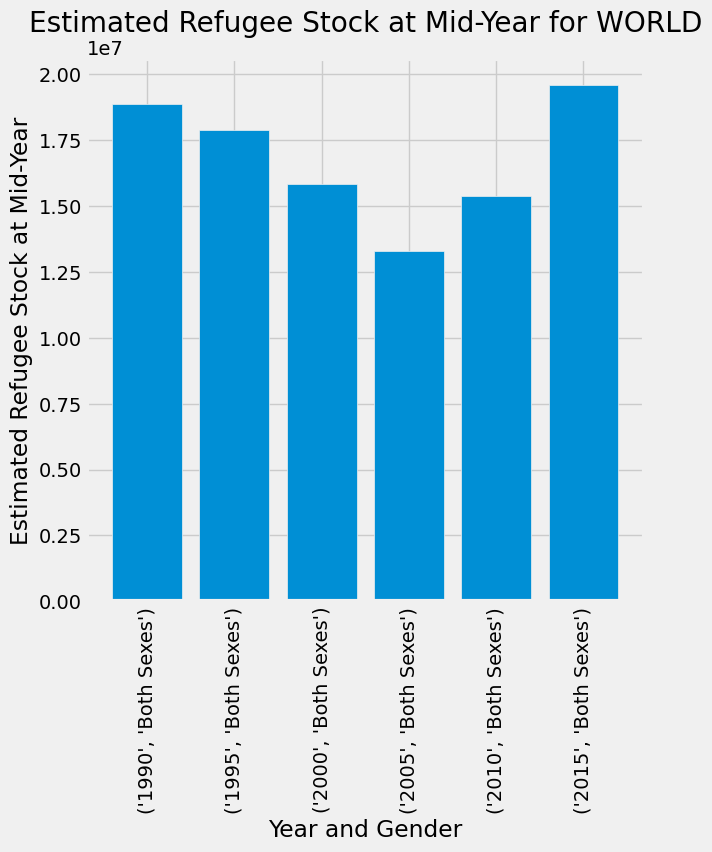

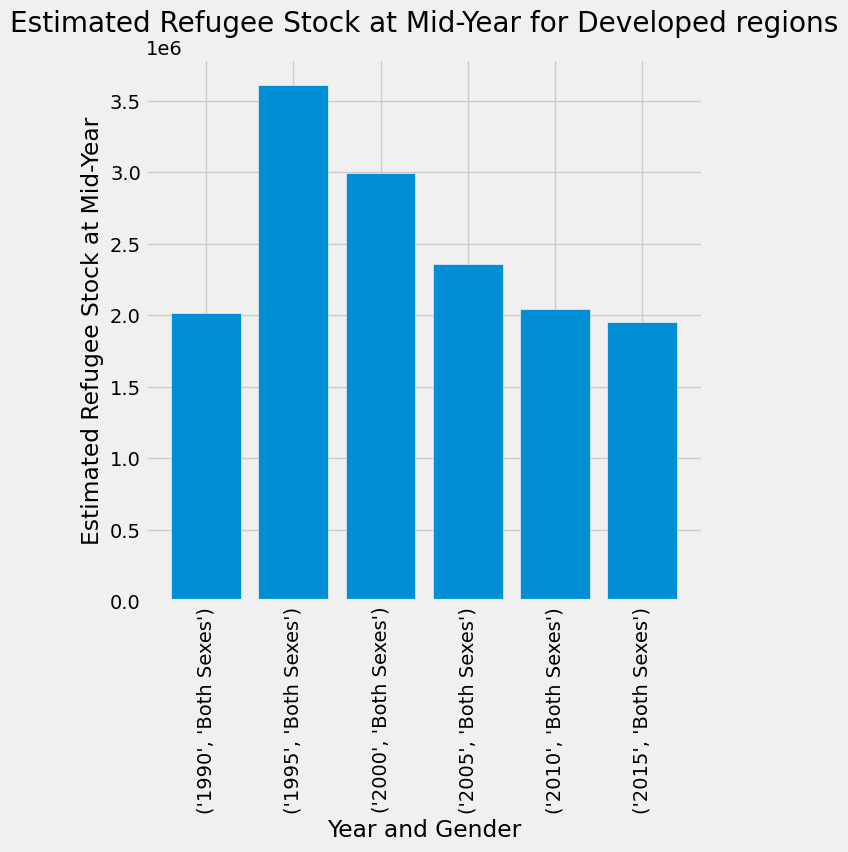

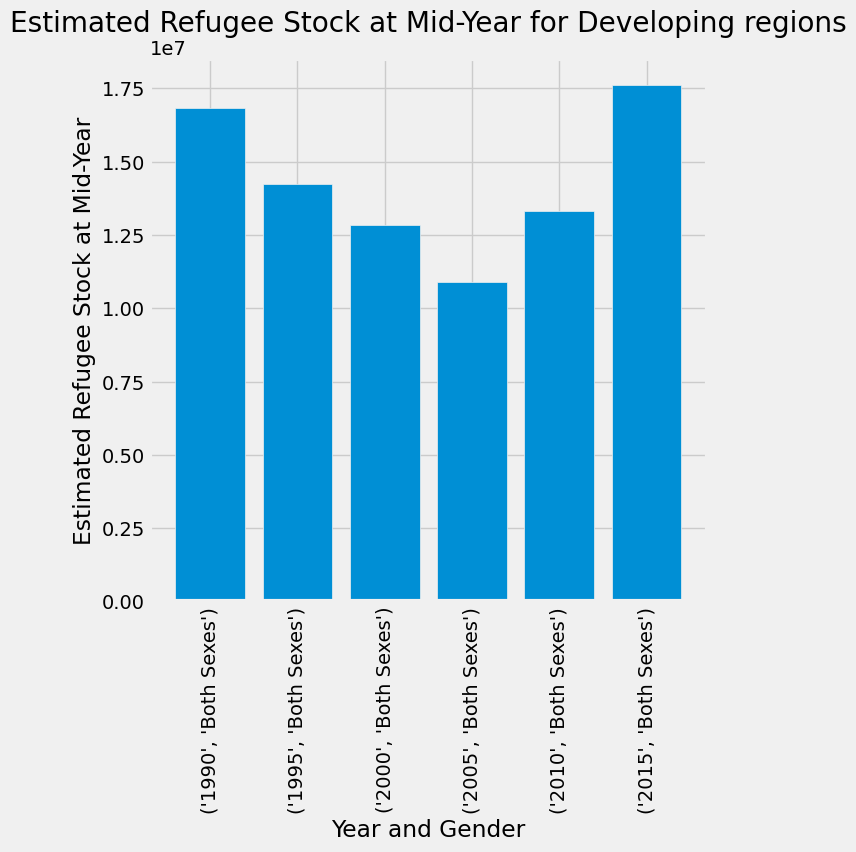

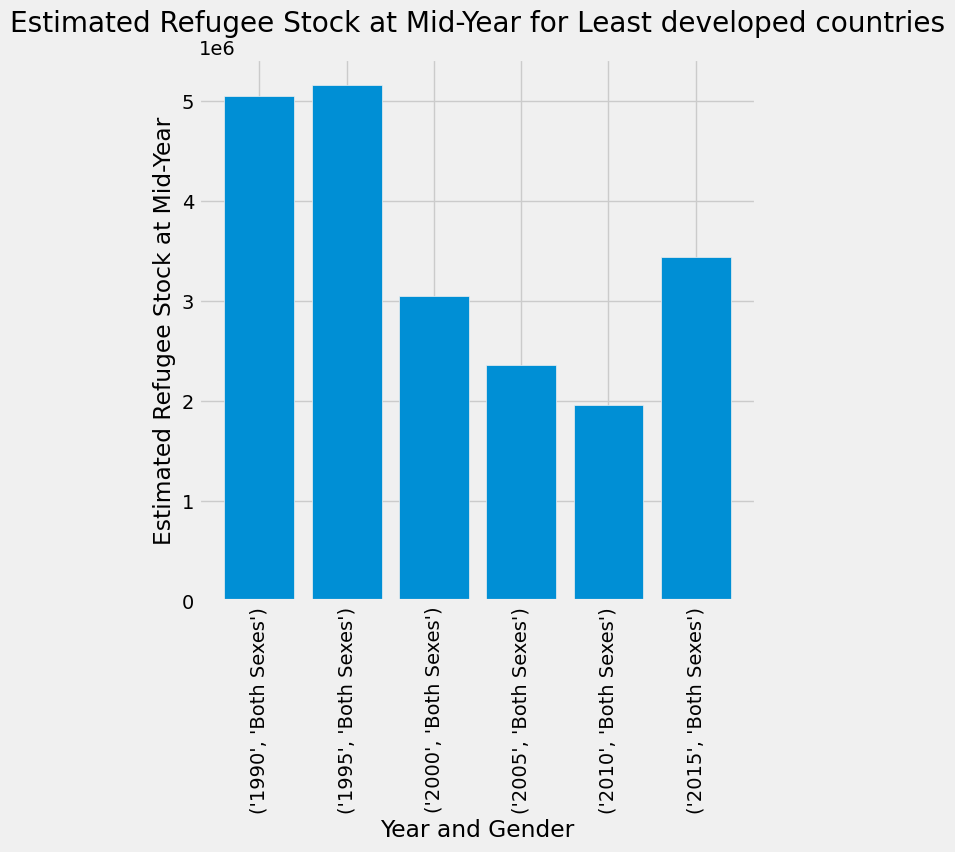

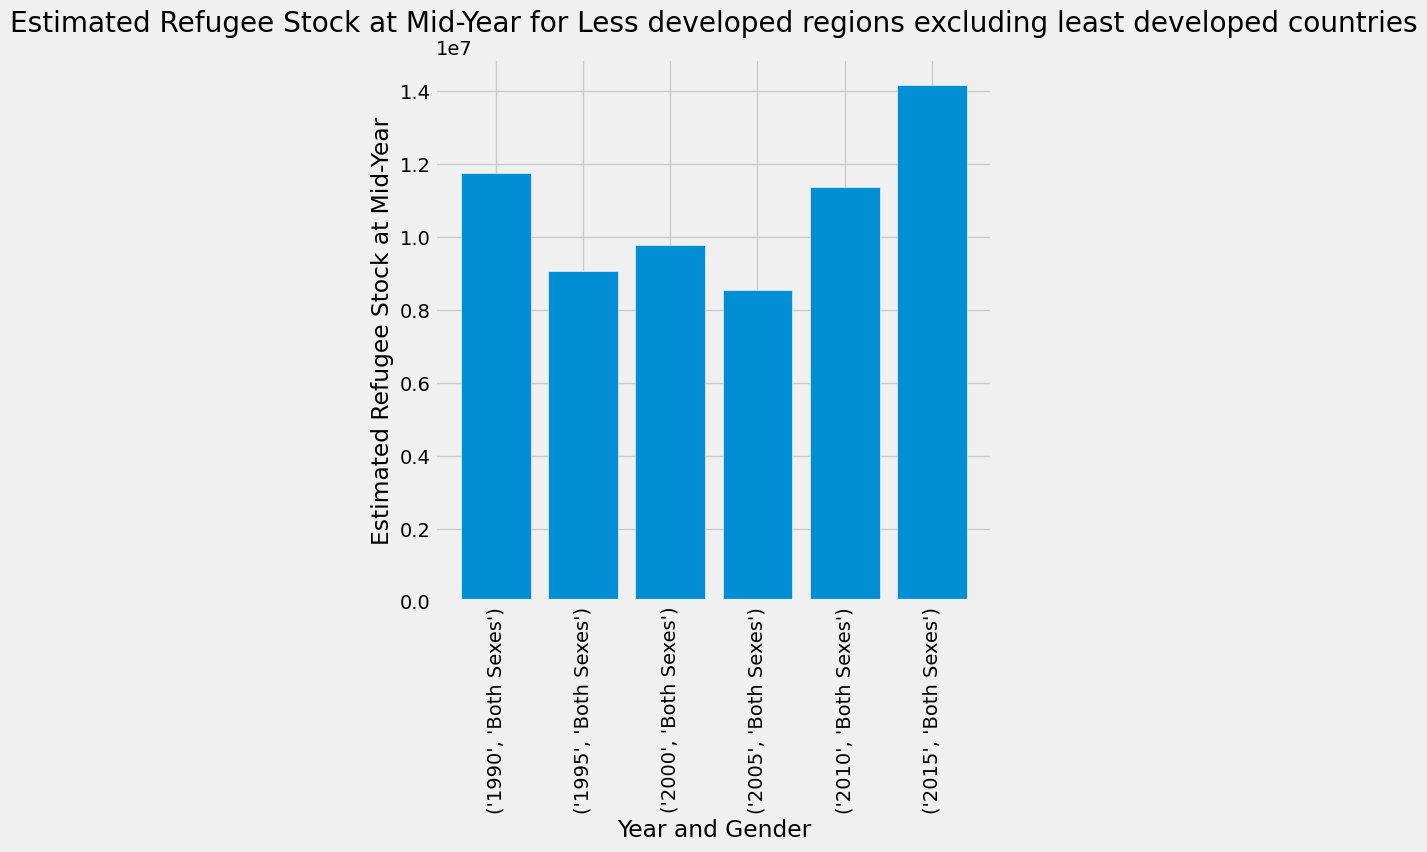

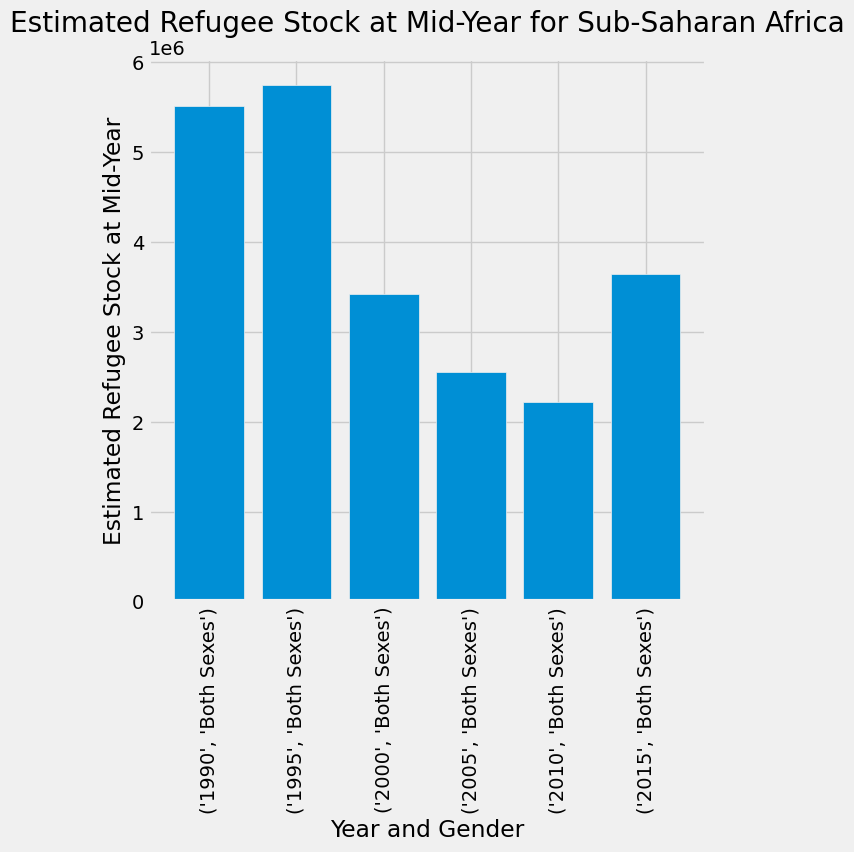

In [422]:
###Visualizing Table 6 Estimated Refugee Stock Executive Summary using Bar Chart###

# List of locations to create bar graphs for
locations_t1ES = ['WORLD', 'Developed regions', 'Developing regions', 'Least developed countries', 'Less developed regions excluding least developed countries', 'Sub-Saharan Africa']

# Iterate over the locations
for location in locations_t1ES:
    # Filter the dataframe to only include the current location
    data_table6_ERS_ES = ERS_midyear_ES[ERS_midyear_ES['Location'] == location]

    # Group the data by year and gender
    data_table6_ERS_ES = data_table6_ERS_ES.groupby(['Year', 'Gender'])['Estimated Refugee Stock at Mid-Year'].sum()

    # Convert the tuples in the index to strings
    data_table6_ERS_ES.index = map(str, data_table6_ERS_ES.index)

    # Create a bar graph
    plt.bar(data_table6_ERS_ES.index, data_table6_ERS_ES.values)

    # Set the labels for the x and y axes
    plt.xlabel('Year and Gender')
    plt.ylabel('Estimated Refugee Stock at Mid-Year')

    # Rotate the x-axis labels
    plt.xticks(rotation=90)
    
    # Add space between the title and the plot
    plt.subplots_adjust(top=1.2)

    # Add a title
    plt.title('Estimated Refugee Stock at Mid-Year for ' + location)

    # Show the plot
    plt.show()



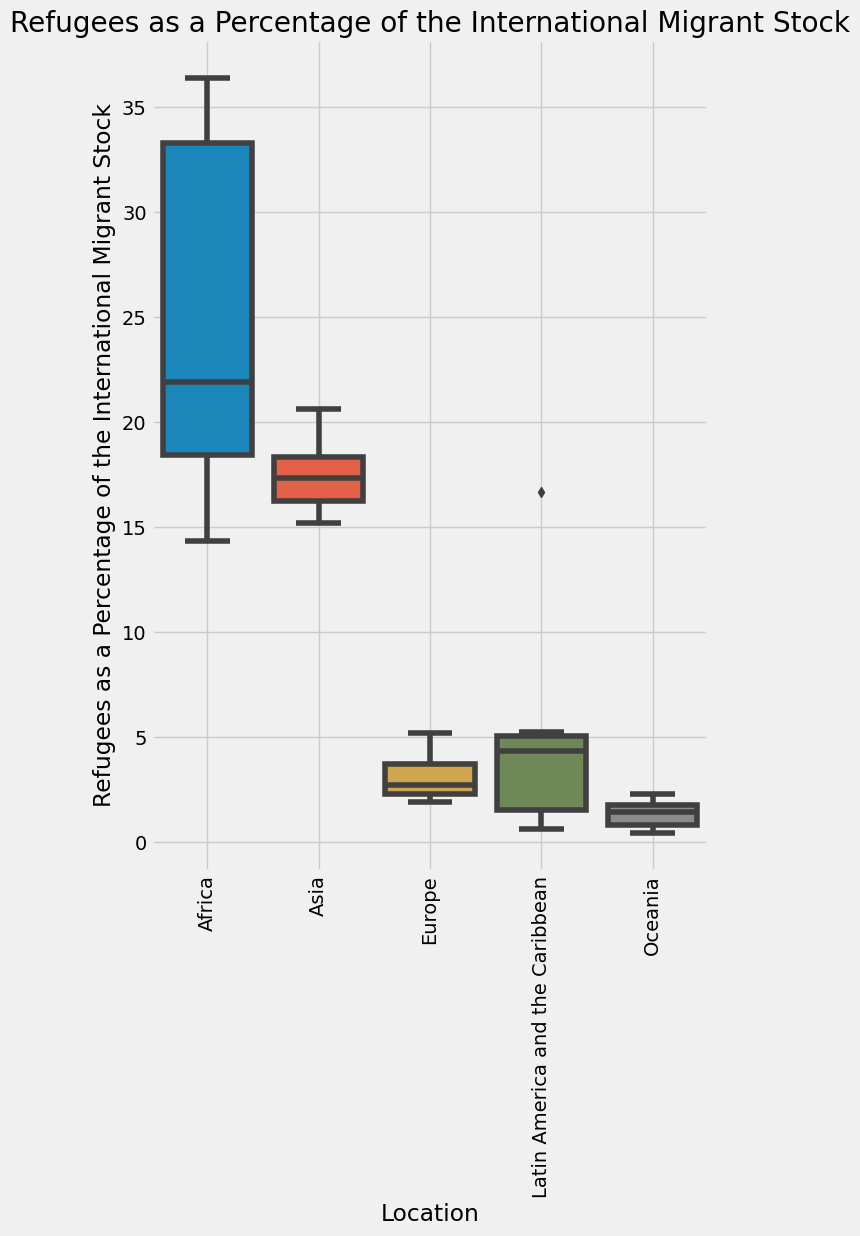

<Figure size 1000x1000 with 0 Axes>

In [432]:
##Visualizing Table 6 - Refugees as a Percentage of the International Migrant Stock - for Major Area###

# Load the dataframe
df6_RPIMS = new_RP_IMS_ES_table

# Filter the dataframe to include only rows where the "Category" column is equal to "Major Area"
df6_MA = df6_RPIMS[df6_RPIMS["Category"] == "Major Area"]

# Create the boxplot
ax_6 = sns.boxplot(data=df6_MA, x="Location", y="Refugees as a Percentage of the International Migrant Stock")

# Set the y-axis scale to logarithmic
#ax_4.set_yscale('log')

# Add grid lines
ax_6.grid(True)

# Add a title to the plot
plt.title("Refugees as a Percentage of the International Migrant Stock")

# Rotate the x-axis labels for all subplots
plt.xticks(rotation=90)

# Add space between the title and the plot
plt.subplots_adjust(top=1.8)

#Re-size figure
plt.figure(figsize=(10,10))


# Show the plot
plt.show()


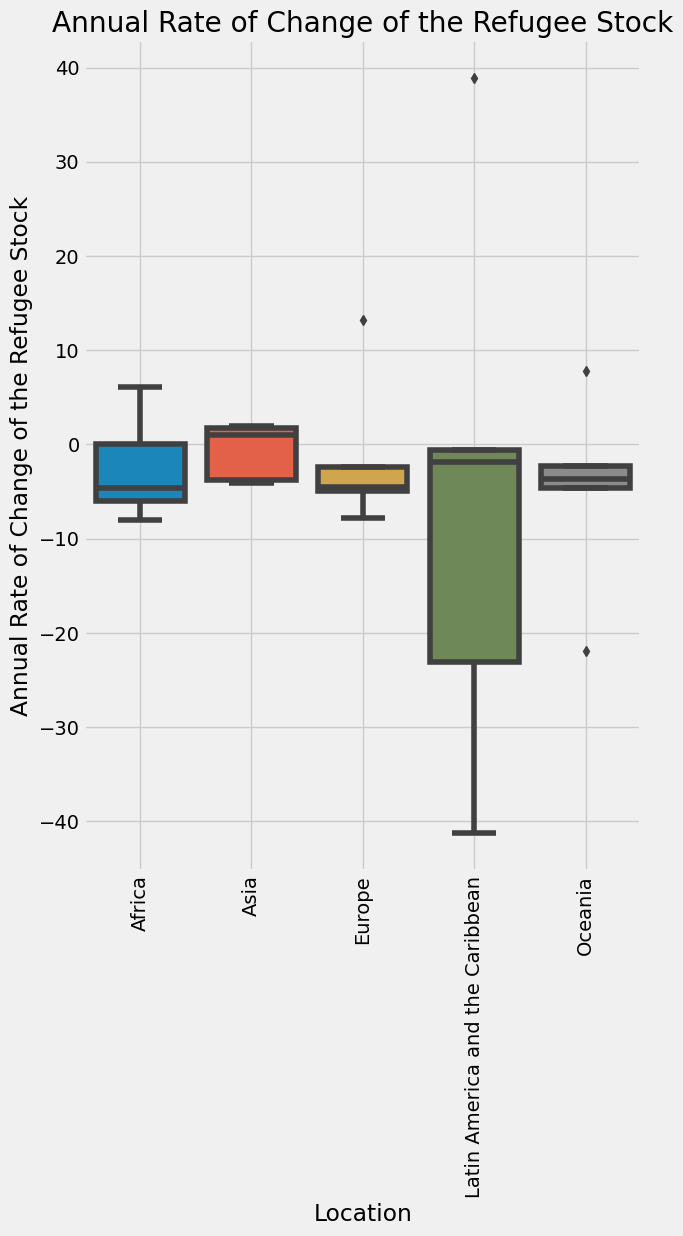

<Figure size 1000x1000 with 0 Axes>

In [436]:
##Visualizing Table 6 - Annual Rate of Change of the Refugee Stock - for Major Area###

# Load the dataframe
df6_ARS = new_ARC_RS_table

# Filter the dataframe to include only rows where the "Category" column is equal to "Major Area"
df6_ARS_MA = df6_ARS[df6_ARS["Category"] == "Major Area"]

# Create the boxplot
ax_62 = sns.boxplot(data=df6_ARS_MA, x="Location", y="Annual Rate of Change of the Refugee Stock")


# Add grid lines
ax_62.grid(True)

# Add a title to the plot
plt.title("Annual Rate of Change of the Refugee Stock")

# Rotate the x-axis labels for all subplots
plt.xticks(rotation=90)

# Add space between the title and the plot
plt.subplots_adjust(top=1.8)

#Re-size figure
plt.figure(figsize=(10,10))


# Show the plot
plt.show()


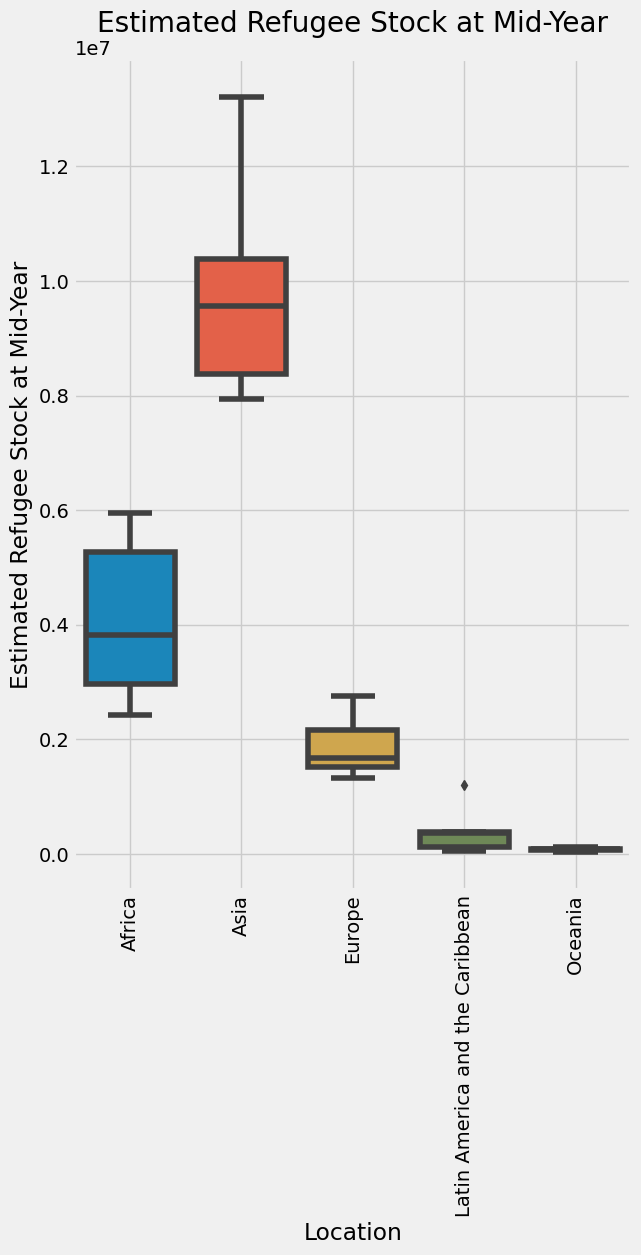

<Figure size 1000x1000 with 0 Axes>

In [439]:
##Visualizing Table 6 - Estimated Refugee Stock at Mid-Year	 - for Major Area###

# Load the dataframe
df6_ERS = new_ERS_midyear_table

# Filter the dataframe to include only rows where the "Category" column is equal to "Major Area"
df6_ERS_MA = df6_ERS[df6_ERS["Category"] == "Major Area"]

# Create the boxplot
ax_63 = sns.boxplot(data=df6_ERS_MA, x="Location", y="Estimated Refugee Stock at Mid-Year")


# Add grid lines
ax_63.grid(True)

# Add a title to the plot
plt.title("Estimated Refugee Stock at Mid-Year")

# Rotate the x-axis labels for all subplots
plt.xticks(rotation=90)

# Add space between the title and the plot
plt.subplots_adjust(top=1.8)

#Re-size figure
plt.figure(figsize=(10,10))


# Show the plot
plt.show()

